<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project%20Quantum%20Challenge/%231%20IBMQ%20QASM%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting

In [37]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install matplotlib
!pip install numpy

In [38]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import numpy as np

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import C3XGate, SwapGate

In [39]:
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

In [40]:
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")

sampler = Sampler(backend=backend)

#1. Fair Quantum Coin Operator & Four-Sided Fair Quantum Coin Operator

1) Quantum Coin State

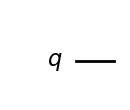

In [41]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.draw("mpl")

2) Fair Quantum Coin Operator

Fair Quantum Coin Operator

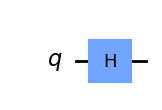

In [42]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.h(0)
Two_Sided_Fair_Coin.draw("mpl")

Verifying Fair Quantum Coin Operator

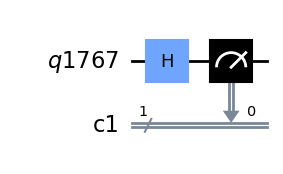

In [43]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
Two_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

Two_Sided_Fair_Coin_Circuit.h(q0)
Two_Sided_Fair_Coin_Circuit.measure(q0, c0)

Two_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: cl8084vl4q34kqgn935g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.49856, 0: 0.50144}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.49856, 0: 0.50144}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


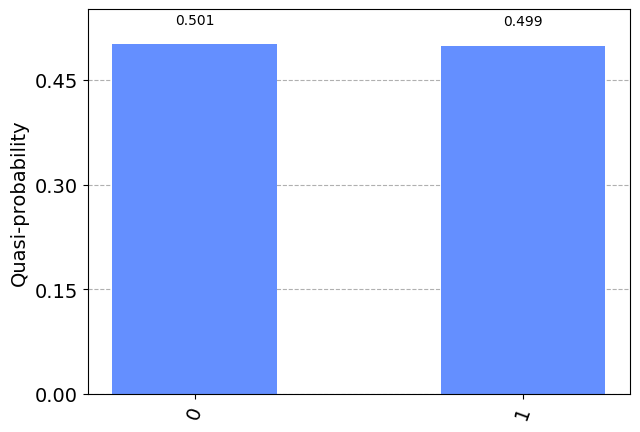

In [44]:
job = sampler.run(Two_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

3) Four-Sided Quantum Coin State

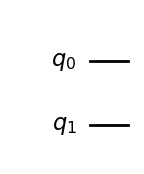

In [45]:
Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.draw("mpl")

4) Four-Sided Fair Quantum Coin Operator

Four-Sided Fair Quantum Coin Operator

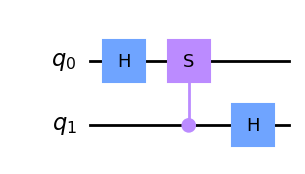

In [46]:
from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(1) # the parameter is the amount of control points you want

Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.h(0)
Four_Sided_Fair_Coin.append(csgate, [1, 0])
Four_Sided_Fair_Coin.h(1)

Four_Sided_Fair_Coin.draw("mpl")

Verifying Four-Sided Fair Quantum Coin Operator

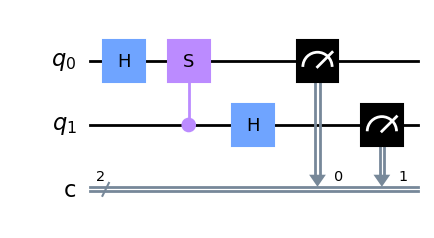

In [47]:
qubits = QuantumRegister(2, 'q')
clbits = ClassicalRegister(2, 'c')
Four_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,q1,) = qubits
(c0,c1,) = clbits

Four_Sided_Fair_Coin_Circuit.h(q0)
Four_Sided_Fair_Coin_Circuit.append(csgate, [q1, q0])
Four_Sided_Fair_Coin_Circuit.h(q1)
Four_Sided_Fair_Coin_Circuit.measure(qubits, clbits)

Four_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: cl8085lfa6vtjv8uoki0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.2513, 1: 0.24841, 0: 0.25033, 2: 0.24996}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.2513, 1: 0.24841, 0: 0.25033, 2: 0.24996}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


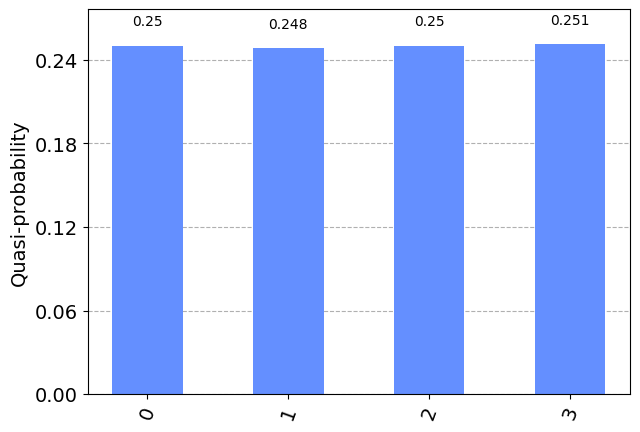

In [48]:
job = sampler.run(Four_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

5) Fairness Check

all matrix elements of each operator have same absolute value, thus unbiased coin

#2. Location on the Board

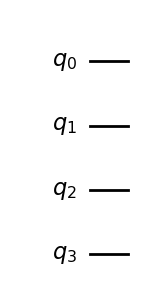

In [49]:
qreg_q = QuantumRegister(4, 'q')
Board = QuantumCircuit(qreg_q)

Board.draw("mpl")

#3. Quantum Coin with Shift Operator

1) Shift Operator

Right Shift Operator

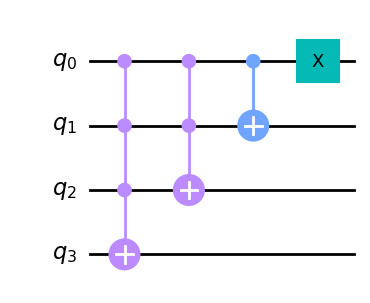

In [50]:
qreg_q = QuantumRegister(4, 'q')
Shift = QuantumCircuit(qreg_q)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.draw("mpl")

Verifying Right Shift Operator

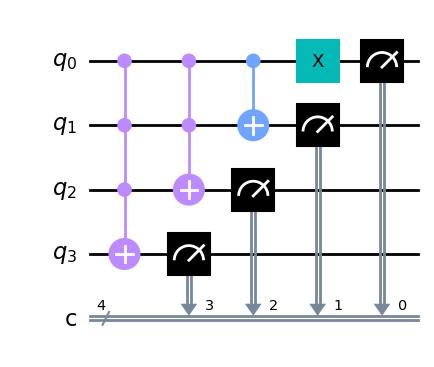

In [51]:
from qiskit.circuit.library.standard_gates import C3XGate

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
Shift = QuantumCircuit(qreg_q, creg_c)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.measure(qreg_q, creg_c)

Shift.draw("mpl")

>>> Job ID: cl80877l4q34kqgn949g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


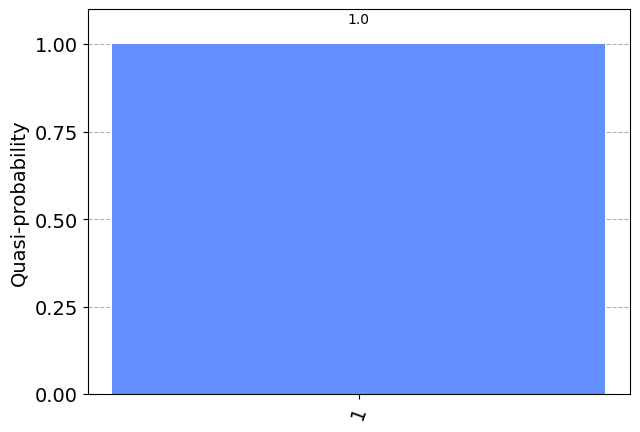

In [52]:
job = sampler.run(Shift, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Right Shift. |0000> -> |0001>
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Shift Operator with Quantum Coin Operator

Shift Operator

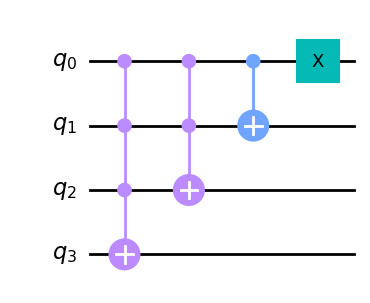

In [53]:
Shift = QuantumCircuit(4)
Shift.append(C3XGate(), [0,1,2,3])
Shift.ccx(0,1,2)
Shift.cx(0,1)
Shift.x(0)

Shift.draw("mpl")

1 Step Board Evolution Operator

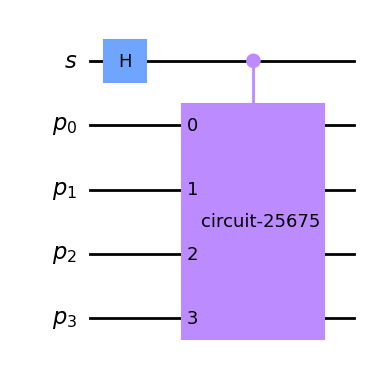

In [54]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.draw("mpl")

N Step Board Evolution Operator

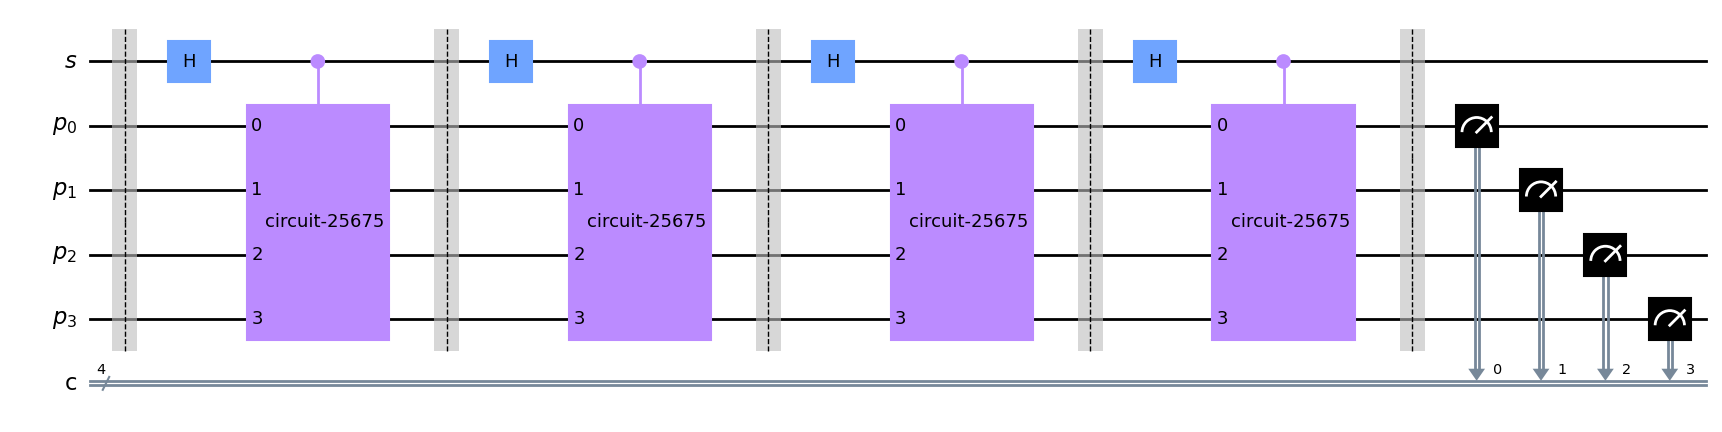

In [55]:
# varying N
N = 4

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl80885fa6vtjv8uolp0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.12348, 0: 0.06391, 2: 0.12532, 1: 0.62484, 4: 0.06245}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.12348, 0: 0.06391, 2: 0.12532, 1: 0.62484, 4: 0.06245}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

4


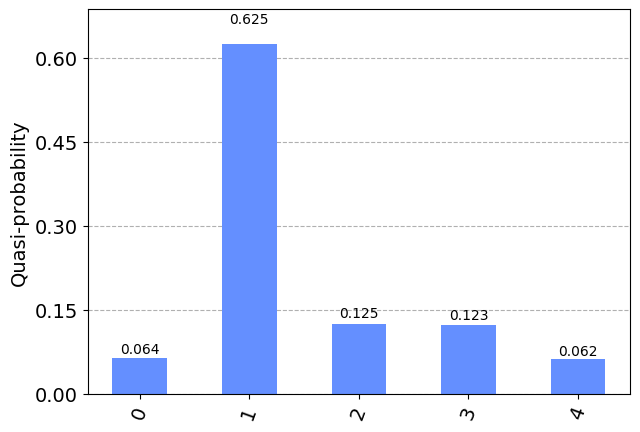

In [56]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying N Step Board Evolution Operator

>>> Job ID: cl8088nl4q34kqgn954g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}
0.05859375


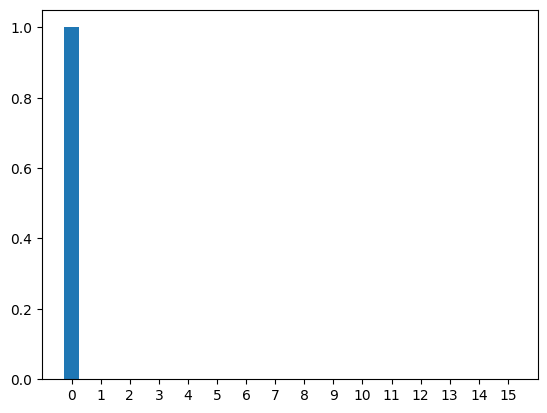



>>> Job ID: cl8089f75e3r3c6gla70
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.50193, 0: 0.49807}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.50193, 0: 0.49807}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{1: 0.50193, 0: 0.49807}
0.0273442156125


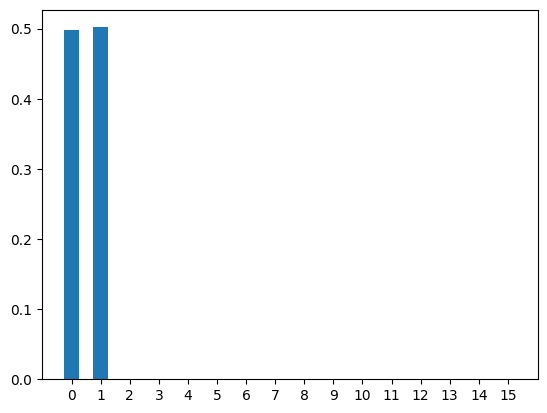



>>> Job ID: cl808a7l4q34kqgn95r0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.24843, 0: 0.25131, 1: 0.50026}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.24843, 0: 0.25131, 1: 0.50026}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{2: 0.24843, 0: 0.25131, 1: 0.50026}
0.019539640537500003


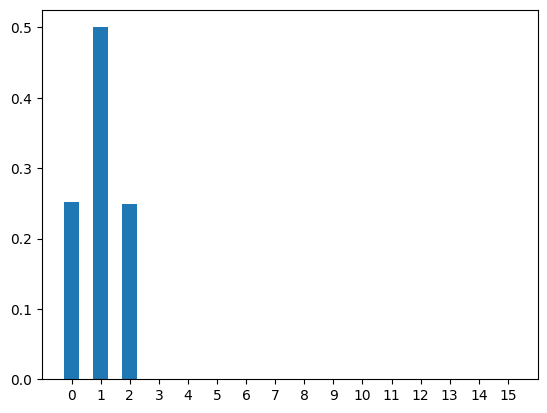



>>> Job ID: cl808at7pau17fl4e310
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.1257, 1: 0.62386, 2: 0.12565, 0: 0.12479}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.1257, 1: 0.62386, 2: 0.12565, 0: 0.12479}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{3: 0.1257, 1: 0.62386, 2: 0.12565, 0: 0.12479}
0.023366391012499998


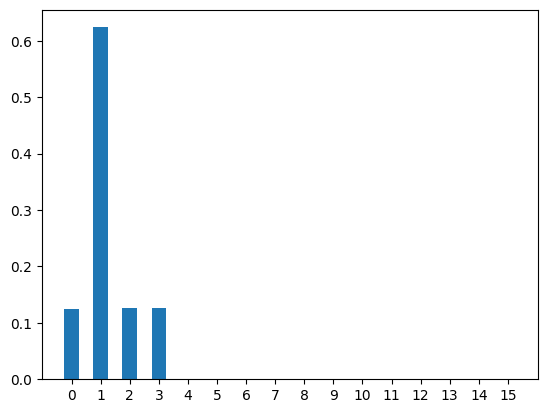



>>> Job ID: cl808bdfa6vtjv8uon70
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.06371, 3: 0.12437, 1: 0.62379, 0: 0.06279, 2: 0.12534}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.06371, 3: 0.12437, 1: 0.62379, 0: 0.06279, 2: 0.12534}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{4: 0.06371, 3: 0.12437, 1: 0.62379, 0: 0.06279, 2: 0.12534}
0.022862095299999996


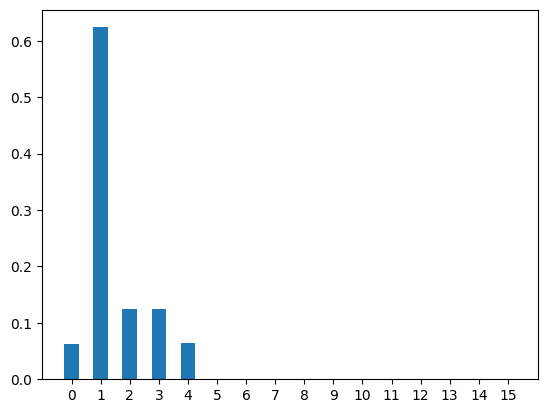



>>> Job ID: cl808btfa6vtjv8uonhg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.03183, 2: 0.12342, 3: 0.12502, 4: 0.15747, 5: 0.03094, 1: 0.53132}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.03183, 2: 0.12342, 3: 0.12502, 4: 0.15747, 5: 0.03094, 1: 0.53132}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{0: 0.03183, 2: 0.12342, 3: 0.12502, 4: 0.15747, 5: 0.03094, 1: 0.53132}
0.0173394170375


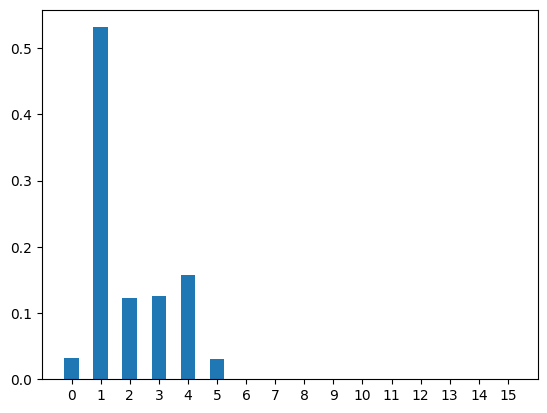



>>> Job ID: cl808cd7pau17fl4e3p0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.01553, 3: 0.12767, 1: 0.40791, 5: 0.15666, 2: 0.19878, 4: 0.07834, 6: 0.01511}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.01553, 3: 0.12767, 1: 0.40791, 5: 0.15666, 2: 0.19878, 4: 0.07834, 6: 0.01511}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{0: 0.01553, 3: 0.12767, 1: 0.40791, 5: 0.15666, 2: 0.19878, 4: 0.07834, 6: 0.01511}
0.0119282931


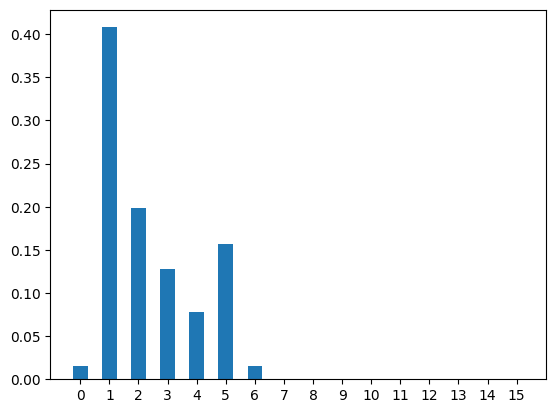



>>> Job ID: cl808d57pau17fl4e470
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.29106, 5: 0.03969, 2: 0.31979, 6: 0.13301, 4: 0.06928, 7: 0.00752, 0: 0.00713, 3: 0.13252}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.29106, 5: 0.03969, 2: 0.31979, 6: 0.13301, 4: 0.06928, 7: 0.00752, 0: 0.00713, 3: 0.13252}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{1: 0.29106, 5: 0.03969, 2: 0.31979, 6: 0.13301, 4: 0.06928, 7: 0.00752, 0: 0.00713, 3: 0.13252}
0.01038857375


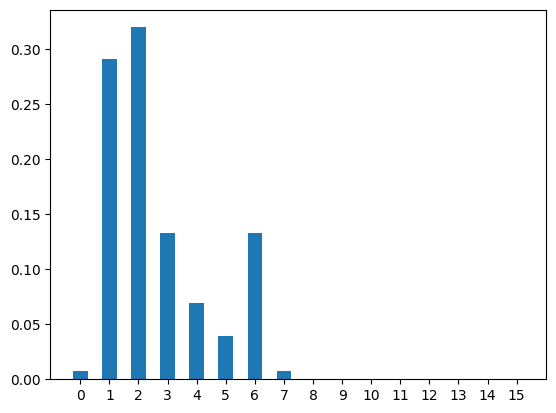



>>> Job ID: cl808dnl4q34kqgn97fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.004, 1: 0.19516, 5: 0.07018, 2: 0.41388, 0: 0.00372, 3: 0.10263, 7: 0.10084, 6: 0.03856, 4: 0.07103}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.004, 1: 0.19516, 5: 0.07018, 2: 0.41388, 0: 0.00372, 3: 0.10263, 7: 0.10084, 6: 0.03856, 4: 0.07103}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{8: 0.004, 1: 0.19516, 5: 0.07018, 2: 0.41388, 0: 0.00372, 3: 0.10263, 7: 0.10084, 6: 0.03856, 4: 0.07103}
0.011192056737500001


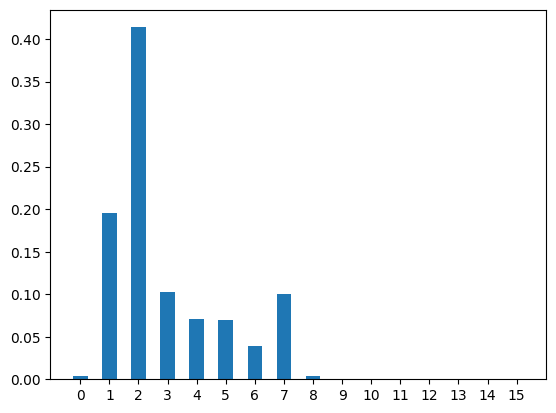



>>> Job ID: cl808e775e3r3c6glcgg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00186, 8: 0.07238, 5: 0.07126, 2: 0.4526, 1: 0.1272, 6: 0.07827, 4: 0.07007, 0: 0.00194, 7: 0.06243, 3: 0.06199}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00186, 8: 0.07238, 5: 0.07126, 2: 0.4526, 1: 0.1272, 6: 0.07827, 4: 0.07007, 0: 0.00194, 7: 0.06243, 3: 0.06199}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{9: 0.00186, 8: 0.07238, 5: 0.07126, 2: 0.4526, 1: 0.1272, 6: 0.07827, 4: 0.07007, 0: 0.00194, 7: 0.06243, 3: 0.06199}
0.011726683625


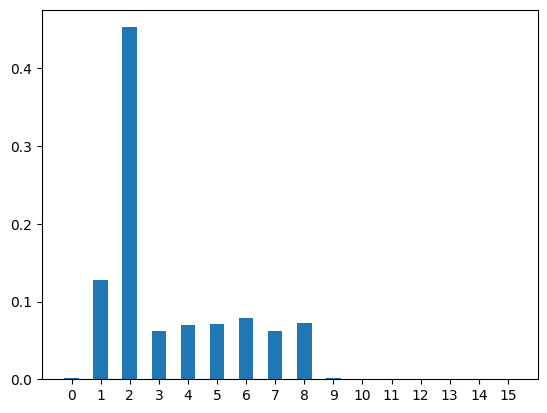



>>> Job ID: cl808ep6mcdhud4hach0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00081, 1: 0.0788, 9: 0.04862, 2: 0.43844, 8: 0.08668, 5: 0.07111, 6: 0.05173, 4: 0.09766, 0: 0.0008, 7: 0.06253, 3: 0.06282}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00081, 1: 0.0788, 9: 0.04862, 2: 0.43844, 8: 0.08668, 5: 0.07111, 6: 0.05173, 4: 0.09766, 0: 0.0008, 7: 0.06253, 3: 0.06282}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{10: 0.00081, 1: 0.0788, 9: 0.04862, 2: 0.43844, 8: 0.08668, 5: 0.07111, 6: 0.05173, 4: 0.09766, 0: 0.0008, 7: 0.06253, 3: 0.06282}
0.0106840094


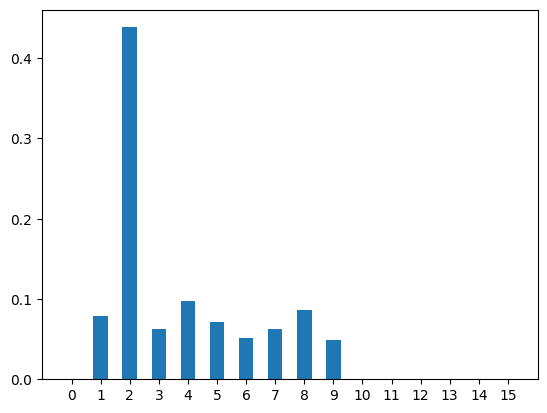



>>> Job ID: cl808f95o5utp9bt8rm0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.00055, 1: 0.04829, 10: 0.03244, 8: 0.03429, 2: 0.38843, 5: 0.07218, 7: 0.03289, 0: 0.00047, 3: 0.11313, 6: 0.04912, 4: 0.1279, 9: 0.10031}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.00055, 1: 0.04829, 10: 0.03244, 8: 0.03429, 2: 0.38843, 5: 0.07218, 7: 0.03289, 0: 0.00047, 3: 0.11313, 6: 0.04912, 4: 0.1279, 9: 0.10031}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{11: 0.00055, 1: 0.04829, 10: 0.03244, 8: 0.03429, 2: 0.38843, 5: 0.07218, 7: 0.03289, 0: 0.00047, 3: 0.11313, 6: 0.04912, 4: 0.1279, 9: 0.10031}
0.00880386575


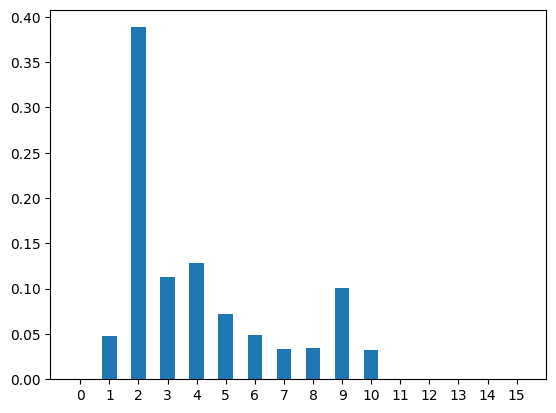



>>> Job ID: cl808fp6mcdhud4had3g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01799, 11: 0.01948, 6: 0.0495, 4: 0.12365, 8: 0.03835, 1: 0.0285, 12: 0.00028, 5: 0.05676, 2: 0.31873, 10: 0.0994, 0: 0.00013, 7: 0.05102, 3: 0.19621}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01799, 11: 0.01948, 6: 0.0495, 4: 0.12365, 8: 0.03835, 1: 0.0285, 12: 0.00028, 5: 0.05676, 2: 0.31873, 10: 0.0994, 0: 0.00013, 7: 0.05102, 3: 0.19621}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{9: 0.01799, 11: 0.01948, 6: 0.0495, 4: 0.12365, 8: 0.03835, 1: 0.0285, 12: 0.00028, 5: 0.05676, 2: 0.31873, 10: 0.0994, 0: 0.00013, 7: 0.05102, 3: 0.19621}
0.0071261266125


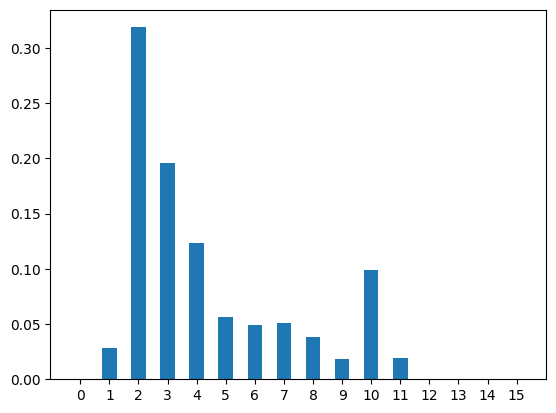



>>> Job ID: cl808g96mcdhud4hadcg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00019, 10: 0.01767, 9: 0.05242, 12: 0.01253, 5: 0.04379, 0: 0.00015, 7: 0.04886, 3: 0.27903, 8: 0.0519, 1: 0.0175, 2: 0.24722, 11: 0.09035, 6: 0.04813, 4: 0.09026}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00019, 10: 0.01767, 9: 0.05242, 12: 0.01253, 5: 0.04379, 0: 0.00015, 7: 0.04886, 3: 0.27903, 8: 0.0519, 1: 0.0175, 2: 0.24722, 11: 0.09035, 6: 0.04813, 4: 0.09026}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 0.00019, 10: 0.01767, 9: 0.05242, 12: 0.01253, 5: 0.04379, 0: 0.00015, 7: 0.04886, 3: 0.27903, 8: 0.0519, 1: 0.0175, 2: 0.24722, 11: 0.09035, 6: 0.04813, 4: 0.09026}
0.00660148905


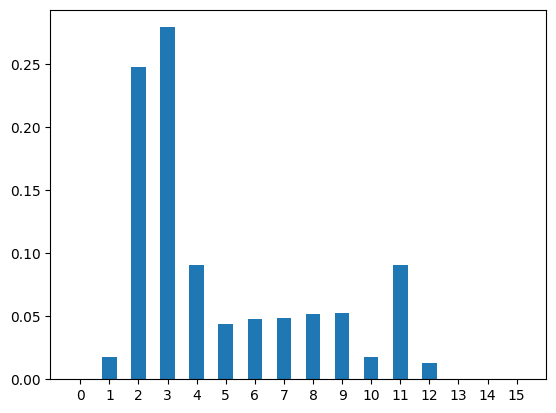



>>> Job ID: cl808h7l4q34kqgn9990
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 2e-05, 13: 0.00765, 10: 0.05687, 1: 0.01001, 11: 0.03143, 12: 0.07638, 5: 0.05677, 8: 0.03812, 9: 0.03808, 4: 0.05, 6: 0.06219, 2: 0.18451, 0: 6e-05, 7: 0.05021, 3: 0.3377}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 2e-05, 13: 0.00765, 10: 0.05687, 1: 0.01001, 11: 0.03143, 12: 0.07638, 5: 0.05677, 8: 0.03812, 9: 0.03808, 4: 0.05, 6: 0.06219, 2: 0.18451, 0: 6e-05, 7: 0.05021, 3: 0.3377}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{14: 2e-05, 13: 0.00765, 10: 0.05687, 1: 0.01001, 11: 0.03143, 12: 0.07638, 5: 0.05677, 8: 0.03812, 9: 0.03808, 4: 0.05, 6: 0.06219, 2: 0.18451, 0: 6e-05, 7: 0.05021, 3: 0.3377}
0.0069259123


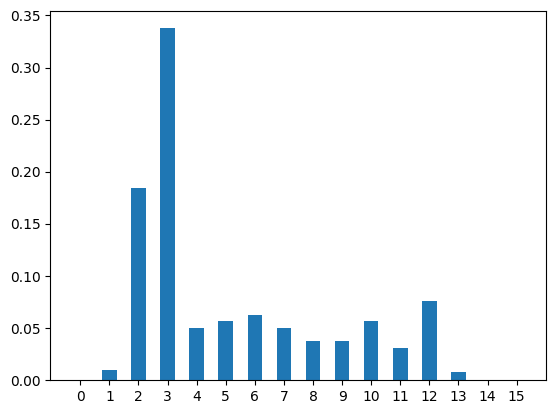



>>> Job ID: cl808hlfa6vtjv8uoqag
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00579, 14: 0.00466, 12: 0.05024, 5: 0.09068, 9: 0.02718, 8: 0.0371, 2: 0.13362, 13: 0.05903, 4: 0.03548, 6: 0.07447, 11: 0.04781, 0: 4e-05, 7: 0.049, 3: 0.36151, 15: 2e-05, 10: 0.02337}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00579, 14: 0.00466, 12: 0.05024, 5: 0.09068, 9: 0.02718, 8: 0.0371, 2: 0.13362, 13: 0.05903, 4: 0.03548, 6: 0.07447, 11: 0.04781, 0: 4e-05, 7: 0.049, 3: 0.36151, 15: 2e-05, 10: 0.02337}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{1: 0.00579, 14: 0.00466, 12: 0.05024, 5: 0.09068, 9: 0.02718, 8: 0.0371, 2: 0.13362, 13: 0.05903, 4: 0.03548, 6: 0.07447, 11: 0.04781, 0: 4e-05, 7: 0.049, 3: 0.36151, 15: 2e-05, 10: 0.02337}
0.0071552008625


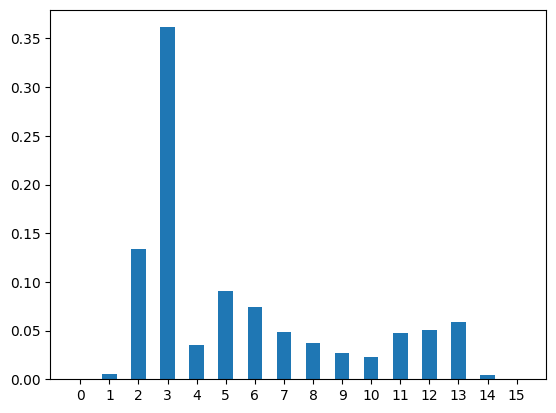



>>> Job ID: cl808i95o5utp9bt8t30
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00372, 10: 0.03338, 15: 0.00268, 9: 0.03801, 11: 0.01834, 8: 0.03854, 0: 3e-05, 7: 0.0406, 3: 0.3542, 14: 0.04442, 12: 0.02895, 5: 0.11581, 2: 0.09341, 4: 0.0565, 6: 0.06629, 13: 0.06512}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00372, 10: 0.03338, 15: 0.00268, 9: 0.03801, 11: 0.01834, 8: 0.03854, 0: 3e-05, 7: 0.0406, 3: 0.3542, 14: 0.04442, 12: 0.02895, 5: 0.11581, 2: 0.09341, 4: 0.0565, 6: 0.06629, 13: 0.06512}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{1: 0.00372, 10: 0.03338, 15: 0.00268, 9: 0.03801, 11: 0.01834, 8: 0.03854, 0: 3e-05, 7: 0.0406, 3: 0.3542, 14: 0.04442, 12: 0.02895, 5: 0.11581, 2: 0.09341, 4: 0.0565, 6: 0.06629, 13: 0.06512}
0.0066114715625


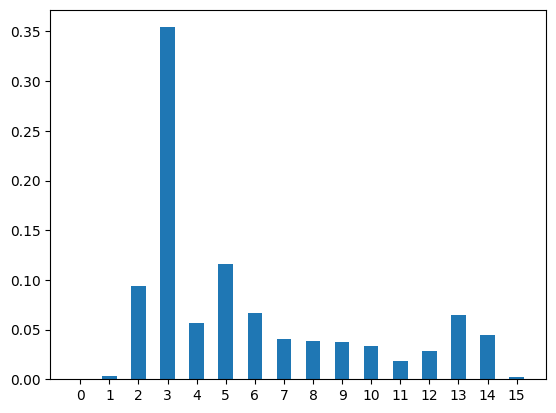



>>> Job ID: cl808j16mcdhud4haej0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00187, 13: 0.01464, 2: 0.065, 8: 0.03742, 11: 0.04051, 0: 0.00152, 7: 0.03508, 3: 0.32653, 14: 0.07438, 12: 0.02763, 5: 0.11763, 15: 0.03199, 10: 0.03938, 6: 0.04228, 4: 0.10639, 9: 0.03775}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00187, 13: 0.01464, 2: 0.065, 8: 0.03742, 11: 0.04051, 0: 0.00152, 7: 0.03508, 3: 0.32653, 14: 0.07438, 12: 0.02763, 5: 0.11763, 15: 0.03199, 10: 0.03938, 6: 0.04228, 4: 0.10639, 9: 0.03775}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{1: 0.00187, 13: 0.01464, 2: 0.065, 8: 0.03742, 11: 0.04051, 0: 0.00152, 7: 0.03508, 3: 0.32653, 14: 0.07438, 12: 0.02763, 5: 0.11763, 15: 0.03199, 10: 0.03938, 6: 0.04228, 4: 0.10639, 9: 0.03775}
0.005629822274999999


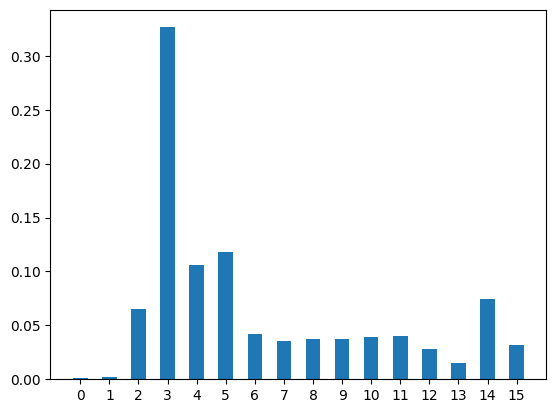



>>> Job ID: cl808jv75e3r3c6glf6g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00204, 14: 0.00936, 2: 0.04211, 11: 0.0302, 12: 0.03946, 5: 0.09403, 10: 0.03093, 15: 0.07673, 9: 0.03736, 0: 0.02215, 3: 0.28019, 7: 0.04557, 8: 0.04654, 13: 0.03926, 6: 0.03048, 4: 0.17359}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00204, 14: 0.00936, 2: 0.04211, 11: 0.0302, 12: 0.03946, 5: 0.09403, 10: 0.03093, 15: 0.07673, 9: 0.03736, 0: 0.02215, 3: 0.28019, 7: 0.04557, 8: 0.04654, 13: 0.03926, 6: 0.03048, 4: 0.17359}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{1: 0.00204, 14: 0.00936, 2: 0.04211, 11: 0.0302, 12: 0.03946, 5: 0.09403, 10: 0.03093, 15: 0.07673, 9: 0.03736, 0: 0.02215, 3: 0.28019, 7: 0.04557, 8: 0.04654, 13: 0.03926, 6: 0.03048, 4: 0.17359}
0.0046724527750000005


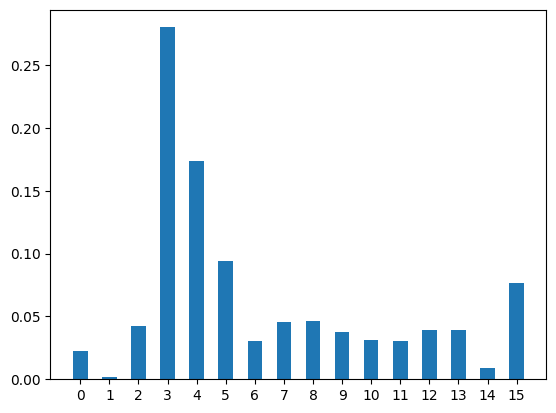



>>> Job ID: cl808kdfa6vtjv8uorsg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0149, 15: 0.01409, 10: 0.02945, 11: 0.02488, 2: 0.02838, 12: 0.01951, 5: 0.05754, 8: 0.05085, 13: 0.02646, 6: 0.04415, 4: 0.23437, 9: 0.03792, 0: 0.07312, 7: 0.0648, 3: 0.23344, 14: 0.04614}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0149, 15: 0.01409, 10: 0.02945, 11: 0.02488, 2: 0.02838, 12: 0.01951, 5: 0.05754, 8: 0.05085, 13: 0.02646, 6: 0.04415, 4: 0.23437, 9: 0.03792, 0: 0.07312, 7: 0.0648, 3: 0.23344, 14: 0.04614}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{1: 0.0149, 15: 0.01409, 10: 0.02945, 11: 0.02488, 2: 0.02838, 12: 0.01951, 5: 0.05754, 8: 0.05085, 13: 0.02646, 6: 0.04415, 4: 0.23437, 9: 0.03792, 0: 0.07312, 7: 0.0648, 3: 0.23344, 14: 0.04614}
0.0044796736625


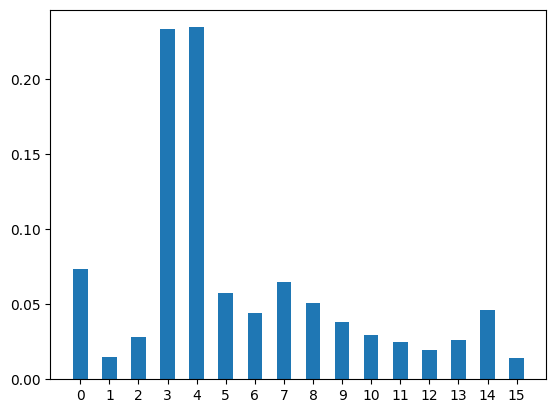



>>> Job ID: cl808l775e3r3c6glg2g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.01517, 9: 0.03187, 8: 0.04236, 1: 0.06696, 13: 0.01984, 11: 0.02941, 0: 0.0265, 7: 0.07276, 3: 0.18277, 6: 0.07762, 4: 0.27736, 10: 0.03052, 15: 0.0407, 5: 0.02974, 12: 0.02802, 2: 0.0284}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.01517, 9: 0.03187, 8: 0.04236, 1: 0.06696, 13: 0.01984, 11: 0.02941, 0: 0.0265, 7: 0.07276, 3: 0.18277, 6: 0.07762, 4: 0.27736, 10: 0.03052, 15: 0.0407, 5: 0.02974, 12: 0.02802, 2: 0.0284}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{14: 0.01517, 9: 0.03187, 8: 0.04236, 1: 0.06696, 13: 0.01984, 11: 0.02941, 0: 0.0265, 7: 0.07276, 3: 0.18277, 6: 0.07762, 4: 0.27736, 10: 0.03052, 15: 0.0407, 5: 0.02974, 12: 0.02802, 2: 0.0284}
0.004606318349999999


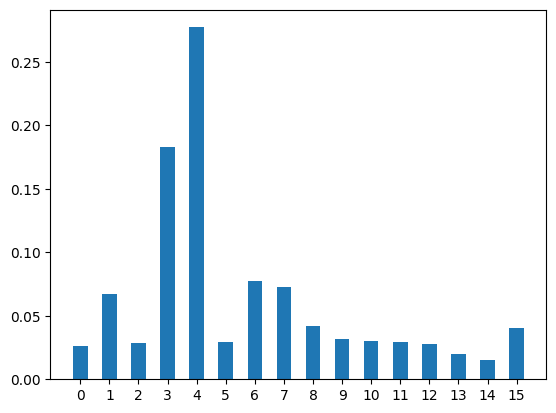



>>> Job ID: cl808lp6mcdhud4hafs0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.03864, 14: 0.02788, 11: 0.0303, 13: 0.03297, 15: 0.01263, 10: 0.03055, 8: 0.02866, 5: 0.02734, 12: 0.03101, 9: 0.02854, 2: 0.0568, 0: 0.02925, 7: 0.05794, 3: 0.15083, 6: 0.10632, 4: 0.31034}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.03864, 14: 0.02788, 11: 0.0303, 13: 0.03297, 15: 0.01263, 10: 0.03055, 8: 0.02866, 5: 0.02734, 12: 0.03101, 9: 0.02854, 2: 0.0568, 0: 0.02925, 7: 0.05794, 3: 0.15083, 6: 0.10632, 4: 0.31034}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{1: 0.03864, 14: 0.02788, 11: 0.0303, 13: 0.03297, 15: 0.01263, 10: 0.03055, 8: 0.02866, 5: 0.02734, 12: 0.03101, 9: 0.02854, 2: 0.0568, 0: 0.02925, 7: 0.05794, 3: 0.15083, 6: 0.10632, 4: 0.31034}
0.0052510431375


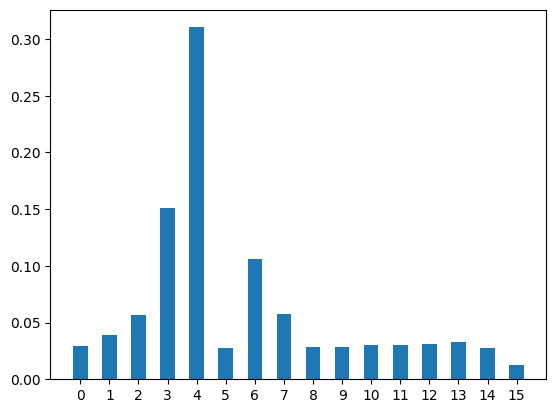



>>> Job ID: cl808mh5o5utp9bt8vcg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.03761, 11: 0.03096, 14: 0.02855, 1: 0.01758, 8: 0.02808, 5: 0.04787, 12: 0.02473, 13: 0.02438, 2: 0.07556, 6: 0.11458, 4: 0.29194, 3: 0.15077, 0: 0.01944, 7: 0.03574, 15: 0.03571, 10: 0.0365}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.03761, 11: 0.03096, 14: 0.02855, 1: 0.01758, 8: 0.02808, 5: 0.04787, 12: 0.02473, 13: 0.02438, 2: 0.07556, 6: 0.11458, 4: 0.29194, 3: 0.15077, 0: 0.01944, 7: 0.03574, 15: 0.03571, 10: 0.0365}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{9: 0.03761, 11: 0.03096, 14: 0.02855, 1: 0.01758, 8: 0.02808, 5: 0.04787, 12: 0.02473, 13: 0.02438, 2: 0.07556, 6: 0.11458, 4: 0.29194, 3: 0.15077, 0: 0.01944, 7: 0.03574, 15: 0.03571, 10: 0.0365}
0.004771520937499999


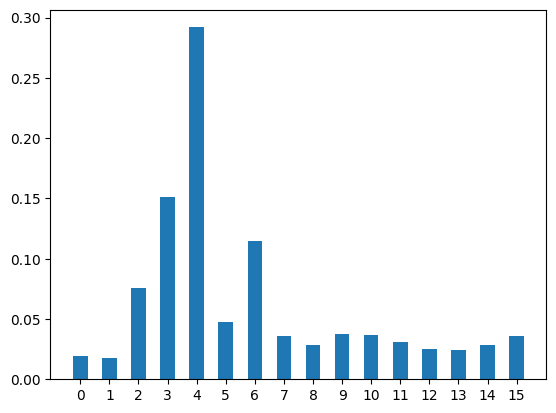



>>> Job ID: cl808n95o5utp9bt8vs0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00315, 13: 0.0212, 9: 0.04907, 10: 0.03922, 15: 0.0194, 14: 0.01701, 1: 0.03317, 11: 0.03103, 4: 0.34049, 6: 0.09939, 12: 0.02487, 5: 0.11798, 8: 0.04501, 0: 0.03273, 3: 0.10251, 7: 0.02377}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00315, 13: 0.0212, 9: 0.04907, 10: 0.03922, 15: 0.0194, 14: 0.01701, 1: 0.03317, 11: 0.03103, 4: 0.34049, 6: 0.09939, 12: 0.02487, 5: 0.11798, 8: 0.04501, 0: 0.03273, 3: 0.10251, 7: 0.02377}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{2: 0.00315, 13: 0.0212, 9: 0.04907, 10: 0.03922, 15: 0.0194, 14: 0.01701, 1: 0.03317, 11: 0.03103, 4: 0.34049, 6: 0.09939, 12: 0.02487, 5: 0.11798, 8: 0.04501, 0: 0.03273, 3: 0.10251, 7: 0.02377}
0.006197145075


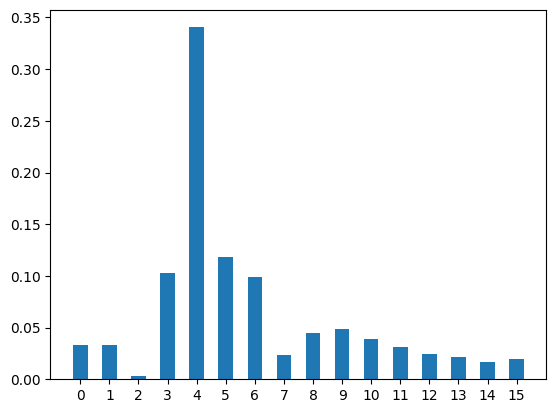



>>> Job ID: cl808o57pau17fl4e9m0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.0247, 14: 0.02379, 11: 0.02624, 10: 0.03199, 15: 0.01855, 9: 0.04953, 1: 0.02203, 12: 0.02538, 5: 0.12282, 8: 0.06423, 0: 0.01284, 7: 0.03391, 3: 0.09866, 2: 0.03324, 4: 0.34123, 6: 0.07086}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.0247, 14: 0.02379, 11: 0.02624, 10: 0.03199, 15: 0.01855, 9: 0.04953, 1: 0.02203, 12: 0.02538, 5: 0.12282, 8: 0.06423, 0: 0.01284, 7: 0.03391, 3: 0.09866, 2: 0.03324, 4: 0.34123, 6: 0.07086}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{13: 0.0247, 14: 0.02379, 11: 0.02624, 10: 0.03199, 15: 0.01855, 9: 0.04953, 1: 0.02203, 12: 0.02538, 5: 0.12282, 8: 0.06423, 0: 0.01284, 7: 0.03391, 3: 0.09866, 2: 0.03324, 4: 0.34123, 6: 0.07086}
0.006071092824999999


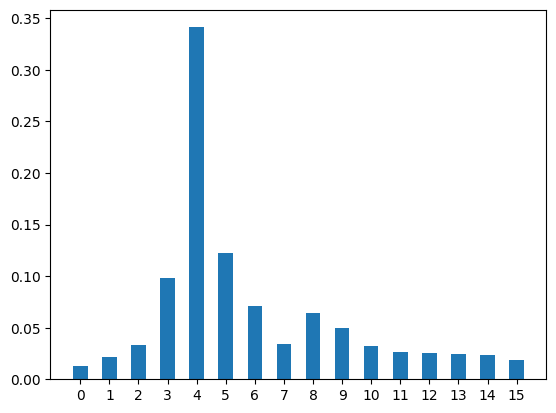



>>> Job ID: cl808ovl4q34kqgn9d10
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01475, 13: 0.02514, 11: 0.02467, 2: 0.01941, 14: 0.02559, 15: 0.02748, 10: 0.024, 12: 0.02518, 5: 0.30429, 8: 0.0719, 6: 0.08232, 4: 0.15936, 0: 0.02534, 3: 0.08682, 7: 0.04735, 9: 0.0364}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01475, 13: 0.02514, 11: 0.02467, 2: 0.01941, 14: 0.02559, 15: 0.02748, 10: 0.024, 12: 0.02518, 5: 0.30429, 8: 0.0719, 6: 0.08232, 4: 0.15936, 0: 0.02534, 3: 0.08682, 7: 0.04735, 9: 0.0364}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{1: 0.01475, 13: 0.02514, 11: 0.02467, 2: 0.01941, 14: 0.02559, 15: 0.02748, 10: 0.024, 12: 0.02518, 5: 0.30429, 8: 0.0719, 6: 0.08232, 4: 0.15936, 0: 0.02534, 3: 0.08682, 7: 0.04735, 9: 0.0364}
0.0052272491625


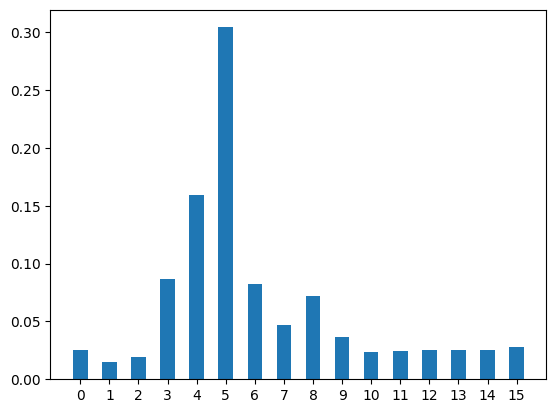



>>> Job ID: cl808pn75e3r3c6gli5g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.05937, 11: 0.03104, 1: 0.02805, 14: 0.0226, 10: 0.02642, 15: 0.02059, 9: 0.02236, 13: 0.0245, 12: 0.02995, 5: 0.30515, 4: 0.22723, 6: 0.01431, 2: 0.03045, 3: 0.00464, 0: 0.02248, 7: 0.13086}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.05937, 11: 0.03104, 1: 0.02805, 14: 0.0226, 10: 0.02642, 15: 0.02059, 9: 0.02236, 13: 0.0245, 12: 0.02995, 5: 0.30515, 4: 0.22723, 6: 0.01431, 2: 0.03045, 3: 0.00464, 0: 0.02248, 7: 0.13086}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{8: 0.05937, 11: 0.03104, 1: 0.02805, 14: 0.0226, 10: 0.02642, 15: 0.02059, 9: 0.02236, 13: 0.0245, 12: 0.02995, 5: 0.30515, 4: 0.22723, 6: 0.01431, 2: 0.03045, 3: 0.00464, 0: 0.02248, 7: 0.13086}
0.0068711388249999995


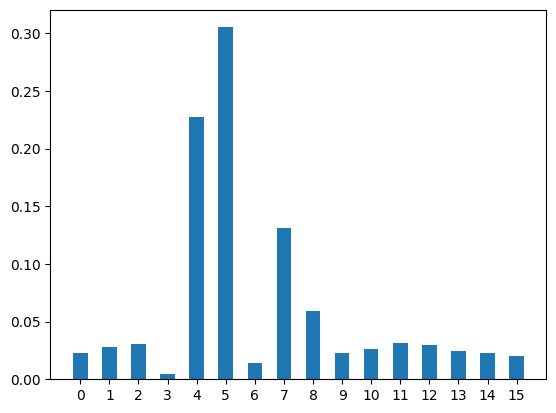



>>> Job ID: cl808qdfa6vtjv8uoun0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.02157, 11: 0.03817, 2: 0.02395, 10: 0.03898, 15: 0.01909, 9: 0.0305, 1: 0.01552, 13: 0.02488, 6: 0.10041, 4: 0.22332, 0: 0.01607, 3: 0.03285, 7: 0.13056, 12: 0.03125, 5: 0.22216, 8: 0.03072}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.02157, 11: 0.03817, 2: 0.02395, 10: 0.03898, 15: 0.01909, 9: 0.0305, 1: 0.01552, 13: 0.02488, 6: 0.10041, 4: 0.22332, 0: 0.01607, 3: 0.03285, 7: 0.13056, 12: 0.03125, 5: 0.22216, 8: 0.03072}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{14: 0.02157, 11: 0.03817, 2: 0.02395, 10: 0.03898, 15: 0.01909, 9: 0.0305, 1: 0.01552, 13: 0.02488, 6: 0.10041, 4: 0.22332, 0: 0.01607, 3: 0.03285, 7: 0.13056, 12: 0.03125, 5: 0.22216, 8: 0.03072}
0.00458015235


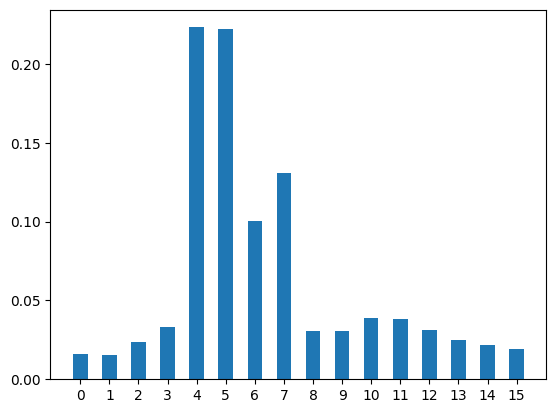



>>> Job ID: cl808r7l4q34kqgn9e30
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.02145, 13: 0.02245, 1: 0.01814, 11: 0.03704, 2: 0.00818, 9: 0.02389, 15: 0.02117, 10: 0.05225, 12: 0.02567, 5: 0.23579, 8: 0.11422, 3: 0.0394, 7: 0.11925, 0: 0.02141, 6: 0.09782, 4: 0.14187}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.02145, 13: 0.02245, 1: 0.01814, 11: 0.03704, 2: 0.00818, 9: 0.02389, 15: 0.02117, 10: 0.05225, 12: 0.02567, 5: 0.23579, 8: 0.11422, 3: 0.0394, 7: 0.11925, 0: 0.02141, 6: 0.09782, 4: 0.14187}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{14: 0.02145, 13: 0.02245, 1: 0.01814, 11: 0.03704, 2: 0.00818, 9: 0.02389, 15: 0.02117, 10: 0.05225, 12: 0.02567, 5: 0.23579, 8: 0.11422, 3: 0.0394, 7: 0.11925, 0: 0.02141, 6: 0.09782, 4: 0.14187}
0.0037006402125


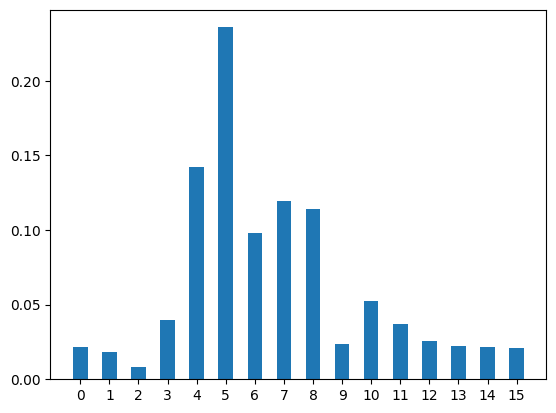



>>> Job ID: cl808rp6mcdhud4haimg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.01421, 14: 0.02149, 2: 0.02084, 11: 0.02447, 15: 0.02245, 10: 0.05086, 6: 0.09236, 4: 0.0383, 1: 0.02383, 12: 0.02042, 5: 0.33331, 13: 0.02052, 9: 0.12678, 0: 0.02171, 3: 0.04289, 7: 0.12556}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.01421, 14: 0.02149, 2: 0.02084, 11: 0.02447, 15: 0.02245, 10: 0.05086, 6: 0.09236, 4: 0.0383, 1: 0.02383, 12: 0.02042, 5: 0.33331, 13: 0.02052, 9: 0.12678, 0: 0.02171, 3: 0.04289, 7: 0.12556}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{8: 0.01421, 14: 0.02149, 2: 0.02084, 11: 0.02447, 15: 0.02245, 10: 0.05086, 6: 0.09236, 4: 0.0383, 1: 0.02383, 12: 0.02042, 5: 0.33331, 13: 0.02052, 9: 0.12678, 0: 0.02171, 3: 0.04289, 7: 0.12556}
0.0061834789


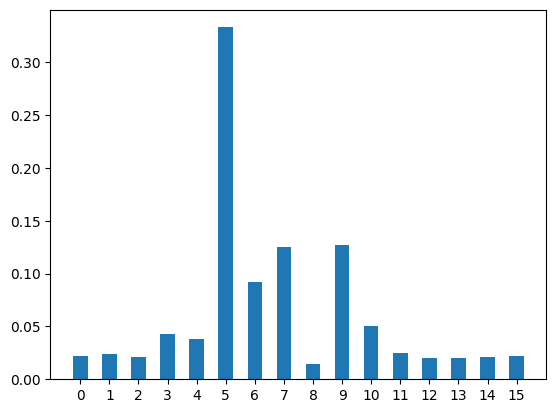



>>> Job ID: cl808slfa6vtjv8uovpg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.02453, 11: 0.03503, 13: 0.02674, 8: 0.0311, 2: 0.02027, 10: 0.03306, 15: 0.02079, 9: 0.12519, 12: 0.02177, 5: 0.3332, 1: 0.01865, 3: 0.03042, 7: 0.127, 0: 0.0193, 4: 0.05776, 6: 0.07519}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.02453, 11: 0.03503, 13: 0.02674, 8: 0.0311, 2: 0.02027, 10: 0.03306, 15: 0.02079, 9: 0.12519, 12: 0.02177, 5: 0.3332, 1: 0.01865, 3: 0.03042, 7: 0.127, 0: 0.0193, 4: 0.05776, 6: 0.07519}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{14: 0.02453, 11: 0.03503, 13: 0.02674, 8: 0.0311, 2: 0.02027, 10: 0.03306, 15: 0.02079, 9: 0.12519, 12: 0.02177, 5: 0.3332, 1: 0.01865, 3: 0.03042, 7: 0.127, 0: 0.0193, 4: 0.05776, 6: 0.07519}
0.006055016975000001


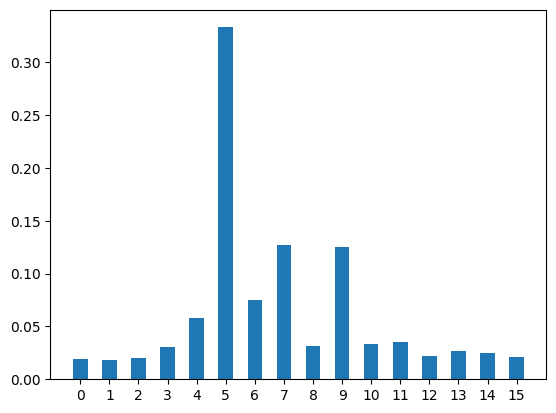



>>> Job ID: cl808tf75e3r3c6glk00
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01606, 14: 0.02527, 9: 0.03344, 11: 0.00671, 1: 0.0167, 3: 0.00658, 7: 0.0187, 0: 0.01912, 13: 0.03083, 4: 0.08642, 6: 0.16607, 12: 0.04451, 5: 0.23578, 8: 0.13828, 15: 0.02204, 10: 0.13349}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01606, 14: 0.02527, 9: 0.03344, 11: 0.00671, 1: 0.0167, 3: 0.00658, 7: 0.0187, 0: 0.01912, 13: 0.03083, 4: 0.08642, 6: 0.16607, 12: 0.04451, 5: 0.23578, 8: 0.13828, 15: 0.02204, 10: 0.13349}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{2: 0.01606, 14: 0.02527, 9: 0.03344, 11: 0.00671, 1: 0.0167, 3: 0.00658, 7: 0.0187, 0: 0.01912, 13: 0.03083, 4: 0.08642, 6: 0.16607, 12: 0.04451, 5: 0.23578, 8: 0.13828, 15: 0.02204, 10: 0.13349}
0.0044747127375


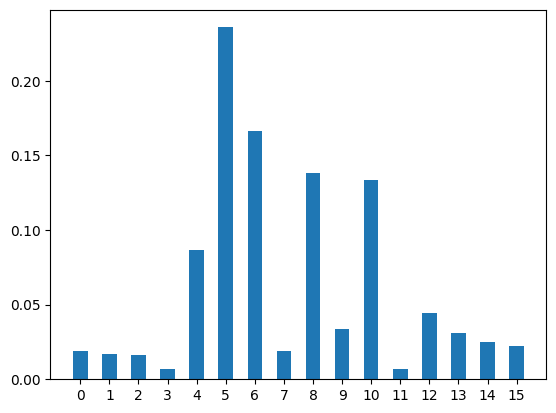



>>> Job ID: cl808u775e3r3c6glkb0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01985, 7: 0.00159, 3: 0.0086, 0: 0.0189, 1: 0.01918, 13: 0.02802, 9: 0.04989, 8: 0.13998, 11: 0.12844, 14: 0.02275, 4: 0.08483, 6: 0.28787, 12: 0.04568, 5: 0.11344, 10: 0.01094, 15: 0.02004}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01985, 7: 0.00159, 3: 0.0086, 0: 0.0189, 1: 0.01918, 13: 0.02802, 9: 0.04989, 8: 0.13998, 11: 0.12844, 14: 0.02275, 4: 0.08483, 6: 0.28787, 12: 0.04568, 5: 0.11344, 10: 0.01094, 15: 0.02004}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{2: 0.01985, 7: 0.00159, 3: 0.0086, 0: 0.0189, 1: 0.01918, 13: 0.02802, 9: 0.04989, 8: 0.13998, 11: 0.12844, 14: 0.02275, 4: 0.08483, 6: 0.28787, 12: 0.04568, 5: 0.11344, 10: 0.01094, 15: 0.02004}
0.0052575230625


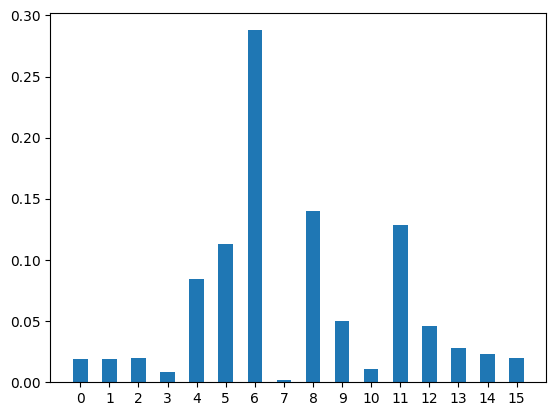



>>> Job ID: cl808v775e3r3c6glkog
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01886, 13: 0.05337, 14: 0.01189, 15: 0.01995, 10: 0.01074, 0: 0.0197, 3: 0.01959, 7: 0.00236, 2: 0.02031, 9: 0.07263, 12: 0.054, 5: 0.10411, 8: 0.11819, 6: 0.32453, 4: 0.06152, 11: 0.08825}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01886, 13: 0.05337, 14: 0.01189, 15: 0.01995, 10: 0.01074, 0: 0.0197, 3: 0.01959, 7: 0.00236, 2: 0.02031, 9: 0.07263, 12: 0.054, 5: 0.10411, 8: 0.11819, 6: 0.32453, 4: 0.06152, 11: 0.08825}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{1: 0.01886, 13: 0.05337, 14: 0.01189, 15: 0.01995, 10: 0.01074, 0: 0.0197, 3: 0.01959, 7: 0.00236, 2: 0.02031, 9: 0.07263, 12: 0.054, 5: 0.10411, 8: 0.11819, 6: 0.32453, 4: 0.06152, 11: 0.08825}
0.005777505087500001


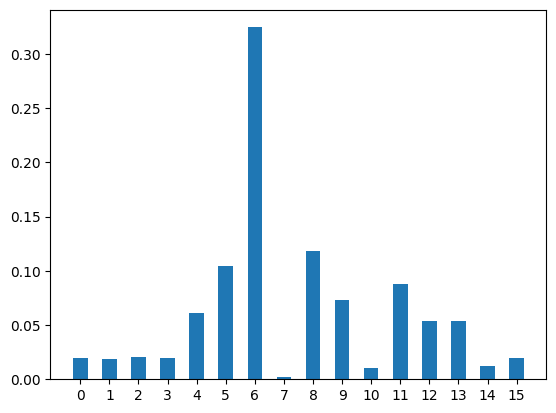



>>> Job ID: cl808vtfa6vtjv8up1b0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00466, 2: 0.01743, 11: 0.0368, 8: 0.05246, 15: 0.01837, 10: 0.07601, 3: 0.0216, 7: 0.05426, 0: 0.02261, 4: 0.02016, 6: 0.27343, 5: 0.15322, 12: 0.10502, 9: 0.07269, 14: 0.05251, 1: 0.01877}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00466, 2: 0.01743, 11: 0.0368, 8: 0.05246, 15: 0.01837, 10: 0.07601, 3: 0.0216, 7: 0.05426, 0: 0.02261, 4: 0.02016, 6: 0.27343, 5: 0.15322, 12: 0.10502, 9: 0.07269, 14: 0.05251, 1: 0.01877}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{13: 0.00466, 2: 0.01743, 11: 0.0368, 8: 0.05246, 15: 0.01837, 10: 0.07601, 3: 0.0216, 7: 0.05426, 0: 0.02261, 4: 0.02016, 6: 0.27343, 5: 0.15322, 12: 0.10502, 9: 0.07269, 14: 0.05251, 1: 0.01877}
0.004377382325


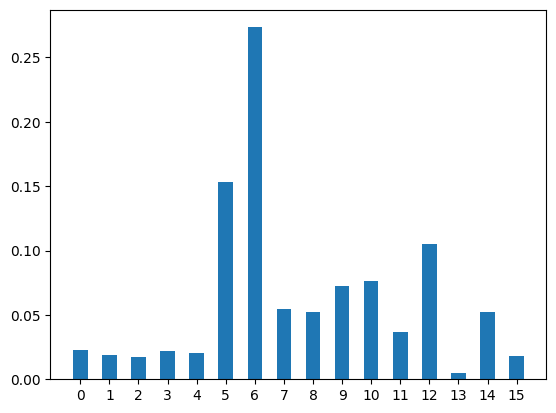



>>> Job ID: cl8090nl4q34kqgn9gs0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.02365, 2: 0.01673, 9: 0.03689, 8: 0.06451, 1: 0.01959, 4: 0.0003, 6: 0.17194, 13: 0.10586, 3: 0.0204, 0: 0.02199, 7: 0.13533, 12: 0.02675, 5: 0.17056, 10: 0.1112, 15: 0.03808, 14: 0.03622}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.02365, 2: 0.01673, 9: 0.03689, 8: 0.06451, 1: 0.01959, 4: 0.0003, 6: 0.17194, 13: 0.10586, 3: 0.0204, 0: 0.02199, 7: 0.13533, 12: 0.02675, 5: 0.17056, 10: 0.1112, 15: 0.03808, 14: 0.03622}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{11: 0.02365, 2: 0.01673, 9: 0.03689, 8: 0.06451, 1: 0.01959, 4: 0.0003, 6: 0.17194, 13: 0.10586, 3: 0.0204, 0: 0.02199, 7: 0.13533, 12: 0.02675, 5: 0.17056, 10: 0.1112, 15: 0.03808, 14: 0.03622}
0.00307267555


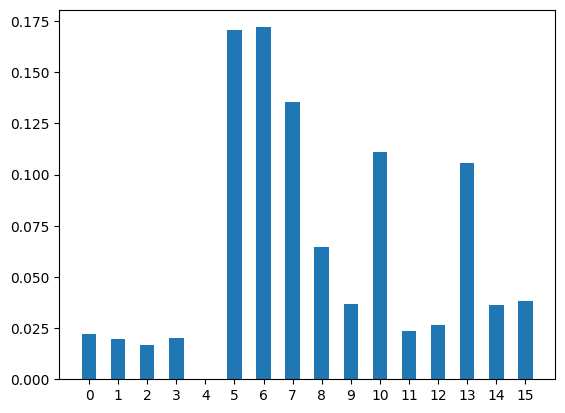



>>> Job ID: cl8091h6mcdhud4hale0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.02414, 2: 0.01614, 1: 0.02048, 14: 0.06768, 3: 0.02056, 0: 0.01328, 7: 0.18179, 10: 0.11305, 15: 0.06695, 8: 0.07503, 12: 0.01456, 5: 0.13858, 13: 0.05726, 4: 0.00872, 6: 0.14405, 9: 0.03773}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.02414, 2: 0.01614, 1: 0.02048, 14: 0.06768, 3: 0.02056, 0: 0.01328, 7: 0.18179, 10: 0.11305, 15: 0.06695, 8: 0.07503, 12: 0.01456, 5: 0.13858, 13: 0.05726, 4: 0.00872, 6: 0.14405, 9: 0.03773}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{11: 0.02414, 2: 0.01614, 1: 0.02048, 14: 0.06768, 3: 0.02056, 0: 0.01328, 7: 0.18179, 10: 0.11305, 15: 0.06695, 8: 0.07503, 12: 0.01456, 5: 0.13858, 13: 0.05726, 4: 0.00872, 6: 0.14405, 9: 0.03773}
0.0028016965875000003


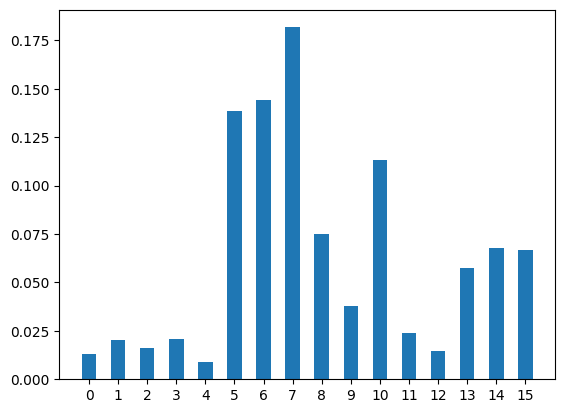



>>> Job ID: cl809295o5utp9bt9560
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00604, 9: 0.03265, 2: 0.02024, 5: 0.078, 12: 0.02016, 11: 0.07216, 4: 0.02338, 6: 0.19505, 13: 0.06141, 8: 0.07143, 14: 0.0589, 3: 0.01696, 0: 0.07505, 7: 0.18979, 15: 0.01396, 10: 0.06482}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00604, 9: 0.03265, 2: 0.02024, 5: 0.078, 12: 0.02016, 11: 0.07216, 4: 0.02338, 6: 0.19505, 13: 0.06141, 8: 0.07143, 14: 0.0589, 3: 0.01696, 0: 0.07505, 7: 0.18979, 15: 0.01396, 10: 0.06482}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{1: 0.00604, 9: 0.03265, 2: 0.02024, 5: 0.078, 12: 0.02016, 11: 0.07216, 4: 0.02338, 6: 0.19505, 13: 0.06141, 8: 0.07143, 14: 0.0589, 3: 0.01696, 0: 0.07505, 7: 0.18979, 15: 0.01396, 10: 0.06482}
0.0029987703125


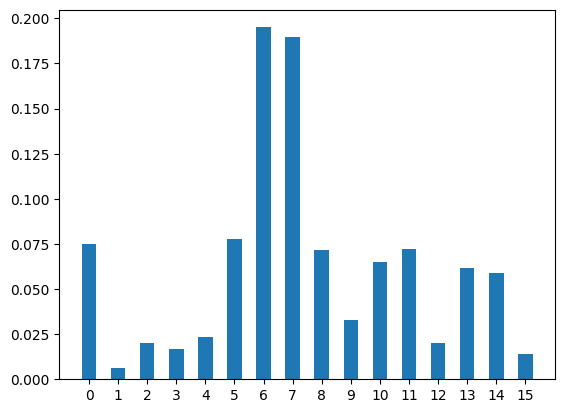



>>> Job ID: cl8093775e3r3c6glmog
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.06623, 10: 0.0066, 15: 0.05482, 2: 0.01406, 11: 0.0714, 8: 0.06288, 5: 0.02116, 12: 0.07901, 9: 0.08518, 0: 0.02037, 3: 0.01667, 7: 0.14972, 4: 0.03015, 6: 0.25076, 13: 0.01013, 1: 0.06086}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.06623, 10: 0.0066, 15: 0.05482, 2: 0.01406, 11: 0.0714, 8: 0.06288, 5: 0.02116, 12: 0.07901, 9: 0.08518, 0: 0.02037, 3: 0.01667, 7: 0.14972, 4: 0.03015, 6: 0.25076, 13: 0.01013, 1: 0.06086}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{14: 0.06623, 10: 0.0066, 15: 0.05482, 2: 0.01406, 11: 0.0714, 8: 0.06288, 5: 0.02116, 12: 0.07901, 9: 0.08518, 0: 0.02037, 3: 0.01667, 7: 0.14972, 4: 0.03015, 6: 0.25076, 13: 0.01013, 1: 0.06086}
0.0036772351374999997


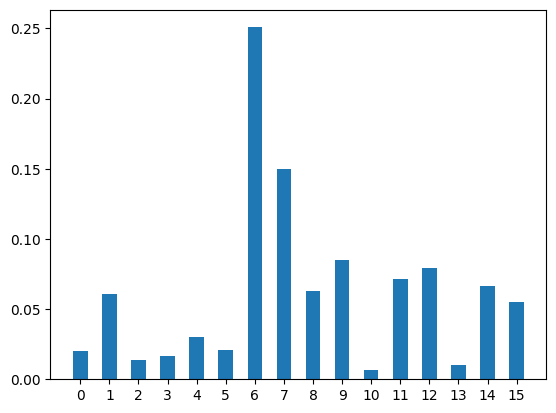



>>> Job ID: cl8094d7pau17fl4efkg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00911, 13: 0.01371, 1: 0.06179, 8: 0.0516, 2: 0.03167, 4: 0.02972, 6: 0.25195, 3: 0.01632, 7: 0.1198, 0: 0.04801, 9: 0.14229, 5: 0.00337, 12: 0.08331, 10: 0.00245, 15: 0.06665, 11: 0.06825}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00911, 13: 0.01371, 1: 0.06179, 8: 0.0516, 2: 0.03167, 4: 0.02972, 6: 0.25195, 3: 0.01632, 7: 0.1198, 0: 0.04801, 9: 0.14229, 5: 0.00337, 12: 0.08331, 10: 0.00245, 15: 0.06665, 11: 0.06825}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{14: 0.00911, 13: 0.01371, 1: 0.06179, 8: 0.0516, 2: 0.03167, 4: 0.02972, 6: 0.25195, 3: 0.01632, 7: 0.1198, 0: 0.04801, 9: 0.14229, 5: 0.00337, 12: 0.08331, 10: 0.00245, 15: 0.06665, 11: 0.06825}
0.003927786075


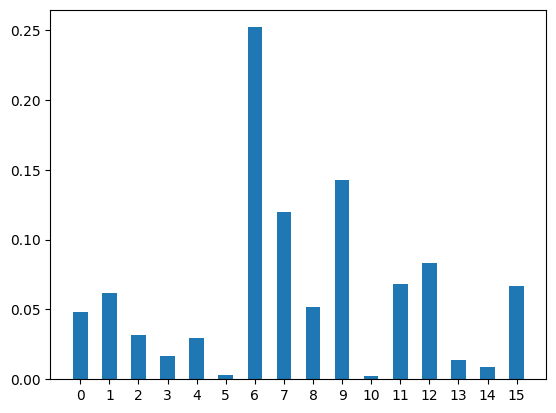



>>> Job ID: cl80957l4q34kqgn9j30
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01923, 14: 0.00833, 13: 0.02915, 8: 0.05544, 5: 0.01555, 12: 0.08253, 10: 0.00303, 15: 0.05481, 2: 0.09063, 4: 0.02882, 6: 0.19177, 11: 0.0531, 9: 0.15323, 3: 0.00523, 0: 0.04531, 7: 0.16384}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01923, 14: 0.00833, 13: 0.02915, 8: 0.05544, 5: 0.01555, 12: 0.08253, 10: 0.00303, 15: 0.05481, 2: 0.09063, 4: 0.02882, 6: 0.19177, 11: 0.0531, 9: 0.15323, 3: 0.00523, 0: 0.04531, 7: 0.16384}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{1: 0.01923, 14: 0.00833, 13: 0.02915, 8: 0.05544, 5: 0.01555, 12: 0.08253, 10: 0.00303, 15: 0.05481, 2: 0.09063, 4: 0.02882, 6: 0.19177, 11: 0.0531, 9: 0.15323, 3: 0.00523, 0: 0.04531, 7: 0.16384}
0.003310742375


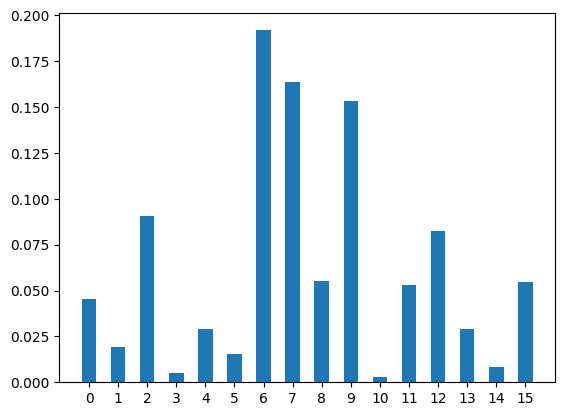



>>> Job ID: cl8096h5o5utp9bt97a0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00513, 11: 0.02745, 5: 0.04381, 12: 0.03838, 9: 0.12182, 8: 0.05708, 4: 0.00175, 6: 0.10369, 13: 0.07378, 3: 0.09233, 0: 0.07896, 7: 0.24729, 1: 0.01821, 10: 0.03457, 15: 0.02208, 14: 0.03367}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00513, 11: 0.02745, 5: 0.04381, 12: 0.03838, 9: 0.12182, 8: 0.05708, 4: 0.00175, 6: 0.10369, 13: 0.07378, 3: 0.09233, 0: 0.07896, 7: 0.24729, 1: 0.01821, 10: 0.03457, 15: 0.02208, 14: 0.03367}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{2: 0.00513, 11: 0.02745, 5: 0.04381, 12: 0.03838, 9: 0.12182, 8: 0.05708, 4: 0.00175, 6: 0.10369, 13: 0.07378, 3: 0.09233, 0: 0.07896, 7: 0.24729, 1: 0.01821, 10: 0.03457, 15: 0.02208, 14: 0.03367}
0.0034392690375


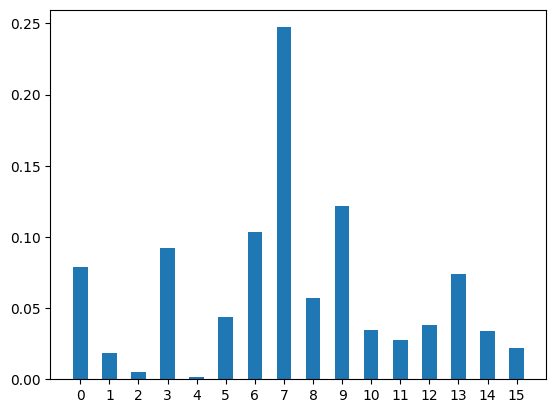



>>> Job ID: cl8097nl4q34kqgn9k6g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01504, 1: 0.08068, 12: 0.00781, 5: 0.04315, 9: 0.05965, 11: 0.0413, 14: 0.06296, 8: 0.0469, 15: 0.00832, 10: 0.09098, 4: 0.06534, 6: 0.04267, 13: 0.07467, 0: 0.01911, 7: 0.30735, 3: 0.03407}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01504, 1: 0.08068, 12: 0.00781, 5: 0.04315, 9: 0.05965, 11: 0.0413, 14: 0.06296, 8: 0.0469, 15: 0.00832, 10: 0.09098, 4: 0.06534, 6: 0.04267, 13: 0.07467, 0: 0.01911, 7: 0.30735, 3: 0.03407}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{2: 0.01504, 1: 0.08068, 12: 0.00781, 5: 0.04315, 9: 0.05965, 11: 0.0413, 14: 0.06296, 8: 0.0469, 15: 0.00832, 10: 0.09098, 4: 0.06534, 6: 0.04267, 13: 0.07467, 0: 0.01911, 7: 0.30735, 3: 0.03407}
0.0045992489


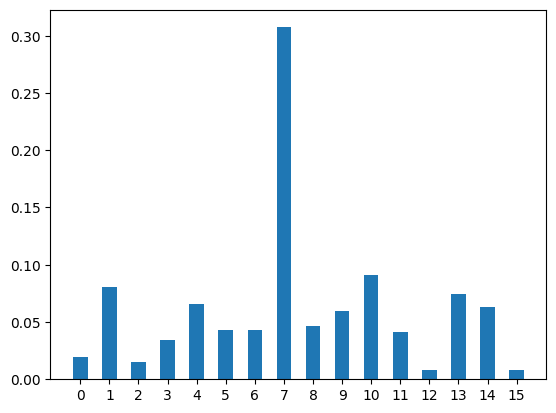



>>> Job ID: cl8098h5o5utp9bt988g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.05352, 12: 0.00767, 5: 0.05664, 15: 0.00876, 10: 0.13535, 2: 0.0619, 14: 0.06287, 0: 0.00824, 3: 0.01289, 7: 0.30992, 6: 0.02811, 4: 0.06555, 9: 0.01161, 13: 0.07341, 8: 0.06686, 1: 0.0367}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.05352, 12: 0.00767, 5: 0.05664, 15: 0.00876, 10: 0.13535, 2: 0.0619, 14: 0.06287, 0: 0.00824, 3: 0.01289, 7: 0.30992, 6: 0.02811, 4: 0.06555, 9: 0.01161, 13: 0.07341, 8: 0.06686, 1: 0.0367}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{11: 0.05352, 12: 0.00767, 5: 0.05664, 15: 0.00876, 10: 0.13535, 2: 0.0619, 14: 0.06287, 0: 0.00824, 3: 0.01289, 7: 0.30992, 6: 0.02811, 4: 0.06555, 9: 0.01161, 13: 0.07341, 8: 0.06686, 1: 0.0367}
0.0051577697749999995


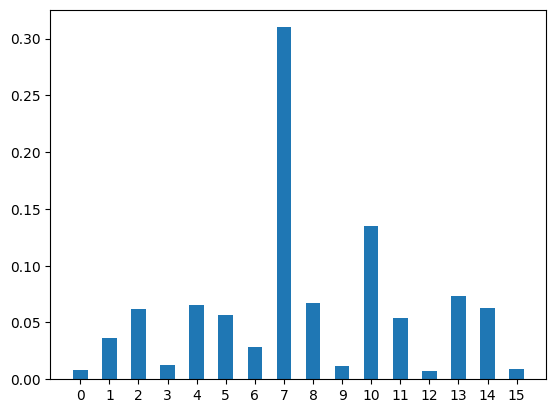



>>> Job ID: cl8099lfa6vtjv8up6b0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00083, 11: 0.05042, 2: 0.05096, 4: 0.00049, 6: 0.02807, 13: 0.04383, 5: 0.12048, 12: 0.0093, 15: 0.03912, 10: 0.14696, 1: 0.03992, 8: 0.1324, 0: 0.00677, 7: 0.24205, 3: 0.02427, 14: 0.06413}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00083, 11: 0.05042, 2: 0.05096, 4: 0.00049, 6: 0.02807, 13: 0.04383, 5: 0.12048, 12: 0.0093, 15: 0.03912, 10: 0.14696, 1: 0.03992, 8: 0.1324, 0: 0.00677, 7: 0.24205, 3: 0.02427, 14: 0.06413}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{9: 0.00083, 11: 0.05042, 2: 0.05096, 4: 0.00049, 6: 0.02807, 13: 0.04383, 5: 0.12048, 12: 0.0093, 15: 0.03912, 10: 0.14696, 1: 0.03992, 8: 0.1324, 0: 0.00677, 7: 0.24205, 3: 0.02427, 14: 0.06413}
0.004096103049999999


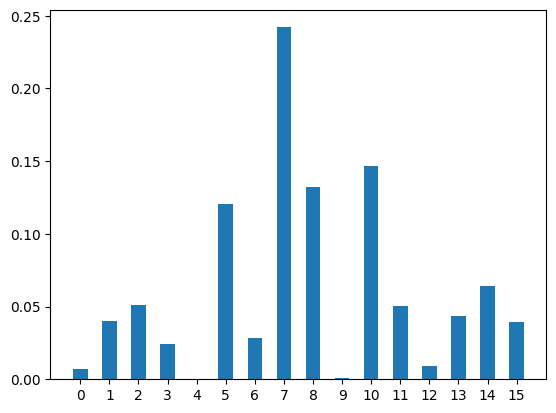



>>> Job ID: cl809a96mcdhud4hap9g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00755, 9: 0.00096, 11: 0.05058, 13: 0.01061, 10: 0.11229, 15: 0.06921, 2: 0.05037, 8: 0.25508, 3: 0.05821, 7: 0.13352, 0: 0.04015, 4: 0.00055, 6: 0.13622, 14: 0.03232, 5: 0.00015, 12: 0.04223}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00755, 9: 0.00096, 11: 0.05058, 13: 0.01061, 10: 0.11229, 15: 0.06921, 2: 0.05037, 8: 0.25508, 3: 0.05821, 7: 0.13352, 0: 0.04015, 4: 0.00055, 6: 0.13622, 14: 0.03232, 5: 0.00015, 12: 0.04223}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{1: 0.00755, 9: 0.00096, 11: 0.05058, 13: 0.01061, 10: 0.11229, 15: 0.06921, 2: 0.05037, 8: 0.25508, 3: 0.05821, 7: 0.13352, 0: 0.04015, 4: 0.00055, 6: 0.13622, 14: 0.03232, 5: 0.00015, 12: 0.04223}
0.0043401893625


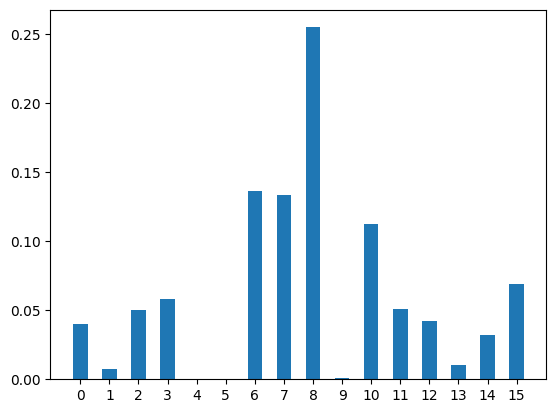



>>> Job ID: cl809bfl4q34kqgn9lug
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00516, 9: 0.0004, 13: 0.00892, 1: 0.00862, 14: 0.02254, 11: 0.05943, 0: 0.04898, 3: 0.04889, 7: 0.13469, 6: 0.10953, 4: 0.05762, 5: 0.00049, 12: 0.08732, 8: 0.28161, 10: 0.05481, 15: 0.07099}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00516, 9: 0.0004, 13: 0.00892, 1: 0.00862, 14: 0.02254, 11: 0.05943, 0: 0.04898, 3: 0.04889, 7: 0.13469, 6: 0.10953, 4: 0.05762, 5: 0.00049, 12: 0.08732, 8: 0.28161, 10: 0.05481, 15: 0.07099}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{2: 0.00516, 9: 0.0004, 13: 0.00892, 1: 0.00862, 14: 0.02254, 11: 0.05943, 0: 0.04898, 3: 0.04889, 7: 0.13469, 6: 0.10953, 4: 0.05762, 5: 0.00049, 12: 0.08732, 8: 0.28161, 10: 0.05481, 15: 0.07099}
0.004683819850000001


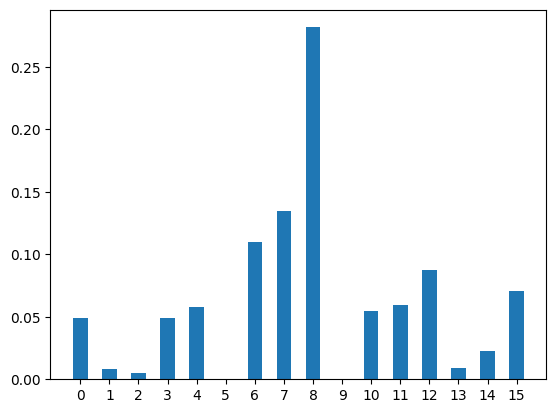



>>> Job ID: cl809c96mcdhud4haqdg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01053, 13: 0.00953, 2: 0.0046, 14: 0.02051, 9: 0.0591, 10: 0.02295, 15: 0.06539, 5: 0.03186, 12: 0.10871, 8: 0.34275, 4: 0.04632, 6: 0.05288, 11: 0.0714, 3: 0.03008, 0: 0.05271, 7: 0.07068}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01053, 13: 0.00953, 2: 0.0046, 14: 0.02051, 9: 0.0591, 10: 0.02295, 15: 0.06539, 5: 0.03186, 12: 0.10871, 8: 0.34275, 4: 0.04632, 6: 0.05288, 11: 0.0714, 3: 0.03008, 0: 0.05271, 7: 0.07068}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{1: 0.01053, 13: 0.00953, 2: 0.0046, 14: 0.02051, 9: 0.0591, 10: 0.02295, 15: 0.06539, 5: 0.03186, 12: 0.10871, 8: 0.34275, 4: 0.04632, 6: 0.05288, 11: 0.0714, 3: 0.03008, 0: 0.05271, 7: 0.07068}
0.0059667489


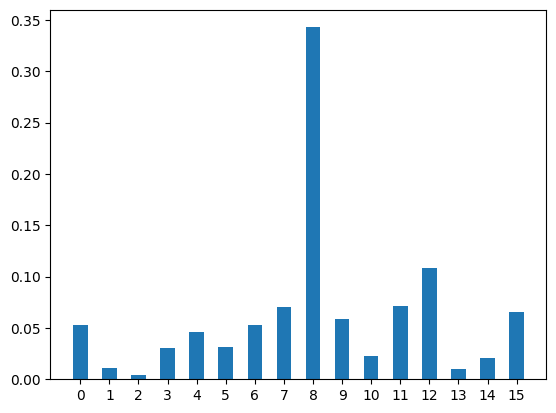



>>> Job ID: cl809df75e3r3c6glrgg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.01809, 1: 0.04549, 2: 0.01102, 4: 0.05793, 6: 0.03993, 9: 0.04164, 11: 0.08209, 3: 0.02111, 7: 0.08737, 0: 0.05367, 8: 0.34432, 5: 0.01968, 12: 0.09679, 14: 0.0149, 15: 0.03131, 10: 0.03466}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.01809, 1: 0.04549, 2: 0.01102, 4: 0.05793, 6: 0.03993, 9: 0.04164, 11: 0.08209, 3: 0.02111, 7: 0.08737, 0: 0.05367, 8: 0.34432, 5: 0.01968, 12: 0.09679, 14: 0.0149, 15: 0.03131, 10: 0.03466}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{13: 0.01809, 1: 0.04549, 2: 0.01102, 4: 0.05793, 6: 0.03993, 9: 0.04164, 11: 0.08209, 3: 0.02111, 7: 0.08737, 0: 0.05367, 8: 0.34432, 5: 0.01968, 12: 0.09679, 14: 0.0149, 15: 0.03131, 10: 0.03466}
0.005944756537500001


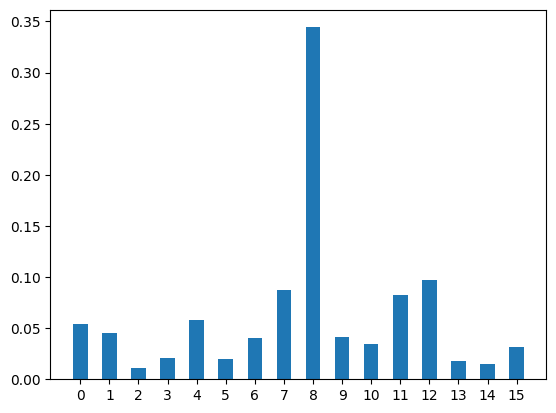



>>> Job ID: cl809ef75e3r3c6glrtg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{15: 0.00294, 10: 0.03744, 2: 0.04018, 11: 0.07259, 0: 0.03601, 3: 0.00493, 7: 0.08689, 14: 0.03078, 1: 0.06311, 9: 0.25998, 12: 0.05494, 5: 0.06024, 8: 0.12498, 13: 0.05063, 6: 0.05083, 4: 0.02353}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {15: 0.00294, 10: 0.03744, 2: 0.04018, 11: 0.07259, 0: 0.03601, 3: 0.00493, 7: 0.08689, 14: 0.03078, 1: 0.06311, 9: 0.25998, 12: 0.05494, 5: 0.06024, 8: 0.12498, 13: 0.05063, 6: 0.05083, 4: 0.02353}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{15: 0.00294, 10: 0.03744, 2: 0.04018, 11: 0.07259, 0: 0.03601, 3: 0.00493, 7: 0.08689, 14: 0.03078, 1: 0.06311, 9: 0.25998, 12: 0.05494, 5: 0.06024, 8: 0.12498, 13: 0.05063, 6: 0.05083, 4: 0.02353}
0.0034470577499999995


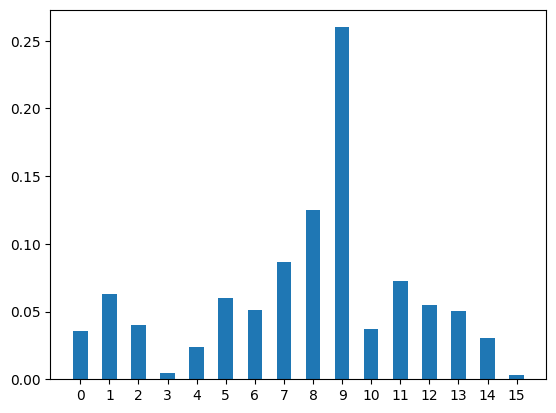

In [57]:
var1 = []
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  var1.append(np.var(prob))
  print(np.var(prob))
  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

#4. Adding Chutes and Ladders in Board

1) Chutes & Ladder Operator (Notated CL)

Chutes & Ladder Operator

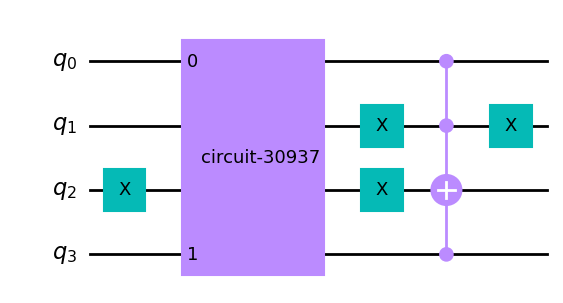

In [58]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

Verifying Chutes & Ladder Operator (3 <-> 10)

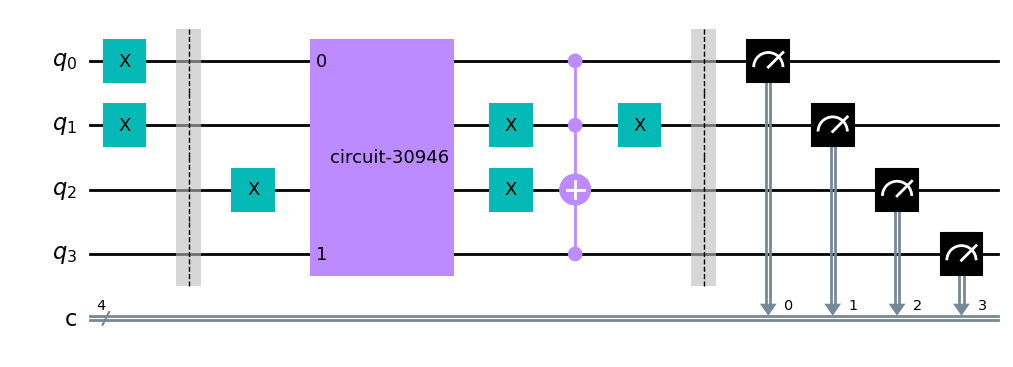

In [59]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl809fn75e3r3c6glsf0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


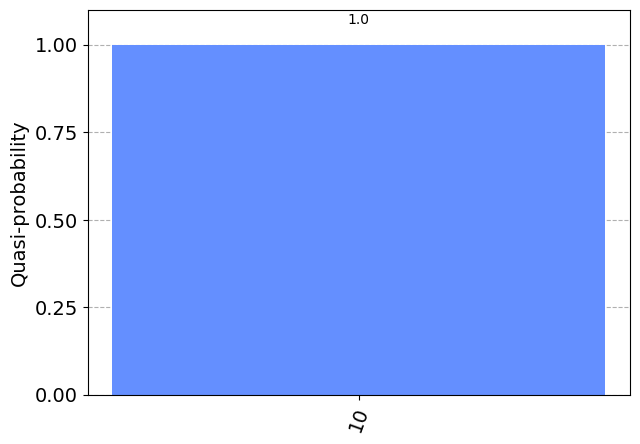

In [60]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 3 <-> 10
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (9 <-> 13)

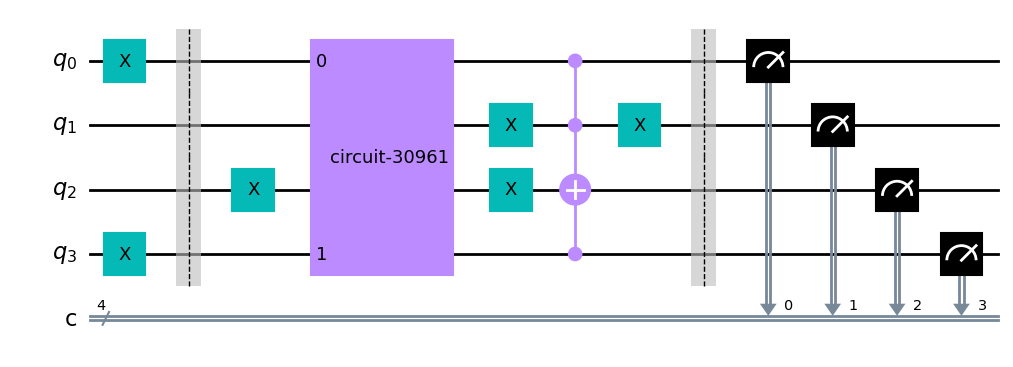

In [61]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(3)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl809gf75e3r3c6glsp0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


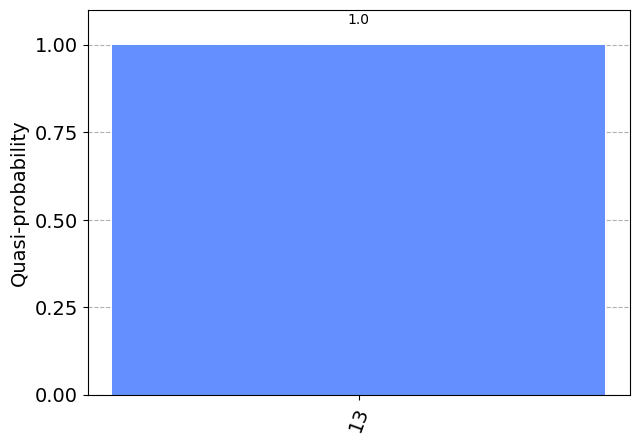

In [62]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 9 <-> 13
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (7 <-> 7)

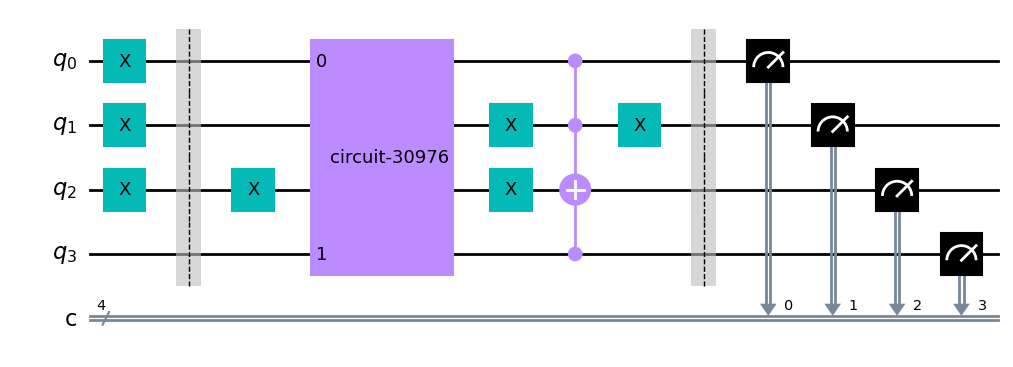

In [63]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)
CL.x(2)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl809gvl4q34kqgn9obg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{7: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {7: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


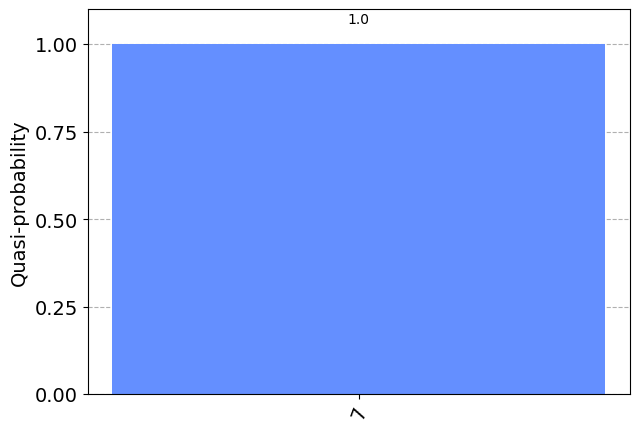

In [64]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 7 <-> 7
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Chutes & Ladders Board Evolution Operator

Chutes & Ladder Operator

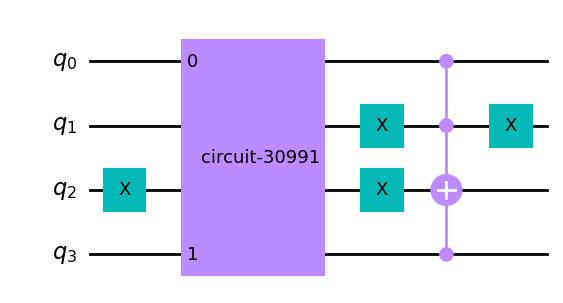

In [65]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

1 Step Chutes & Ladders Board Evolution Operator

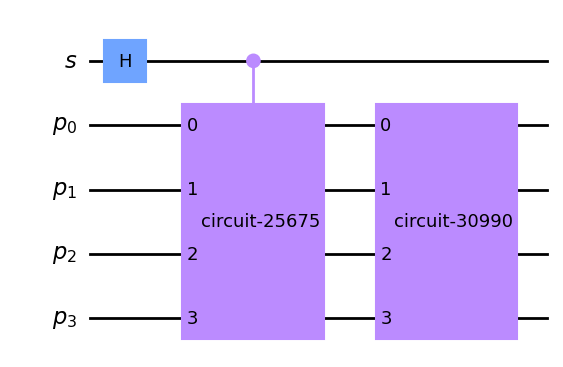

In [66]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])
circuit.append(CL, [p0, p1, p2, p3])

circuit.draw("mpl")

#5. Discussion

1) Role of Measurement in Quantum Chutes and Ladders Game

State measurement makes wave function collapse. Collapse of wave function arises randomness of Quantum Chutes and Ladders Game.

2) Measurement between Turns

Repetition of measurement and initializaing states is just repetition of 1 step evolution. Repetition of measurement can obtain probability of each state after 1 step evolution.

3) No Measurement between Turns

No measurement makes unitary evolution by each step. This procedure can obtain quantum superposition of states.

4) Quantum Analog of the "Memoryless" Nature of the Classical Game?

Quantum walks are quantum analogues of classical random walks.

Classical Walk : Walker occupy definite states and randomness arises from stocastic transitions defined by Markov's Process.

Quantum Walk : Randomness arises through quantum superposition of states, non-random, reversible unitary evolution and collapse of the wave function due to state measurements.

#6. Compare between #3 & #4 (10 Step)

1) Task 3 (Not Containing Chutes & Ladders)

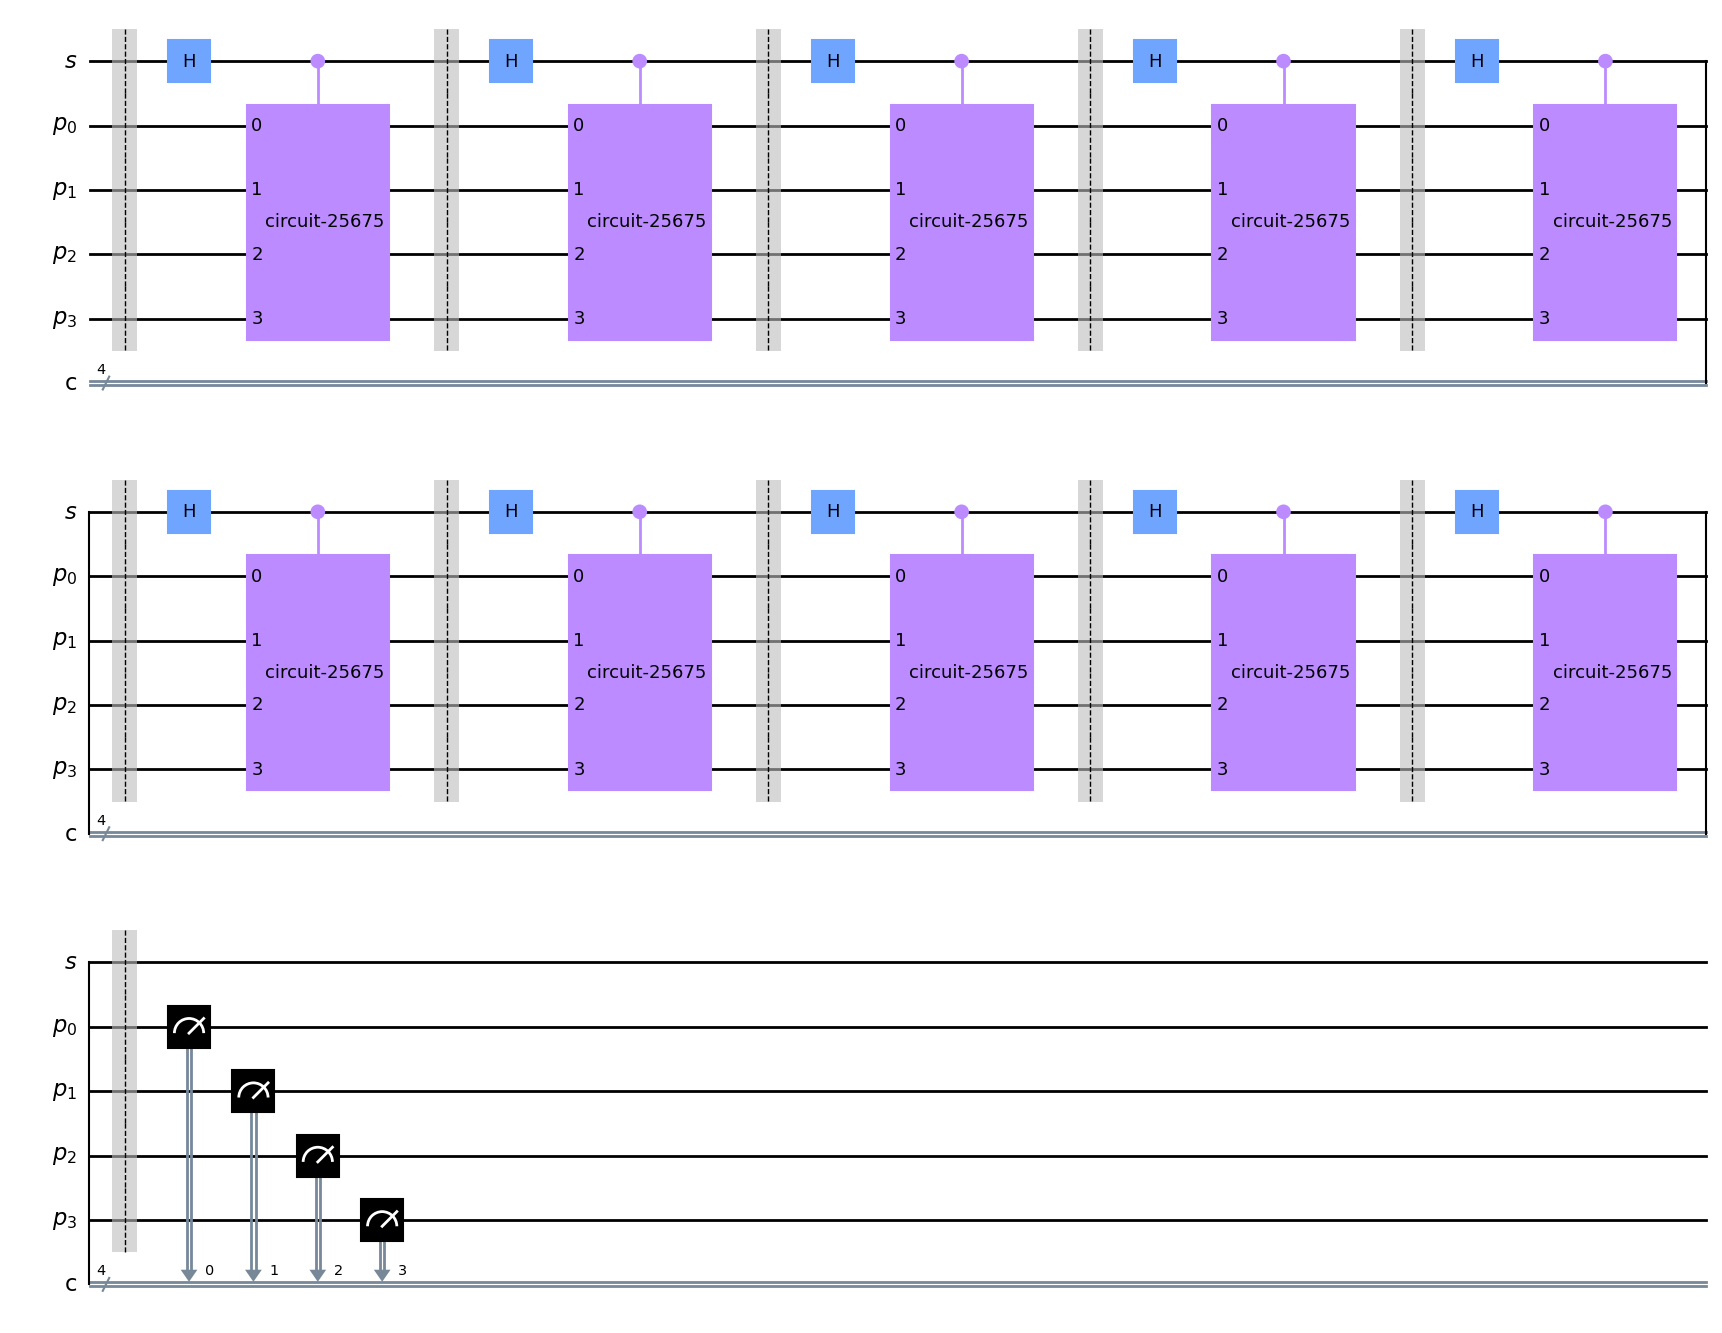

In [67]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl809ht7pau17fl4eljg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00105, 1: 0.08003, 9: 0.0495, 2: 0.43949, 4: 0.09522, 6: 0.05094, 8: 0.0871, 5: 0.06995, 0: 0.0009, 3: 0.06199, 7: 0.06383}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00105, 1: 0.08003, 9: 0.0495, 2: 0.43949, 4: 0.09522, 6: 0.05094, 8: 0.0871, 5: 0.06995, 0: 0.0009, 3: 0.06199, 7: 0.06383}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


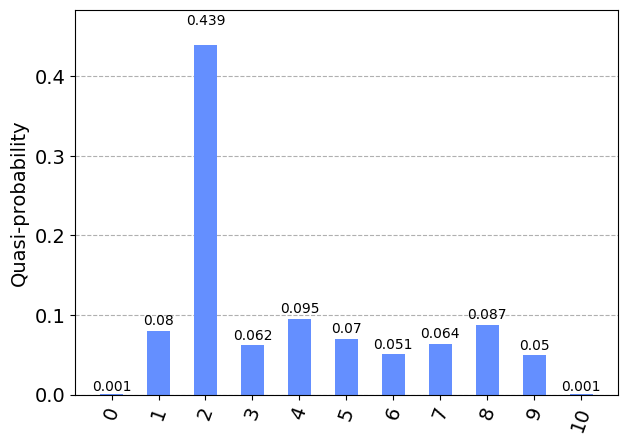

In [68]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Task 4 (Not Containing Chutes & Ladders)

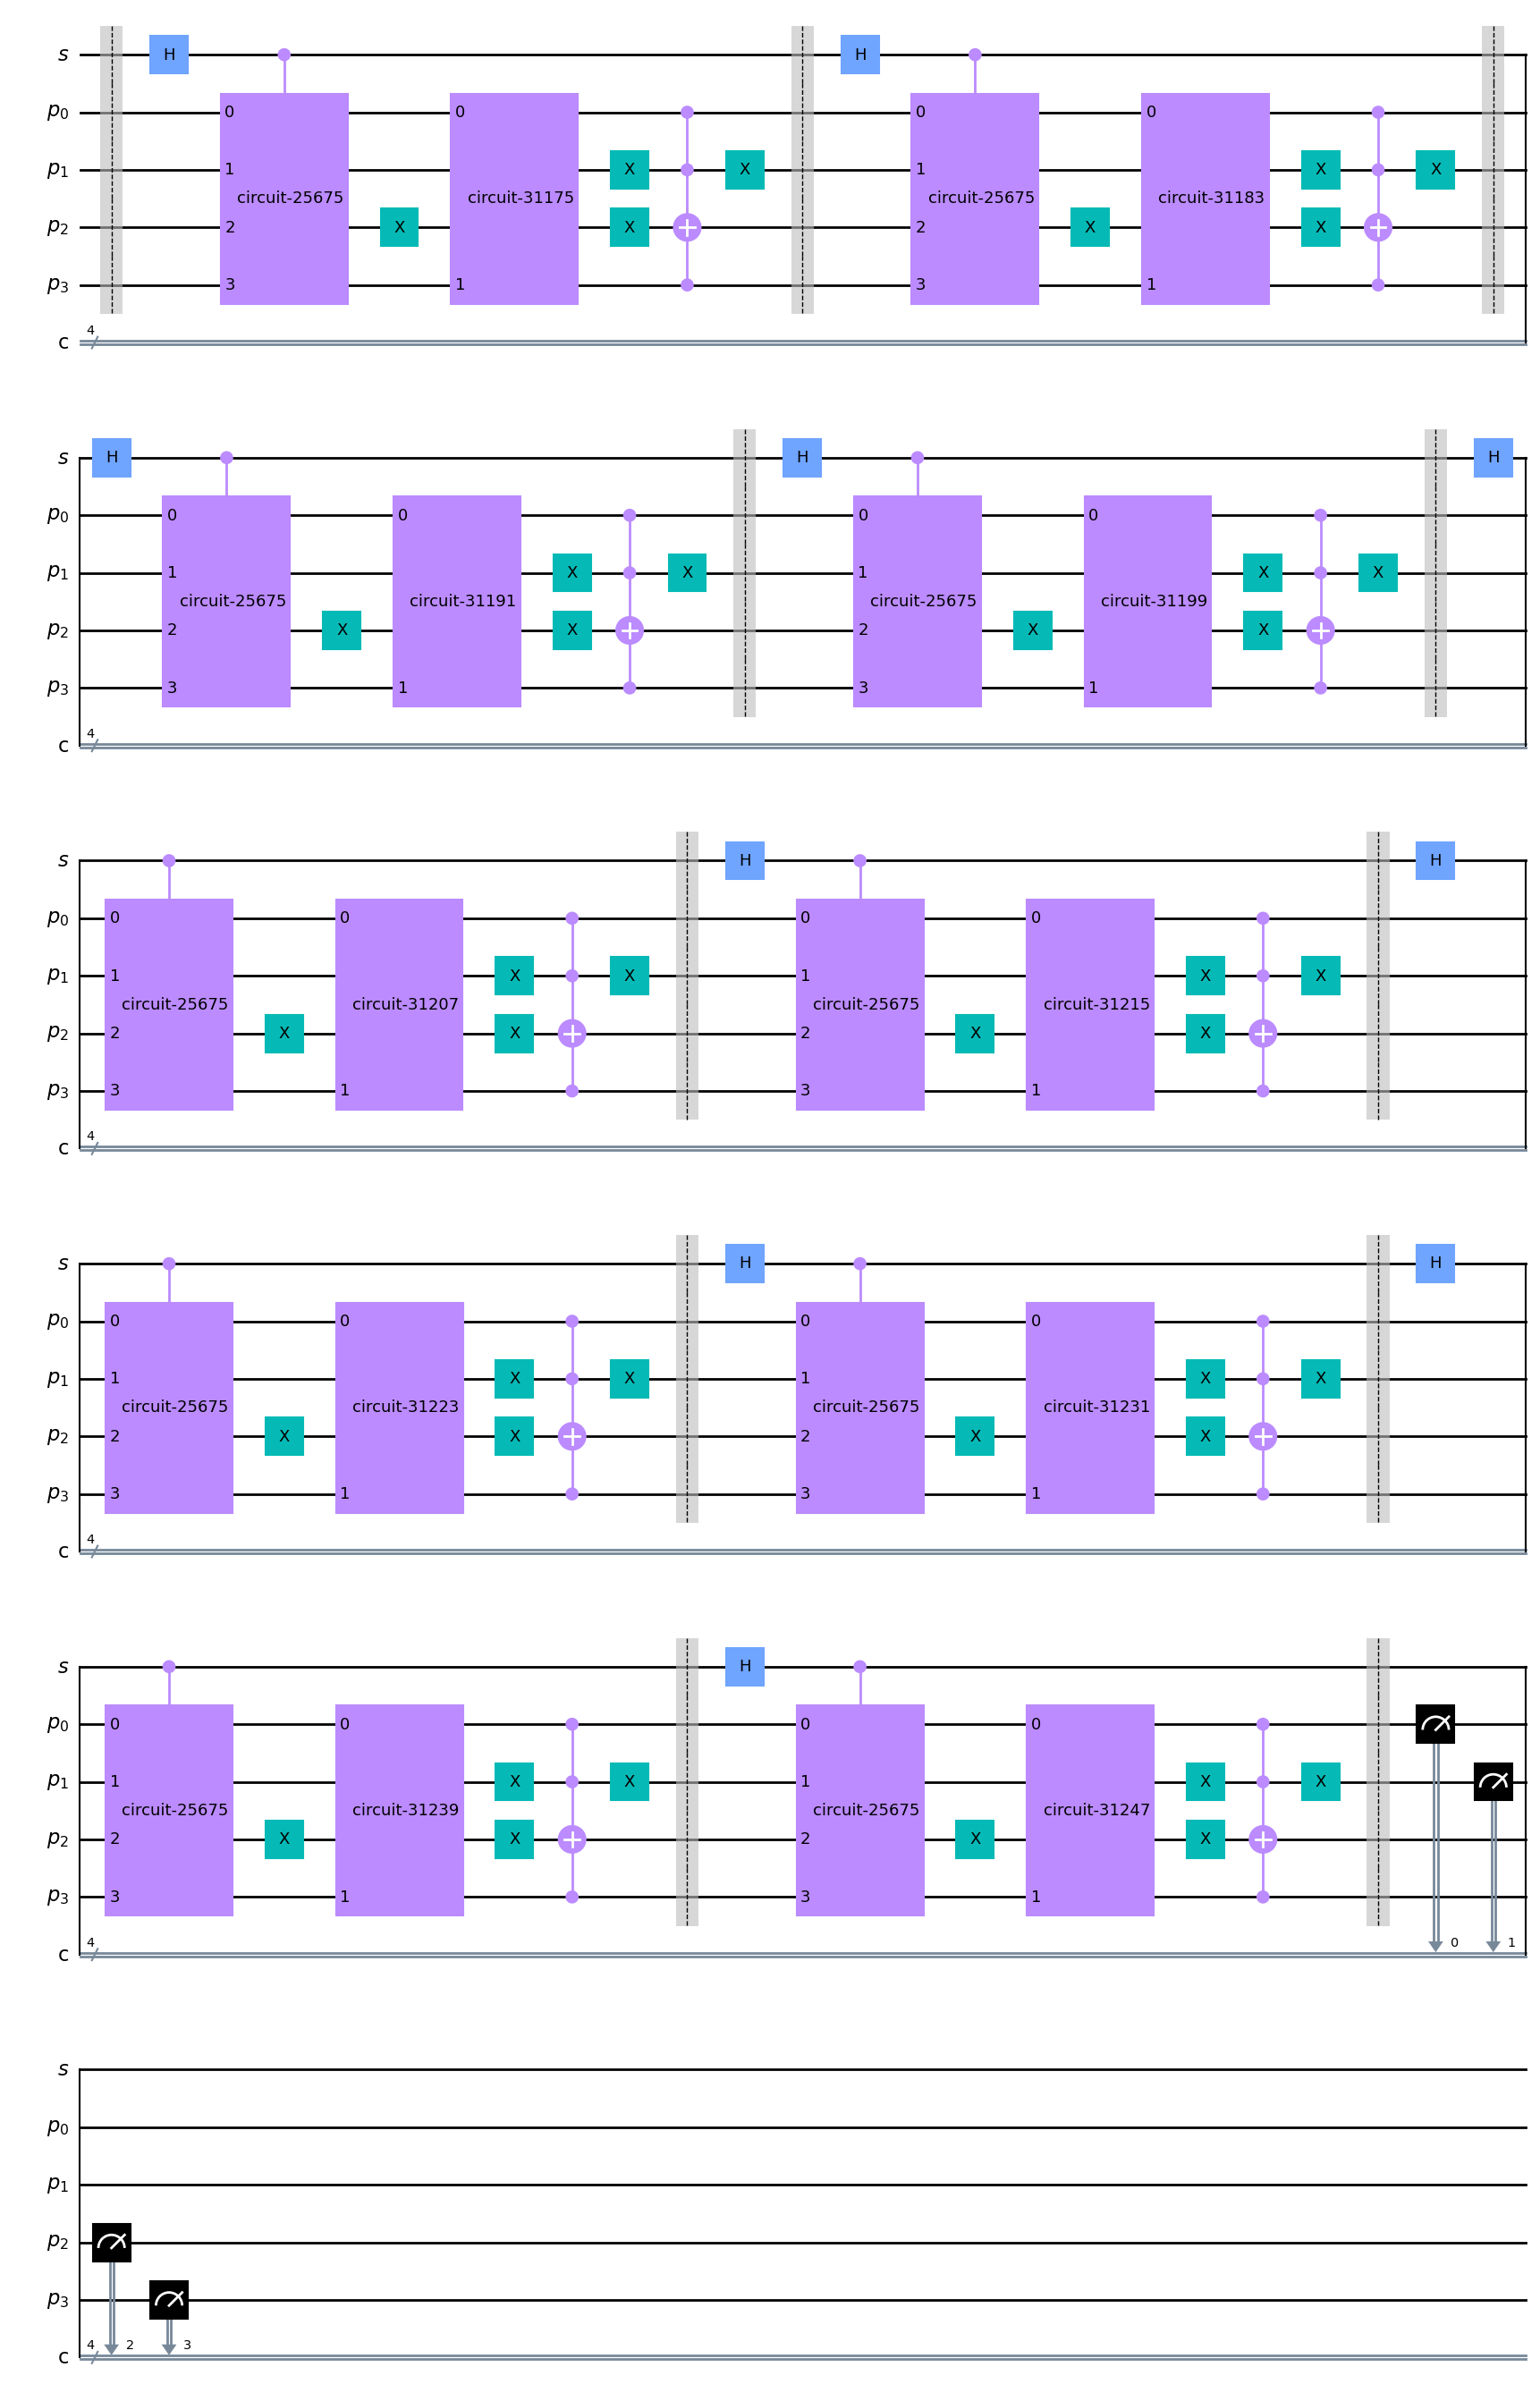

In [69]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

  qc1 = QuantumCircuit(2)
  qc1.swap(0,1)
  CSwapgate = qc1.to_gate().control(2)

  circuit.x(p2)
  circuit.append(CSwapgate, [p1,p2,p0,p3])
  circuit.x(p2)
  circuit.x(p1)
  circuit.append(C3XGate(), [p0,p1,p3,p2])
  circuit.x(p1)

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl809j96mcdhud4hat7g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00469, 13: 0.01002, 8: 0.02566, 9: 0.03567, 1: 0.08001, 2: 0.43873, 0: 0.00178, 7: 0.01364, 3: 0.08118, 12: 0.05092, 5: 0.05918, 6: 0.00468, 4: 0.01993, 11: 0.07969, 15: 0.01634, 10: 0.07788}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00469, 13: 0.01002, 8: 0.02566, 9: 0.03567, 1: 0.08001, 2: 0.43873, 0: 0.00178, 7: 0.01364, 3: 0.08118, 12: 0.05092, 5: 0.05918, 6: 0.00468, 4: 0.01993, 11: 0.07969, 15: 0.01634, 10: 0.07788}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


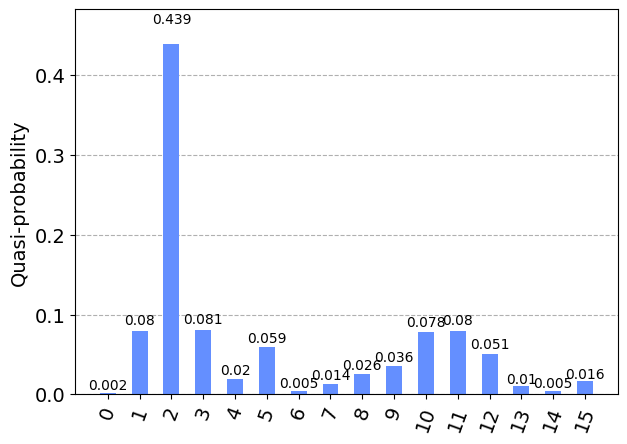

In [70]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

3) N Step Board Operator Containing Chutes & Ladders

>>> Job ID: cl809k16mcdhud4hatl0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}
0.05859375


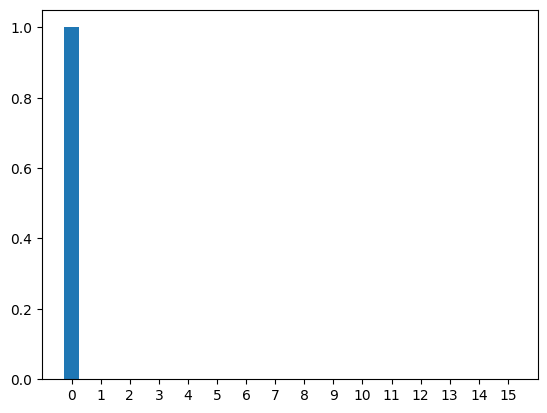



>>> Job ID: cl809knl4q34kqgn9q30
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.50008, 0: 0.49992}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.50008, 0: 0.49992}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{1: 0.50008, 0: 0.49992}
0.027343750799999997


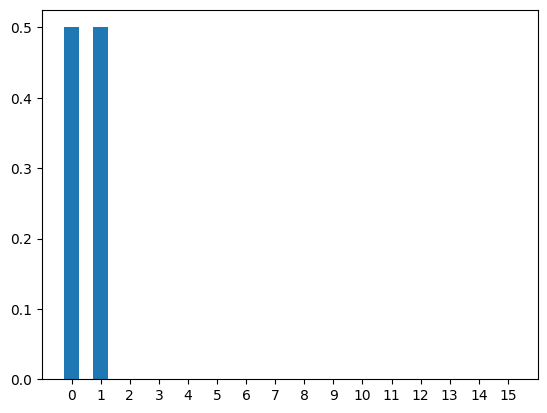



>>> Job ID: cl809l16mcdhud4hau5g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.25095, 0: 0.2485, 1: 0.50055}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.25095, 0: 0.2485, 1: 0.50055}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{2: 0.25095, 0: 0.2485, 1: 0.50055}
0.019548653437500004


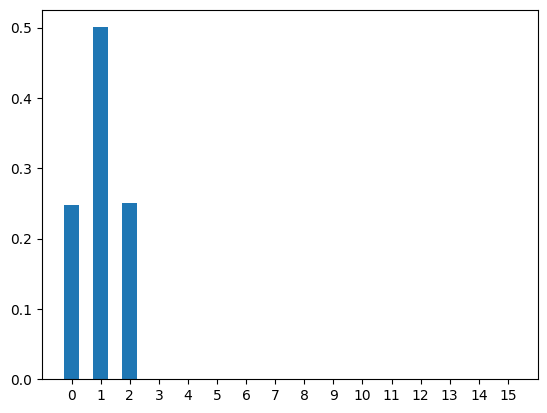



>>> Job ID: cl809ln75e3r3c6glv7g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.12372, 1: 0.62696, 0: 0.12563, 2: 0.12369}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.12372, 1: 0.62696, 0: 0.12563, 2: 0.12369}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{10: 0.12372, 1: 0.62696, 0: 0.12563, 2: 0.12369}
0.023560474562499996


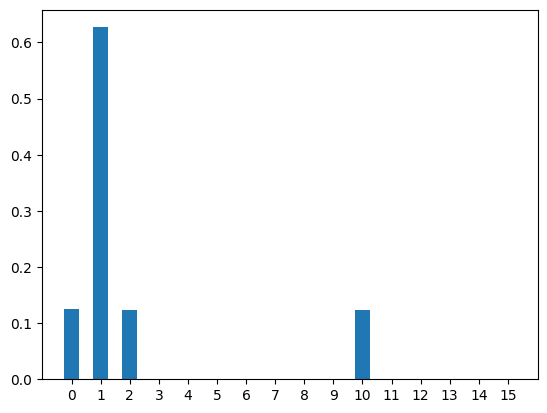



>>> Job ID: cl809mf75e3r3c6glvgg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.06215, 0: 0.06353, 2: 0.12445, 11: 0.06348, 1: 0.62358, 3: 0.06281}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.06215, 0: 0.06353, 2: 0.12445, 11: 0.06348, 1: 0.62358, 3: 0.06281}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{10: 0.06215, 0: 0.06353, 2: 0.12445, 11: 0.06348, 1: 0.62358, 3: 0.06281}
0.022357081800000005


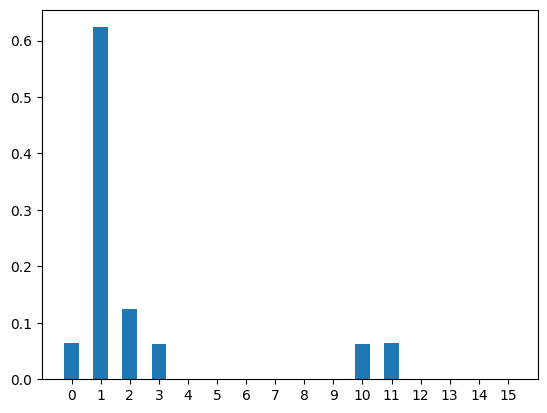



>>> Job ID: cl809n5fa6vtjv8upc1g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.03094, 12: 0.03093, 1: 0.5307, 2: 0.12489, 3: 0.03117, 0: 0.03184, 11: 0.06271, 10: 0.15682}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.03094, 12: 0.03093, 1: 0.5307, 2: 0.12489, 3: 0.03117, 0: 0.03184, 11: 0.06271, 10: 0.15682}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{4: 0.03094, 12: 0.03093, 1: 0.5307, 2: 0.12489, 3: 0.03117, 0: 0.03184, 11: 0.06271, 10: 0.15682}
0.016697772599999997


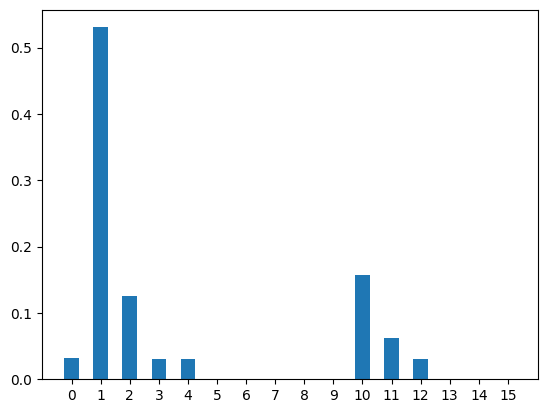



>>> Job ID: cl809nl7pau17fl4eoag
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01535, 3: 0.01593, 0: 0.01585, 2: 0.20392, 5: 0.0158, 12: 0.07772, 1: 0.40572, 4: 0.03116, 11: 0.14179, 10: 0.07676}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01535, 3: 0.01593, 0: 0.01585, 2: 0.20392, 5: 0.0158, 12: 0.07772, 1: 0.40572, 4: 0.03116, 11: 0.14179, 10: 0.07676}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{9: 0.01535, 3: 0.01593, 0: 0.01585, 2: 0.20392, 5: 0.0158, 12: 0.07772, 1: 0.40572, 4: 0.03116, 11: 0.14179, 10: 0.07676}
0.011105636275


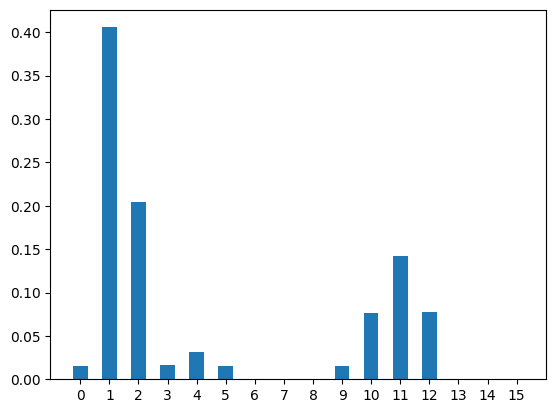



>>> Job ID: cl809odfa6vtjv8upchg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00825, 4: 0.00791, 6: 0.00793, 10: 0.01512, 11: 0.07835, 2: 0.31992, 9: 0.07092, 5: 0.03897, 12: 0.07842, 1: 0.28763, 0: 0.00799, 3: 0.07859}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00825, 4: 0.00791, 6: 0.00793, 10: 0.01512, 11: 0.07835, 2: 0.31992, 9: 0.07092, 5: 0.03897, 12: 0.07842, 1: 0.28763, 0: 0.00799, 3: 0.07859}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{13: 0.00825, 4: 0.00791, 6: 0.00793, 10: 0.01512, 11: 0.07835, 2: 0.31992, 9: 0.07092, 5: 0.03897, 12: 0.07842, 1: 0.28763, 0: 0.00799, 3: 0.07859}
0.009254931724999998


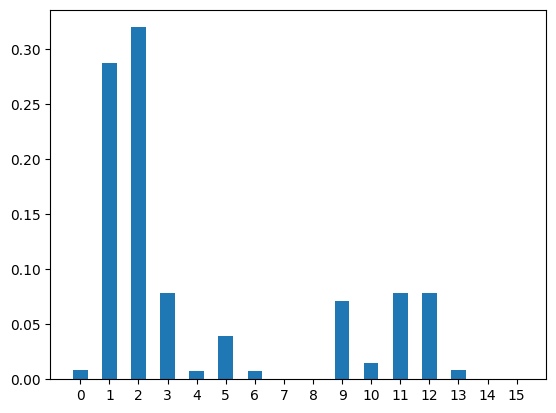



>>> Job ID: cl809op5o5utp9bt9frg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00374, 10: 0.01982, 9: 0.01979, 4: 0.06719, 6: 0.03958, 5: 0.00776, 12: 0.07839, 13: 0.03546, 2: 0.41143, 11: 0.06313, 1: 0.19456, 7: 0.00426, 0: 0.00366, 3: 0.05123}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00374, 10: 0.01982, 9: 0.01979, 4: 0.06719, 6: 0.03958, 5: 0.00776, 12: 0.07839, 13: 0.03546, 2: 0.41143, 11: 0.06313, 1: 0.19456, 7: 0.00426, 0: 0.00366, 3: 0.05123}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{14: 0.00374, 10: 0.01982, 9: 0.01979, 4: 0.06719, 6: 0.03958, 5: 0.00776, 12: 0.07839, 13: 0.03546, 2: 0.41143, 11: 0.06313, 1: 0.19456, 7: 0.00426, 0: 0.00366, 3: 0.05123}
0.010350740587500002


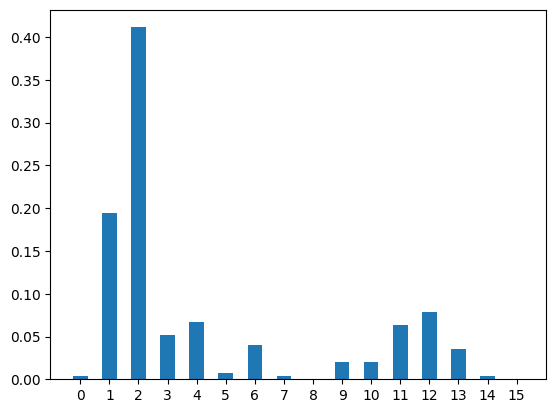



>>> Job ID: cl809qvl4q34kqgn9spg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.00211, 13: 0.00192, 14: 0.01903, 9: 0.08727, 11: 0.0487, 6: 0.0083, 4: 0.05068, 2: 0.45343, 0: 0.00177, 7: 0.03259, 3: 0.02019, 1: 0.12645, 5: 0.0262, 12: 0.03906, 15: 0.00211, 10: 0.08019}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.00211, 13: 0.00192, 14: 0.01903, 9: 0.08727, 11: 0.0487, 6: 0.0083, 4: 0.05068, 2: 0.45343, 0: 0.00177, 7: 0.03259, 3: 0.02019, 1: 0.12645, 5: 0.0262, 12: 0.03906, 15: 0.00211, 10: 0.08019}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{8: 0.00211, 13: 0.00192, 14: 0.01903, 9: 0.08727, 11: 0.0487, 6: 0.0083, 4: 0.05068, 2: 0.45343, 0: 0.00177, 7: 0.03259, 3: 0.02019, 1: 0.12645, 5: 0.0262, 12: 0.03906, 15: 0.00211, 10: 0.08019}
0.0113877269375


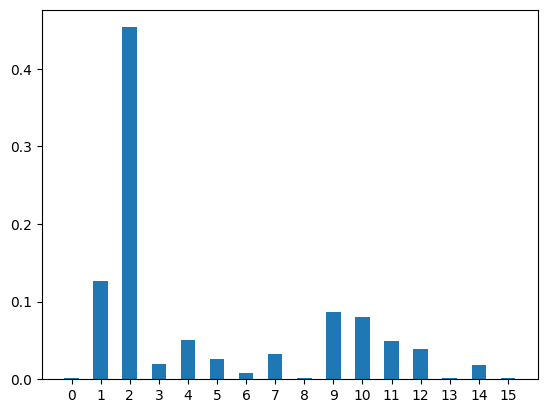



>>> Job ID: cl809r96mcdhud4hb180
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00988, 14: 0.00493, 8: 0.02472, 9: 0.03625, 6: 0.00498, 4: 0.01897, 15: 0.01685, 10: 0.07836, 1: 0.08109, 2: 0.43746, 5: 0.05911, 12: 0.05181, 7: 0.01305, 0: 0.00218, 3: 0.07961, 11: 0.08075}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00988, 14: 0.00493, 8: 0.02472, 9: 0.03625, 6: 0.00498, 4: 0.01897, 15: 0.01685, 10: 0.07836, 1: 0.08109, 2: 0.43746, 5: 0.05911, 12: 0.05181, 7: 0.01305, 0: 0.00218, 3: 0.07961, 11: 0.08075}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{13: 0.00988, 14: 0.00493, 8: 0.02472, 9: 0.03625, 6: 0.00498, 4: 0.01897, 15: 0.01685, 10: 0.07836, 1: 0.08109, 2: 0.43746, 5: 0.05911, 12: 0.05181, 7: 0.01305, 0: 0.00218, 3: 0.07961, 11: 0.08075}
0.0102196506875


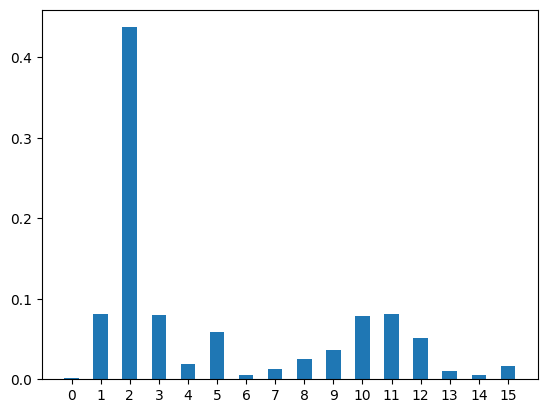



>>> Job ID: cl809s16mcdhud4hb1i0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00642, 9: 0.01919, 11: 0.10251, 0: 0.01236, 7: 0.00104, 3: 0.03212, 1: 0.05135, 8: 0.02013, 12: 0.08877, 5: 0.01802, 2: 0.38803, 13: 0.02948, 15: 0.00496, 10: 0.11173, 6: 0.06366, 4: 0.05023}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00642, 9: 0.01919, 11: 0.10251, 0: 0.01236, 7: 0.00104, 3: 0.03212, 1: 0.05135, 8: 0.02013, 12: 0.08877, 5: 0.01802, 2: 0.38803, 13: 0.02948, 15: 0.00496, 10: 0.11173, 6: 0.06366, 4: 0.05023}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{14: 0.00642, 9: 0.01919, 11: 0.10251, 0: 0.01236, 7: 0.00104, 3: 0.03212, 1: 0.05135, 8: 0.02013, 12: 0.08877, 5: 0.01802, 2: 0.38803, 13: 0.02948, 15: 0.00496, 10: 0.11173, 6: 0.06366, 4: 0.05023}
0.008210649075


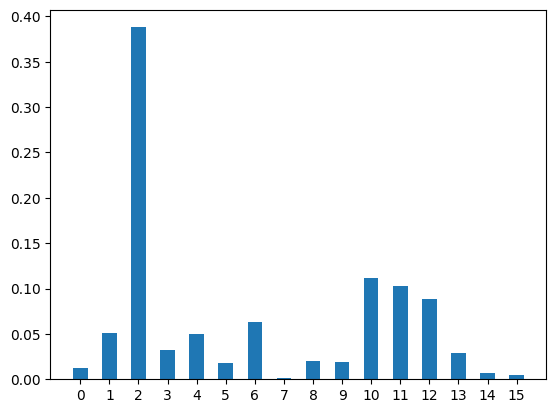



>>> Job ID: cl809sp5o5utp9bt9hcg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00047, 8: 0.0014, 6: 0.02193, 4: 0.03675, 0: 0.00966, 7: 0.04904, 3: 0.10914, 13: 0.03847, 1: 0.04057, 10: 0.11698, 15: 0.00726, 2: 0.31368, 14: 0.03028, 12: 0.0919, 5: 0.02715, 11: 0.10532}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00047, 8: 0.0014, 6: 0.02193, 4: 0.03675, 0: 0.00966, 7: 0.04904, 3: 0.10914, 13: 0.03847, 1: 0.04057, 10: 0.11698, 15: 0.00726, 2: 0.31368, 14: 0.03028, 12: 0.0919, 5: 0.02715, 11: 0.10532}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{9: 0.00047, 8: 0.0014, 6: 0.02193, 4: 0.03675, 0: 0.00966, 7: 0.04904, 3: 0.10914, 13: 0.03847, 1: 0.04057, 10: 0.11698, 15: 0.00726, 2: 0.31368, 14: 0.03028, 12: 0.0919, 5: 0.02715, 11: 0.10532}
0.0056370871625


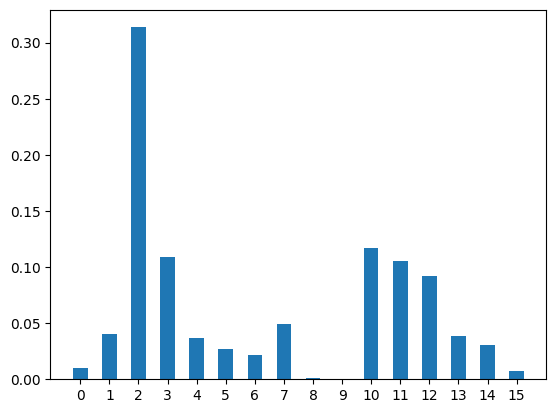



>>> Job ID: cl809tf75e3r3c6gm2kg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00018, 1: 0.01564, 14: 0.01211, 5: 0.00995, 12: 0.09197, 7: 0.02559, 0: 0.00605, 3: 0.10999, 8: 0.02518, 2: 0.26293, 4: 0.07607, 6: 0.04917, 9: 0.06626, 15: 0.01892, 10: 0.14707, 11: 0.08292}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00018, 1: 0.01564, 14: 0.01211, 5: 0.00995, 12: 0.09197, 7: 0.02559, 0: 0.00605, 3: 0.10999, 8: 0.02518, 2: 0.26293, 4: 0.07607, 6: 0.04917, 9: 0.06626, 15: 0.01892, 10: 0.14707, 11: 0.08292}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 0.00018, 1: 0.01564, 14: 0.01211, 5: 0.00995, 12: 0.09197, 7: 0.02559, 0: 0.00605, 3: 0.10999, 8: 0.02518, 2: 0.26293, 4: 0.07607, 6: 0.04917, 9: 0.06626, 15: 0.01892, 10: 0.14707, 11: 0.08292}
0.0044038902875


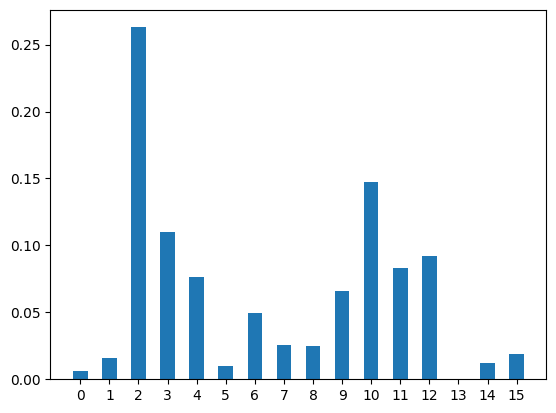



>>> Job ID: cl809ud7pau17fl4erag
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00589, 8: 0.03517, 13: 0.00797, 6: 0.00647, 4: 0.04935, 12: 0.02168, 5: 0.07821, 11: 0.06771, 1: 0.01929, 15: 0.01986, 10: 0.1048, 9: 0.0877, 2: 0.21991, 3: 0.21391, 7: 0.05504, 0: 0.00704}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00589, 8: 0.03517, 13: 0.00797, 6: 0.00647, 4: 0.04935, 12: 0.02168, 5: 0.07821, 11: 0.06771, 1: 0.01929, 15: 0.01986, 10: 0.1048, 9: 0.0877, 2: 0.21991, 3: 0.21391, 7: 0.05504, 0: 0.00704}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{14: 0.00589, 8: 0.03517, 13: 0.00797, 6: 0.00647, 4: 0.04935, 12: 0.02168, 5: 0.07821, 11: 0.06771, 1: 0.01929, 15: 0.01986, 10: 0.1048, 9: 0.0877, 2: 0.21991, 3: 0.21391, 7: 0.05504, 0: 0.00704}
0.0043201005625


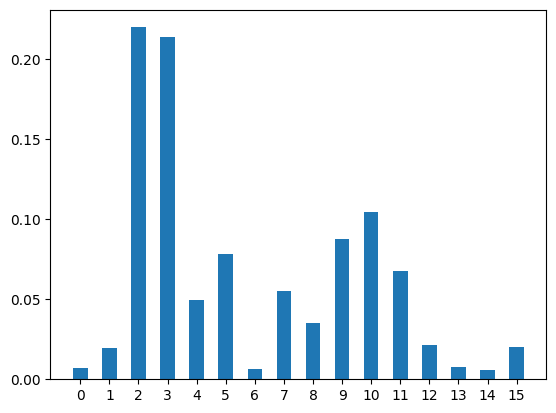



>>> Job ID: cl809uv75e3r3c6gm39g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00441, 1: 0.01706, 9: 0.02452, 8: 0.04651, 7: 0.01335, 0: 0.02541, 3: 0.1499, 2: 0.10599, 13: 0.07576, 15: 0.00461, 10: 0.12451, 6: 0.02423, 4: 0.2394, 11: 0.04512, 12: 0.02654, 5: 0.07268}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00441, 1: 0.01706, 9: 0.02452, 8: 0.04651, 7: 0.01335, 0: 0.02541, 3: 0.1499, 2: 0.10599, 13: 0.07576, 15: 0.00461, 10: 0.12451, 6: 0.02423, 4: 0.2394, 11: 0.04512, 12: 0.02654, 5: 0.07268}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{14: 0.00441, 1: 0.01706, 9: 0.02452, 8: 0.04651, 7: 0.01335, 0: 0.02541, 3: 0.1499, 2: 0.10599, 13: 0.07576, 15: 0.00461, 10: 0.12451, 6: 0.02423, 4: 0.2394, 11: 0.04512, 12: 0.02654, 5: 0.07268}
0.0038930171250000003


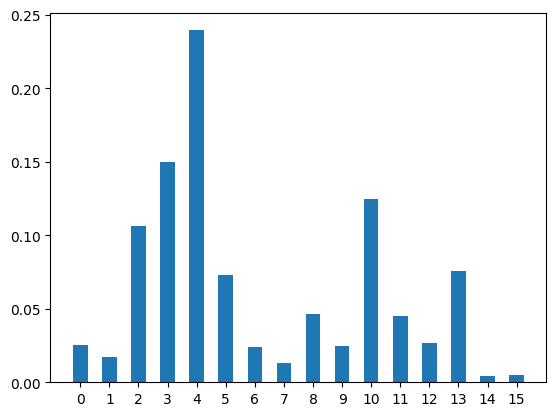



>>> Job ID: cl809vtfa6vtjv8upg10
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 8e-05, 13: 0.025, 11: 0.04744, 1: 0.03606, 15: 0.00522, 10: 0.04281, 8: 0.0369, 2: 0.07304, 12: 0.05055, 5: 0.10444, 9: 0.08144, 6: 0.02503, 4: 0.34493, 7: 0.00578, 0: 0.00503, 3: 0.11625}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 8e-05, 13: 0.025, 11: 0.04744, 1: 0.03606, 15: 0.00522, 10: 0.04281, 8: 0.0369, 2: 0.07304, 12: 0.05055, 5: 0.10444, 9: 0.08144, 6: 0.02503, 4: 0.34493, 7: 0.00578, 0: 0.00503, 3: 0.11625}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{14: 8e-05, 13: 0.025, 11: 0.04744, 1: 0.03606, 15: 0.00522, 10: 0.04281, 8: 0.0369, 2: 0.07304, 12: 0.05055, 5: 0.10444, 9: 0.08144, 6: 0.02503, 4: 0.34493, 7: 0.00578, 0: 0.00503, 3: 0.11625}
0.0064689841875000004


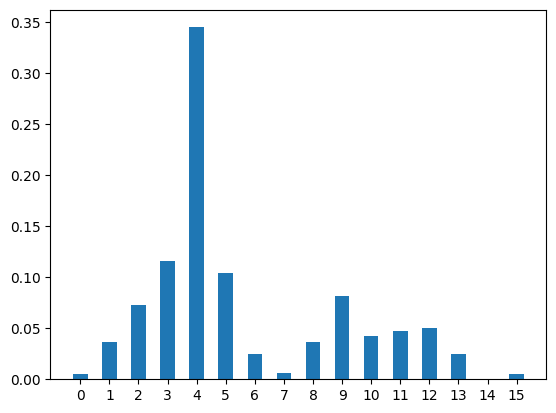



>>> Job ID: cl80a1dfa6vtjv8upgqg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00139, 9: 0.01939, 8: 0.00528, 15: 0.00415, 10: 0.02683, 11: 0.05328, 0: 0.00601, 3: 0.05583, 7: 0.02495, 14: 0.00568, 2: 0.09254, 4: 0.45001, 6: 0.00371, 13: 0.09855, 5: 0.10245, 12: 0.04995}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00139, 9: 0.01939, 8: 0.00528, 15: 0.00415, 10: 0.02683, 11: 0.05328, 0: 0.00601, 3: 0.05583, 7: 0.02495, 14: 0.00568, 2: 0.09254, 4: 0.45001, 6: 0.00371, 13: 0.09855, 5: 0.10245, 12: 0.04995}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{1: 0.00139, 9: 0.01939, 8: 0.00528, 15: 0.00415, 10: 0.02683, 11: 0.05328, 0: 0.00601, 3: 0.05583, 7: 0.02495, 14: 0.00568, 2: 0.09254, 4: 0.45001, 6: 0.00371, 13: 0.09855, 5: 0.10245, 12: 0.04995}
0.0111924381


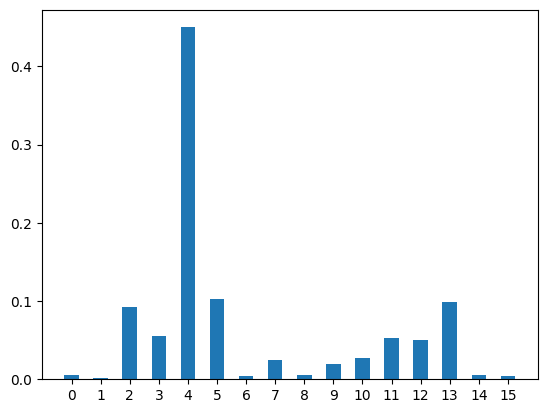



>>> Job ID: cl80a2775e3r3c6gm500
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00229, 15: 0.0062, 10: 0.05737, 8: 0.01897, 0: 0.00666, 3: 0.03443, 7: 0.01018, 11: 0.04568, 5: 0.06919, 12: 0.02654, 2: 0.08805, 13: 0.01632, 14: 0.09851, 6: 0.06851, 4: 0.41551, 9: 0.03559}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00229, 15: 0.0062, 10: 0.05737, 8: 0.01897, 0: 0.00666, 3: 0.03443, 7: 0.01018, 11: 0.04568, 5: 0.06919, 12: 0.02654, 2: 0.08805, 13: 0.01632, 14: 0.09851, 6: 0.06851, 4: 0.41551, 9: 0.03559}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{1: 0.00229, 15: 0.0062, 10: 0.05737, 8: 0.01897, 0: 0.00666, 3: 0.03443, 7: 0.01018, 11: 0.04568, 5: 0.06919, 12: 0.02654, 2: 0.08805, 13: 0.01632, 14: 0.09851, 6: 0.06851, 4: 0.41551, 9: 0.03559}
0.0091524223875


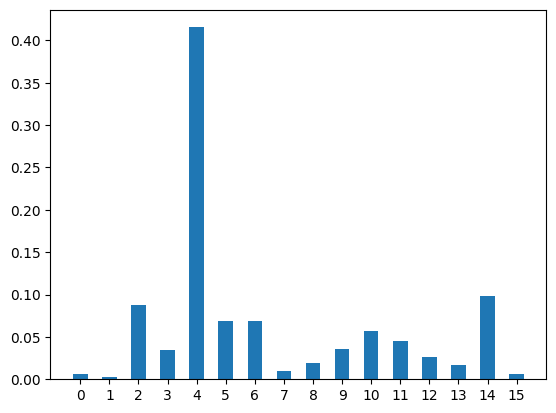



>>> Job ID: cl80a3f75e3r3c6gm5gg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00599, 9: 0.00174, 8: 0.00611, 2: 0.04365, 11: 0.04441, 14: 0.04953, 13: 0.02389, 15: 0.06451, 10: 0.0804, 6: 0.10512, 4: 0.23004, 5: 0.1838, 12: 0.04733, 7: 0.04236, 0: 0.00741, 3: 0.06371}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00599, 9: 0.00174, 8: 0.00611, 2: 0.04365, 11: 0.04441, 14: 0.04953, 13: 0.02389, 15: 0.06451, 10: 0.0804, 6: 0.10512, 4: 0.23004, 5: 0.1838, 12: 0.04733, 7: 0.04236, 0: 0.00741, 3: 0.06371}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{1: 0.00599, 9: 0.00174, 8: 0.00611, 2: 0.04365, 11: 0.04441, 14: 0.04953, 13: 0.02389, 15: 0.06451, 10: 0.0804, 6: 0.10512, 4: 0.23004, 5: 0.1838, 12: 0.04733, 7: 0.04236, 0: 0.00741, 3: 0.06371}
0.0038126806375


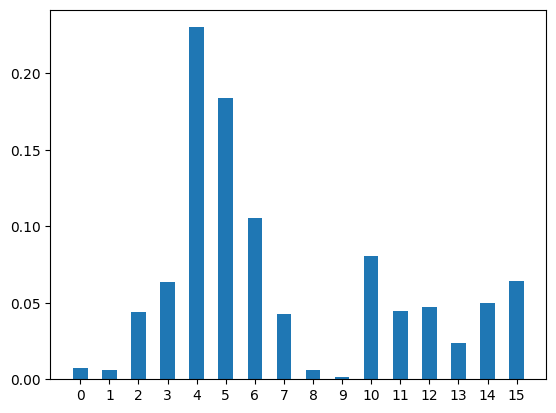



>>> Job ID: cl80a496mcdhud4hb5bg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00406, 11: 0.00128, 9: 0.00018, 2: 0.01578, 1: 0.0085, 8: 0.00529, 14: 0.0722, 15: 0.03274, 10: 0.09412, 0: 0.03431, 7: 0.04149, 3: 0.08161, 12: 0.08908, 5: 0.17964, 6: 0.19791, 4: 0.14181}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00406, 11: 0.00128, 9: 0.00018, 2: 0.01578, 1: 0.0085, 8: 0.00529, 14: 0.0722, 15: 0.03274, 10: 0.09412, 0: 0.03431, 7: 0.04149, 3: 0.08161, 12: 0.08908, 5: 0.17964, 6: 0.19791, 4: 0.14181}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{13: 0.00406, 11: 0.00128, 9: 0.00018, 2: 0.01578, 1: 0.0085, 8: 0.00529, 14: 0.0722, 15: 0.03274, 10: 0.09412, 0: 0.03431, 7: 0.04149, 3: 0.08161, 12: 0.08908, 5: 0.17964, 6: 0.19791, 4: 0.14181}
0.0038783579625


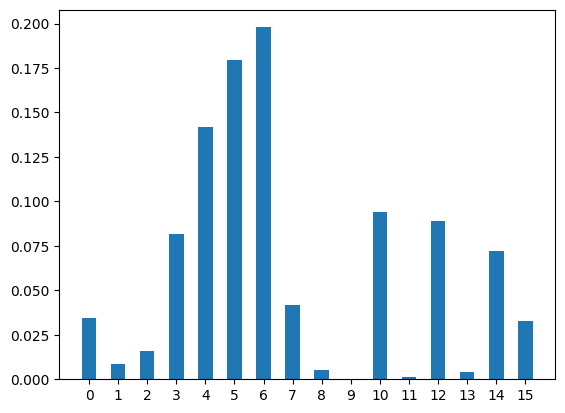



>>> Job ID: cl80a5f75e3r3c6gm6a0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 7e-05, 9: 0.00168, 11: 0.00415, 2: 0.00151, 14: 0.00427, 1: 0.03225, 15: 0.07762, 10: 0.06508, 12: 0.08987, 5: 0.24358, 8: 0.01504, 6: 0.19772, 4: 0.10879, 0: 0.03453, 7: 0.03268, 3: 0.09116}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 7e-05, 9: 0.00168, 11: 0.00415, 2: 0.00151, 14: 0.00427, 1: 0.03225, 15: 0.07762, 10: 0.06508, 12: 0.08987, 5: 0.24358, 8: 0.01504, 6: 0.19772, 4: 0.10879, 0: 0.03453, 7: 0.03268, 3: 0.09116}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{13: 7e-05, 9: 0.00168, 11: 0.00415, 2: 0.00151, 14: 0.00427, 1: 0.03225, 15: 0.07762, 10: 0.06508, 12: 0.08987, 5: 0.24358, 8: 0.01504, 6: 0.19772, 4: 0.10879, 0: 0.03453, 7: 0.03268, 3: 0.09116}
0.0048733651499999996


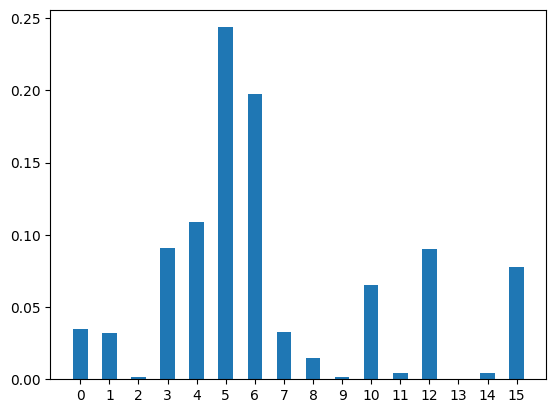



>>> Job ID: cl80a67l4q34kqgna1u0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00445, 13: 0.01542, 8: 0.01865, 1: 0.03379, 11: 0.00604, 2: 0.03006, 15: 0.01411, 10: 0.05235, 4: 0.14553, 6: 0.11074, 12: 0.04487, 5: 0.23351, 9: 0.04919, 3: 0.06214, 0: 0.06582, 7: 0.11333}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00445, 13: 0.01542, 8: 0.01865, 1: 0.03379, 11: 0.00604, 2: 0.03006, 15: 0.01411, 10: 0.05235, 4: 0.14553, 6: 0.11074, 12: 0.04487, 5: 0.23351, 9: 0.04919, 3: 0.06214, 0: 0.06582, 7: 0.11333}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{14: 0.00445, 13: 0.01542, 8: 0.01865, 1: 0.03379, 11: 0.00604, 2: 0.03006, 15: 0.01411, 10: 0.05235, 4: 0.14553, 6: 0.11074, 12: 0.04487, 5: 0.23351, 9: 0.04919, 3: 0.06214, 0: 0.06582, 7: 0.11333}
0.0035354017375


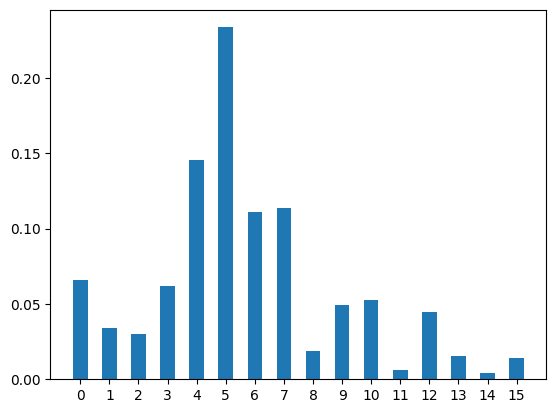



>>> Job ID: cl80a7fl4q34kqgna2gg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00584, 9: 0.02173, 15: 0.00866, 10: 0.03554, 1: 0.03191, 13: 0.03023, 8: 0.10946, 11: 0.02081, 12: 0.03612, 5: 0.16275, 2: 0.04294, 4: 0.17443, 6: 0.09695, 3: 0.06035, 7: 0.11385, 0: 0.04843}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00584, 9: 0.02173, 15: 0.00866, 10: 0.03554, 1: 0.03191, 13: 0.03023, 8: 0.10946, 11: 0.02081, 12: 0.03612, 5: 0.16275, 2: 0.04294, 4: 0.17443, 6: 0.09695, 3: 0.06035, 7: 0.11385, 0: 0.04843}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{14: 0.00584, 9: 0.02173, 15: 0.00866, 10: 0.03554, 1: 0.03191, 13: 0.03023, 8: 0.10946, 11: 0.02081, 12: 0.03612, 5: 0.16275, 2: 0.04294, 4: 0.17443, 6: 0.09695, 3: 0.06035, 7: 0.11385, 0: 0.04843}
0.0026313520125


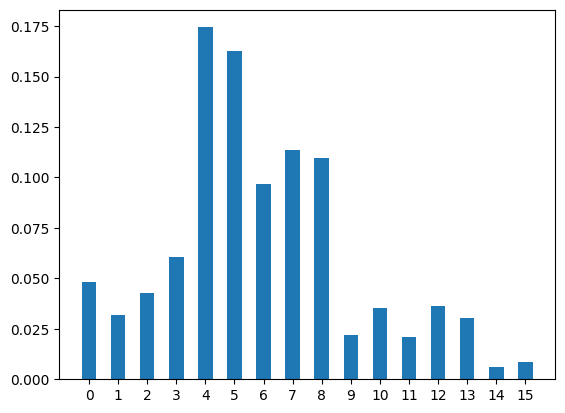



>>> Job ID: cl80a8f75e3r3c6gm7og
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00241, 14: 0.00904, 9: 0.03703, 8: 0.10189, 13: 0.04134, 6: 0.05986, 4: 0.16087, 11: 0.05388, 12: 0.02818, 5: 0.12893, 1: 0.07091, 15: 0.00968, 10: 0.10404, 3: 0.00081, 0: 0.00837, 7: 0.18276}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00241, 14: 0.00904, 9: 0.03703, 8: 0.10189, 13: 0.04134, 6: 0.05986, 4: 0.16087, 11: 0.05388, 12: 0.02818, 5: 0.12893, 1: 0.07091, 15: 0.00968, 10: 0.10404, 3: 0.00081, 0: 0.00837, 7: 0.18276}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{2: 0.00241, 14: 0.00904, 9: 0.03703, 8: 0.10189, 13: 0.04134, 6: 0.05986, 4: 0.16087, 11: 0.05388, 12: 0.02818, 5: 0.12893, 1: 0.07091, 15: 0.00968, 10: 0.10404, 3: 0.00081, 0: 0.00837, 7: 0.18276}
0.0031406243250000003


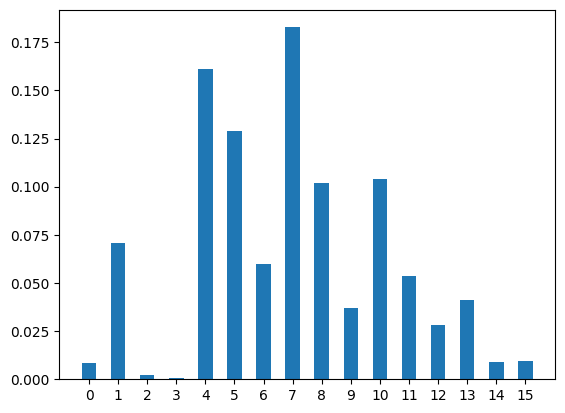



>>> Job ID: cl80a9f75e3r3c6gm900
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.0003, 1: 0.00647, 10: 0.00053, 15: 0.01067, 11: 0.05353, 13: 0.05001, 9: 0.04822, 6: 0.07669, 4: 0.08868, 0: 0.00833, 7: 0.19006, 3: 0.10438, 2: 0.07431, 8: 0.08575, 12: 0.02401, 5: 0.17806}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.0003, 1: 0.00647, 10: 0.00053, 15: 0.01067, 11: 0.05353, 13: 0.05001, 9: 0.04822, 6: 0.07669, 4: 0.08868, 0: 0.00833, 7: 0.19006, 3: 0.10438, 2: 0.07431, 8: 0.08575, 12: 0.02401, 5: 0.17806}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{14: 0.0003, 1: 0.00647, 10: 0.00053, 15: 0.01067, 11: 0.05353, 13: 0.05001, 9: 0.04822, 6: 0.07669, 4: 0.08868, 0: 0.00833, 7: 0.19006, 3: 0.10438, 2: 0.07431, 8: 0.08575, 12: 0.02401, 5: 0.17806}
0.0032085917374999997


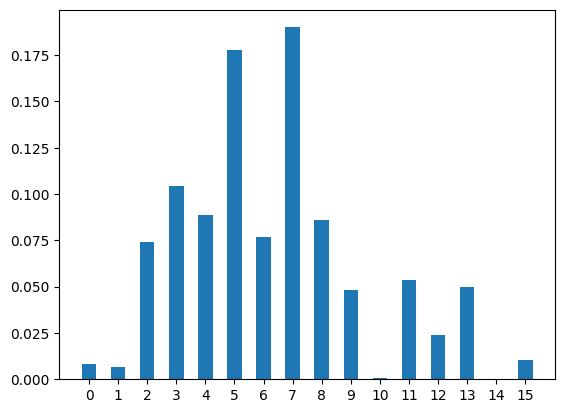



>>> Job ID: cl80aa95o5utp9bt9oc0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00845, 1: 0.01276, 2: 0.02762, 4: 0.11615, 6: 0.0738, 15: 0.01155, 10: 0.08602, 0: 0.00103, 3: 0.00782, 7: 0.13245, 14: 0.04775, 8: 0.09991, 12: 0.03832, 5: 0.21695, 13: 0.08621, 11: 0.03321}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00845, 1: 0.01276, 2: 0.02762, 4: 0.11615, 6: 0.0738, 15: 0.01155, 10: 0.08602, 0: 0.00103, 3: 0.00782, 7: 0.13245, 14: 0.04775, 8: 0.09991, 12: 0.03832, 5: 0.21695, 13: 0.08621, 11: 0.03321}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{9: 0.00845, 1: 0.01276, 2: 0.02762, 4: 0.11615, 6: 0.0738, 15: 0.01155, 10: 0.08602, 0: 0.00103, 3: 0.00782, 7: 0.13245, 14: 0.04775, 8: 0.09991, 12: 0.03832, 5: 0.21695, 13: 0.08621, 11: 0.03321}
0.0032440793375


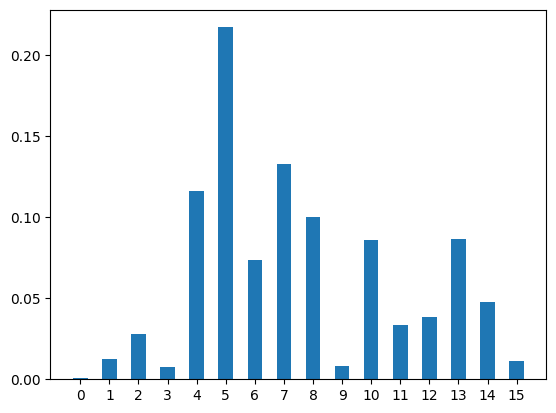



>>> Job ID: cl80abfl4q34kqgna5n0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.03608, 10: 0.00972, 15: 0.032, 1: 0.01334, 2: 0.02, 12: 0.01664, 5: 0.18968, 14: 0.11017, 3: 0.00089, 0: 0.00376, 7: 0.0732, 11: 0.10202, 8: 0.08885, 13: 0.10511, 4: 0.12444, 6: 0.0741}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.03608, 10: 0.00972, 15: 0.032, 1: 0.01334, 2: 0.02, 12: 0.01664, 5: 0.18968, 14: 0.11017, 3: 0.00089, 0: 0.00376, 7: 0.0732, 11: 0.10202, 8: 0.08885, 13: 0.10511, 4: 0.12444, 6: 0.0741}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{9: 0.03608, 10: 0.00972, 15: 0.032, 1: 0.01334, 2: 0.02, 12: 0.01664, 5: 0.18968, 14: 0.11017, 3: 0.00089, 0: 0.00376, 7: 0.0732, 11: 0.10202, 8: 0.08885, 13: 0.10511, 4: 0.12444, 6: 0.0741}
0.0027869268499999995


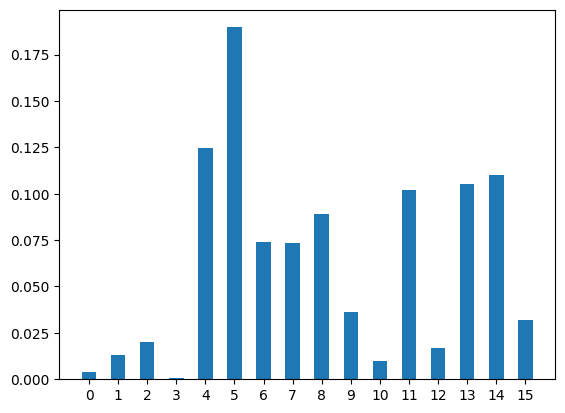



>>> Job ID: cl80acn75e3r3c6gmb4g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00493, 7: 0.00316, 0: 0.00466, 3: 0.02181, 9: 0.03066, 11: 0.09654, 13: 0.05087, 4: 0.08825, 6: 0.17803, 2: 0.02291, 8: 0.12443, 10: 0.00779, 15: 0.04224, 14: 0.1793, 5: 0.12063, 12: 0.02379}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00493, 7: 0.00316, 0: 0.00466, 3: 0.02181, 9: 0.03066, 11: 0.09654, 13: 0.05087, 4: 0.08825, 6: 0.17803, 2: 0.02291, 8: 0.12443, 10: 0.00779, 15: 0.04224, 14: 0.1793, 5: 0.12063, 12: 0.02379}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{1: 0.00493, 7: 0.00316, 0: 0.00466, 3: 0.02181, 9: 0.03066, 11: 0.09654, 13: 0.05087, 4: 0.08825, 6: 0.17803, 2: 0.02291, 8: 0.12443, 10: 0.00779, 15: 0.04224, 14: 0.1793, 5: 0.12063, 12: 0.02379}
0.0034675522125


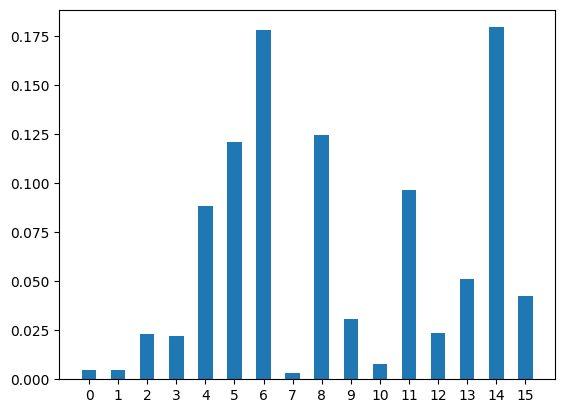



>>> Job ID: cl80adp6mcdhud4hbb10
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 6e-05, 1: 0.00921, 13: 0.00312, 9: 0.02475, 11: 0.02559, 7: 0.00142, 0: 0.00239, 3: 0.03373, 4: 0.04238, 6: 0.18182, 10: 0.03709, 15: 0.03967, 14: 0.22663, 12: 0.07604, 5: 0.16699, 8: 0.12911}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 6e-05, 1: 0.00921, 13: 0.00312, 9: 0.02475, 11: 0.02559, 7: 0.00142, 0: 0.00239, 3: 0.03373, 4: 0.04238, 6: 0.18182, 10: 0.03709, 15: 0.03967, 14: 0.22663, 12: 0.07604, 5: 0.16699, 8: 0.12911}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{2: 6e-05, 1: 0.00921, 13: 0.00312, 9: 0.02475, 11: 0.02559, 7: 0.00142, 0: 0.00239, 3: 0.03373, 4: 0.04238, 6: 0.18182, 10: 0.03709, 15: 0.03967, 14: 0.22663, 12: 0.07604, 5: 0.16699, 8: 0.12911}
0.0049693536625


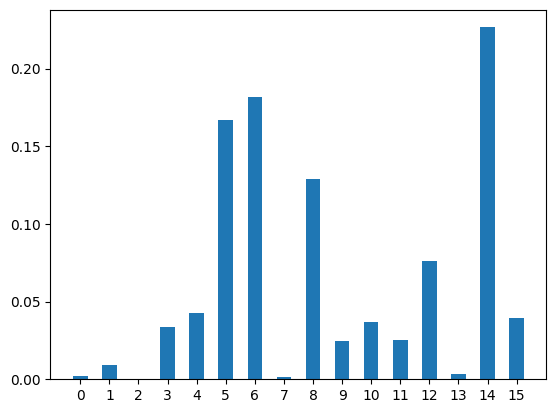



>>> Job ID: cl80af16mcdhud4hbbl0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00952, 11: 0.00415, 1: 0.00174, 0: 0.02524, 7: 0.06055, 3: 0.04283, 8: 0.0854, 4: 0.01027, 6: 0.12589, 9: 0.04361, 13: 0.06221, 12: 0.05608, 5: 0.20049, 14: 0.20829, 10: 0.02818, 15: 0.03555}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00952, 11: 0.00415, 1: 0.00174, 0: 0.02524, 7: 0.06055, 3: 0.04283, 8: 0.0854, 4: 0.01027, 6: 0.12589, 9: 0.04361, 13: 0.06221, 12: 0.05608, 5: 0.20049, 14: 0.20829, 10: 0.02818, 15: 0.03555}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{2: 0.00952, 11: 0.00415, 1: 0.00174, 0: 0.02524, 7: 0.06055, 3: 0.04283, 8: 0.0854, 4: 0.01027, 6: 0.12589, 9: 0.04361, 13: 0.06221, 12: 0.05608, 5: 0.20049, 14: 0.20829, 10: 0.02818, 15: 0.03555}
0.0038469585124999996


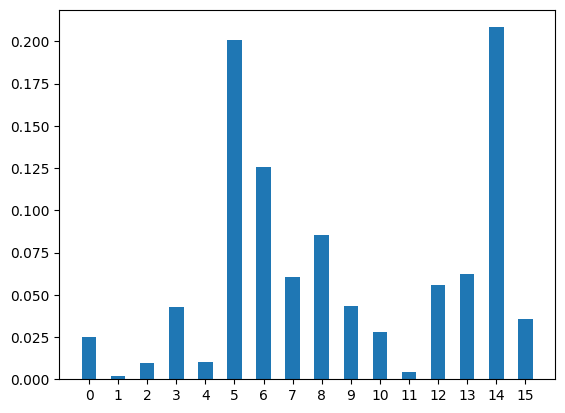



>>> Job ID: cl80agf75e3r3c6gmct0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00354, 1: 0.00913, 11: 0.0131, 8: 0.07241, 2: 0.00577, 4: 0.03642, 6: 0.11209, 13: 0.06116, 3: 0.04799, 0: 0.05151, 7: 0.06113, 15: 0.11201, 10: 0.01147, 5: 0.18916, 12: 0.05779, 14: 0.15532}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00354, 1: 0.00913, 11: 0.0131, 8: 0.07241, 2: 0.00577, 4: 0.03642, 6: 0.11209, 13: 0.06116, 3: 0.04799, 0: 0.05151, 7: 0.06113, 15: 0.11201, 10: 0.01147, 5: 0.18916, 12: 0.05779, 14: 0.15532}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{9: 0.00354, 1: 0.00913, 11: 0.0131, 8: 0.07241, 2: 0.00577, 4: 0.03642, 6: 0.11209, 13: 0.06116, 3: 0.04799, 0: 0.05151, 7: 0.06113, 15: 0.11201, 10: 0.01147, 5: 0.18916, 12: 0.05779, 14: 0.15532}
0.0028307262375


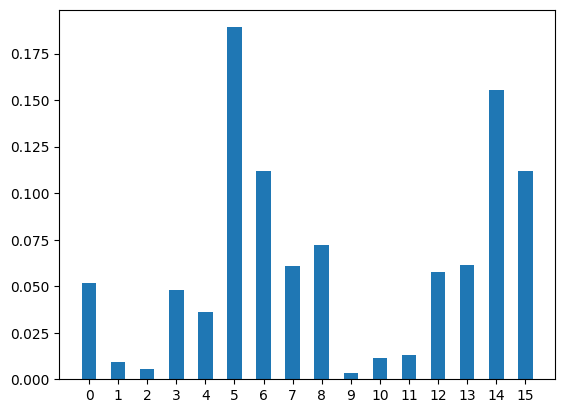



>>> Job ID: cl80ahl7pau17fl4f5gg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00031, 2: 0.00235, 14: 0.00901, 11: 0.01028, 1: 0.00816, 8: 0.0707, 9: 0.0698, 10: 0.0521, 15: 0.21661, 4: 0.01925, 6: 0.15052, 3: 0.01377, 7: 0.07163, 0: 0.10221, 12: 0.04616, 5: 0.15714}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00031, 2: 0.00235, 14: 0.00901, 11: 0.01028, 1: 0.00816, 8: 0.0707, 9: 0.0698, 10: 0.0521, 15: 0.21661, 4: 0.01925, 6: 0.15052, 3: 0.01377, 7: 0.07163, 0: 0.10221, 12: 0.04616, 5: 0.15714}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{13: 0.00031, 2: 0.00235, 14: 0.00901, 11: 0.01028, 1: 0.00816, 8: 0.0707, 9: 0.0698, 10: 0.0521, 15: 0.21661, 4: 0.01925, 6: 0.15052, 3: 0.01377, 7: 0.07163, 0: 0.10221, 12: 0.04616, 5: 0.15714}
0.003930112925000001


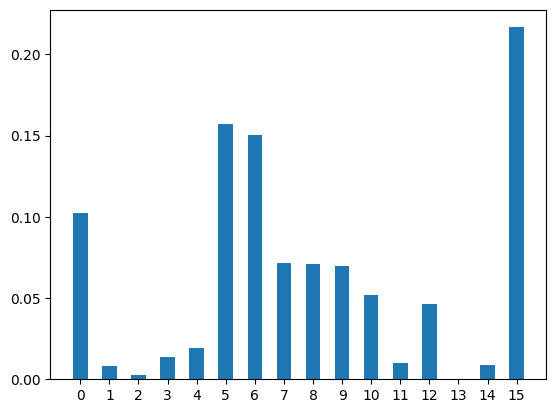



>>> Job ID: cl80ain75e3r3c6gme2g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00117, 14: 0.00123, 1: 0.00751, 9: 0.03584, 12: 0.01621, 5: 0.04171, 8: 0.05277, 10: 0.00386, 15: 0.21233, 4: 0.01732, 6: 0.27496, 13: 0.03442, 0: 0.11366, 3: 0.07505, 7: 0.06515, 11: 0.04681}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00117, 14: 0.00123, 1: 0.00751, 9: 0.03584, 12: 0.01621, 5: 0.04171, 8: 0.05277, 10: 0.00386, 15: 0.21233, 4: 0.01732, 6: 0.27496, 13: 0.03442, 0: 0.11366, 3: 0.07505, 7: 0.06515, 11: 0.04681}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{2: 0.00117, 14: 0.00123, 1: 0.00751, 9: 0.03584, 12: 0.01621, 5: 0.04171, 8: 0.05277, 10: 0.00386, 15: 0.21233, 4: 0.01732, 6: 0.27496, 13: 0.03442, 0: 0.11366, 3: 0.07505, 7: 0.06515, 11: 0.04681}
0.005675274637499999


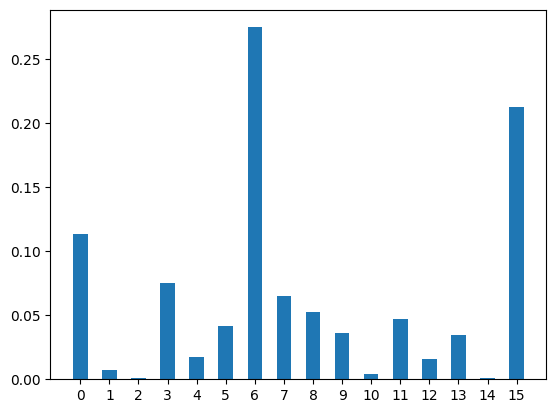



>>> Job ID: cl80ajt7pau17fl4f6i0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00388, 14: 0.00502, 11: 0.04311, 8: 0.02321, 1: 0.0272, 13: 0.06257, 4: 0.07985, 6: 0.27519, 9: 0.03041, 10: 0.01201, 15: 0.14833, 3: 0.0195, 0: 0.15515, 7: 0.04806, 12: 0.02187, 5: 0.04464}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00388, 14: 0.00502, 11: 0.04311, 8: 0.02321, 1: 0.0272, 13: 0.06257, 4: 0.07985, 6: 0.27519, 9: 0.03041, 10: 0.01201, 15: 0.14833, 3: 0.0195, 0: 0.15515, 7: 0.04806, 12: 0.02187, 5: 0.04464}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{2: 0.00388, 14: 0.00502, 11: 0.04311, 8: 0.02321, 1: 0.0272, 13: 0.06257, 4: 0.07985, 6: 0.27519, 9: 0.03041, 10: 0.01201, 15: 0.14833, 3: 0.0195, 0: 0.15515, 7: 0.04806, 12: 0.02187, 5: 0.04464}
0.004937574637499999


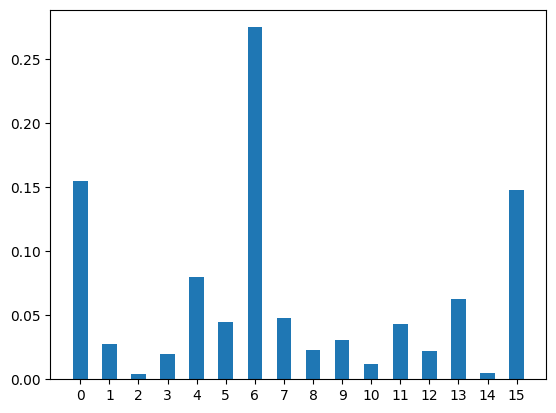



>>> Job ID: cl80akv75e3r3c6gmf4g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.02195, 12: 0.00965, 5: 0.023, 3: 0.02418, 0: 0.08409, 7: 0.15209, 14: 0.06126, 13: 0.03219, 9: 0.02605, 2: 0.02729, 10: 0.01213, 15: 0.06385, 11: 0.04293, 6: 0.17956, 4: 0.08043, 1: 0.15935}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.02195, 12: 0.00965, 5: 0.023, 3: 0.02418, 0: 0.08409, 7: 0.15209, 14: 0.06126, 13: 0.03219, 9: 0.02605, 2: 0.02729, 10: 0.01213, 15: 0.06385, 11: 0.04293, 6: 0.17956, 4: 0.08043, 1: 0.15935}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{8: 0.02195, 12: 0.00965, 5: 0.023, 3: 0.02418, 0: 0.08409, 7: 0.15209, 14: 0.06126, 13: 0.03219, 9: 0.02605, 2: 0.02729, 10: 0.01213, 15: 0.06385, 11: 0.04293, 6: 0.17956, 4: 0.08043, 1: 0.15935}
0.002860848075


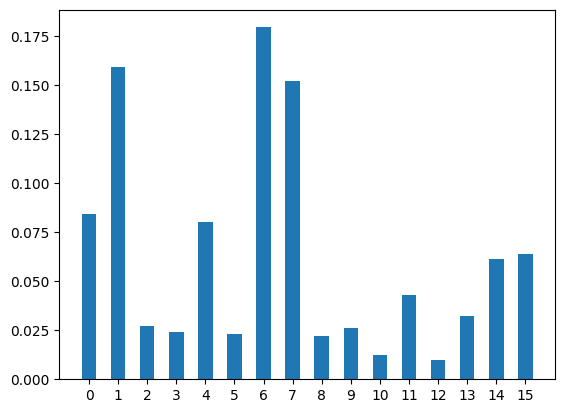



>>> Job ID: cl80am5fa6vtjv8ups00
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.04381, 10: 0.02392, 15: 0.05844, 11: 0.01425, 9: 0.03326, 5: 0.01616, 12: 0.04561, 3: 0.02602, 0: 0.0575, 7: 0.15964, 4: 0.06923, 6: 0.17746, 13: 0.00913, 2: 0.07532, 1: 0.15704, 8: 0.03321}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.04381, 10: 0.02392, 15: 0.05844, 11: 0.01425, 9: 0.03326, 5: 0.01616, 12: 0.04561, 3: 0.02602, 0: 0.0575, 7: 0.15964, 4: 0.06923, 6: 0.17746, 13: 0.00913, 2: 0.07532, 1: 0.15704, 8: 0.03321}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{14: 0.04381, 10: 0.02392, 15: 0.05844, 11: 0.01425, 9: 0.03326, 5: 0.01616, 12: 0.04561, 3: 0.02602, 0: 0.0575, 7: 0.15964, 4: 0.06923, 6: 0.17746, 13: 0.00913, 2: 0.07532, 1: 0.15704, 8: 0.03321}
0.0027707133375000003


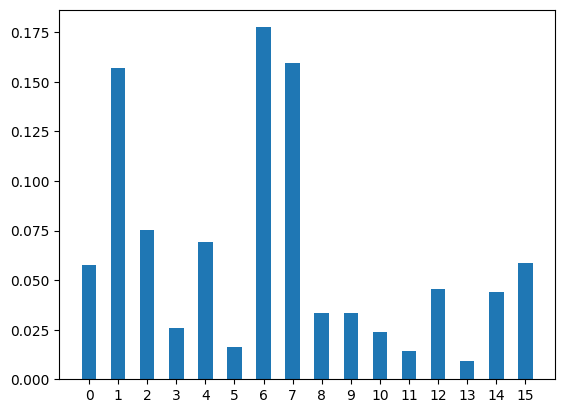



>>> Job ID: cl80anl7pau17fl4f85g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00639, 13: 0.05945, 8: 0.02188, 14: 0.03816, 0: 0.05802, 3: 0.00962, 7: 0.16704, 11: 0.02303, 1: 0.15362, 4: 0.05434, 6: 0.15325, 2: 0.07511, 10: 0.02427, 15: 0.07198, 5: 0.03081, 12: 0.05303}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00639, 13: 0.05945, 8: 0.02188, 14: 0.03816, 0: 0.05802, 3: 0.00962, 7: 0.16704, 11: 0.02303, 1: 0.15362, 4: 0.05434, 6: 0.15325, 2: 0.07511, 10: 0.02427, 15: 0.07198, 5: 0.03081, 12: 0.05303}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{9: 0.00639, 13: 0.05945, 8: 0.02188, 14: 0.03816, 0: 0.05802, 3: 0.00962, 7: 0.16704, 11: 0.02303, 1: 0.15362, 4: 0.05434, 6: 0.15325, 2: 0.07511, 10: 0.02427, 15: 0.07198, 5: 0.03081, 12: 0.05303}
0.0025070166750000003


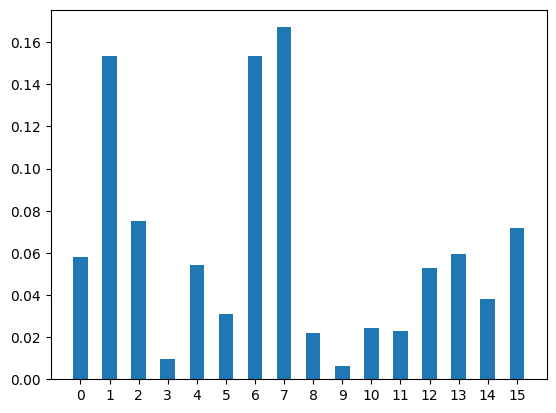



>>> Job ID: cl80aov75e3r3c6gmgv0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.03717, 13: 0.01453, 8: 0.02966, 4: 0.0431, 6: 0.04908, 9: 0.00361, 2: 0.10848, 14: 0.09141, 3: 0.00593, 0: 0.1079, 7: 0.25613, 12: 0.05611, 5: 0.04115, 1: 0.08175, 10: 0.06516, 15: 0.00883}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.03717, 13: 0.01453, 8: 0.02966, 4: 0.0431, 6: 0.04908, 9: 0.00361, 2: 0.10848, 14: 0.09141, 3: 0.00593, 0: 0.1079, 7: 0.25613, 12: 0.05611, 5: 0.04115, 1: 0.08175, 10: 0.06516, 15: 0.00883}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{11: 0.03717, 13: 0.01453, 8: 0.02966, 4: 0.0431, 6: 0.04908, 9: 0.00361, 2: 0.10848, 14: 0.09141, 3: 0.00593, 0: 0.1079, 7: 0.25613, 12: 0.05611, 5: 0.04115, 1: 0.08175, 10: 0.06516, 15: 0.00883}
0.003594018487500001


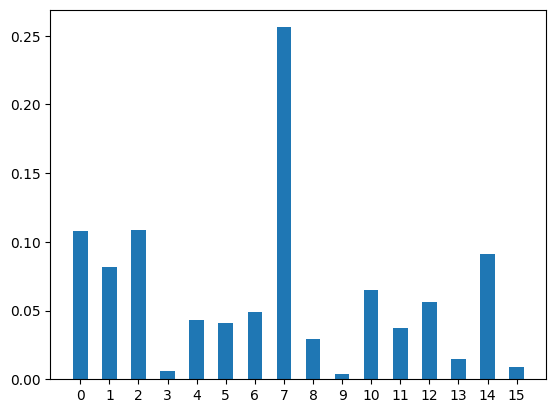



>>> Job ID: cl80aq96mcdhud4hbgvg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00295, 14: 0.00256, 1: 0.00944, 5: 0.05582, 12: 0.04703, 11: 0.04691, 15: 0.09348, 10: 0.09564, 8: 0.03129, 4: 0.03247, 6: 0.02145, 2: 0.08628, 9: 0.02308, 3: 0.05601, 0: 0.11543, 7: 0.28016}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00295, 14: 0.00256, 1: 0.00944, 5: 0.05582, 12: 0.04703, 11: 0.04691, 15: 0.09348, 10: 0.09564, 8: 0.03129, 4: 0.03247, 6: 0.02145, 2: 0.08628, 9: 0.02308, 3: 0.05601, 0: 0.11543, 7: 0.28016}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{13: 0.00295, 14: 0.00256, 1: 0.00944, 5: 0.05582, 12: 0.04703, 11: 0.04691, 15: 0.09348, 10: 0.09564, 8: 0.03129, 4: 0.03247, 6: 0.02145, 2: 0.08628, 9: 0.02308, 3: 0.05601, 0: 0.11543, 7: 0.28016}
0.0042774596250000005


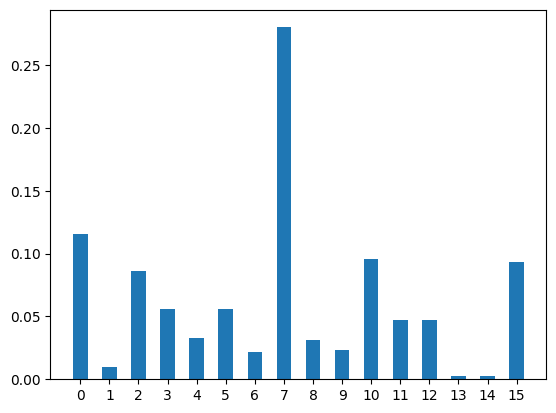



>>> Job ID: cl80as5fa6vtjv8upu9g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.02169, 1: 0.03508, 6: 0.02037, 4: 0.02292, 8: 0.07773, 14: 0.00277, 13: 0.00827, 3: 0.07311, 0: 0.14146, 7: 0.23096, 15: 0.04261, 10: 0.04956, 11: 0.04879, 12: 0.06915, 5: 0.08073, 2: 0.0748}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.02169, 1: 0.03508, 6: 0.02037, 4: 0.02292, 8: 0.07773, 14: 0.00277, 13: 0.00827, 3: 0.07311, 0: 0.14146, 7: 0.23096, 15: 0.04261, 10: 0.04956, 11: 0.04879, 12: 0.06915, 5: 0.08073, 2: 0.0748}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{9: 0.02169, 1: 0.03508, 6: 0.02037, 4: 0.02292, 8: 0.07773, 14: 0.00277, 13: 0.00827, 3: 0.07311, 0: 0.14146, 7: 0.23096, 15: 0.04261, 10: 0.04956, 11: 0.04879, 12: 0.06915, 5: 0.08073, 2: 0.0748}
0.0030315146874999995


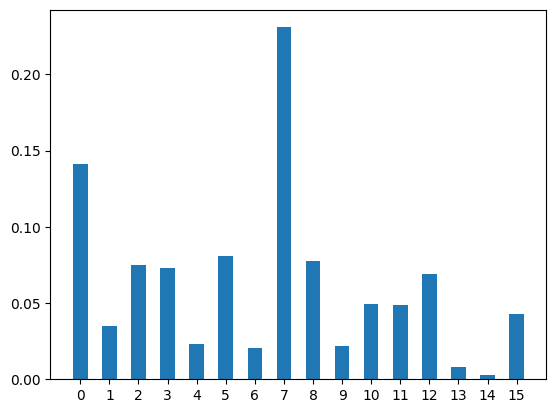



>>> Job ID: cl80aup5o5utp9bta180
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.06988, 14: 0.00688, 13: 0.01714, 4: 0.00582, 6: 0.01762, 1: 0.00467, 12: 0.03773, 5: 0.10103, 2: 0.07928, 8: 0.15881, 11: 0.01338, 15: 0.01302, 10: 0.09765, 3: 0.05402, 0: 0.17162, 7: 0.15145}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.06988, 14: 0.00688, 13: 0.01714, 4: 0.00582, 6: 0.01762, 1: 0.00467, 12: 0.03773, 5: 0.10103, 2: 0.07928, 8: 0.15881, 11: 0.01338, 15: 0.01302, 10: 0.09765, 3: 0.05402, 0: 0.17162, 7: 0.15145}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{9: 0.06988, 14: 0.00688, 13: 0.01714, 4: 0.00582, 6: 0.01762, 1: 0.00467, 12: 0.03773, 5: 0.10103, 2: 0.07928, 8: 0.15881, 11: 0.01338, 15: 0.01302, 10: 0.09765, 3: 0.05402, 0: 0.17162, 7: 0.15145}
0.0032137360625


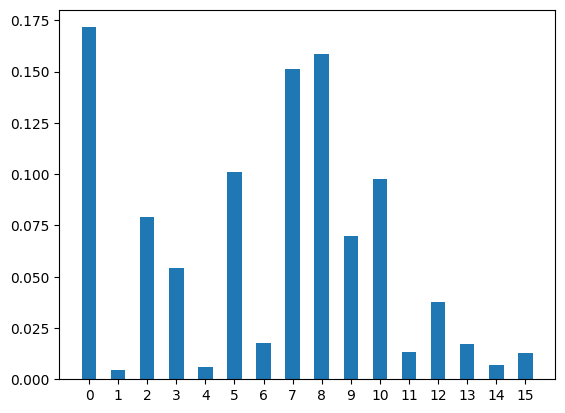



>>> Job ID: cl80b05fa6vtjv8uq07g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.01599, 15: 0.00809, 10: 0.04547, 13: 0.04842, 5: 0.08938, 12: 0.03722, 11: 0.09472, 2: 0.07813, 6: 0.02384, 4: 0.0146, 9: 0.01576, 1: 0.15725, 8: 0.21254, 0: 0.03059, 7: 0.10063, 3: 0.02737}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.01599, 15: 0.00809, 10: 0.04547, 13: 0.04842, 5: 0.08938, 12: 0.03722, 11: 0.09472, 2: 0.07813, 6: 0.02384, 4: 0.0146, 9: 0.01576, 1: 0.15725, 8: 0.21254, 0: 0.03059, 7: 0.10063, 3: 0.02737}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{14: 0.01599, 15: 0.00809, 10: 0.04547, 13: 0.04842, 5: 0.08938, 12: 0.03722, 11: 0.09472, 2: 0.07813, 6: 0.02384, 4: 0.0146, 9: 0.01576, 1: 0.15725, 8: 0.21254, 0: 0.03059, 7: 0.10063, 3: 0.02737}
0.00308908705


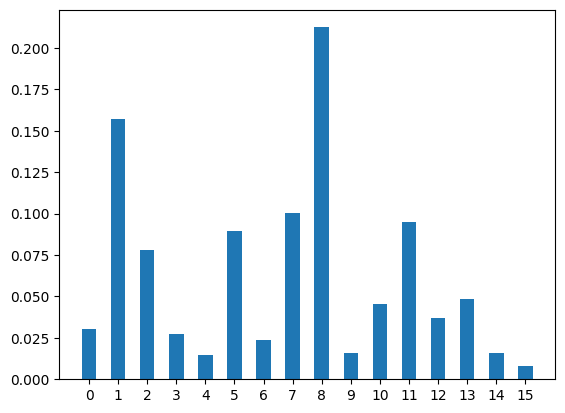



>>> Job ID: cl80b195o5utp9bta2i0
>>> Job Status: JobStatus.DONE
>>> SamplerResult(quasi_dists=[{13: 0.02711, 14: 0.03072, 1: 0.13612, 4: 0.01722, 6: 0.07096, 5: 0.04458, 12: 0.0594, 10: 0.06333, 15: 0.01953, 0: 0.00104, 3: 0.02096, 7: 0.0707, 2: 0.08765, 9: 0.05795, 11: 0.06443, 8: 0.2283}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02711, 14: 0.03072, 1: 0.13612, 4: 0.01722, 6: 0.07096, 5: 0.04458, 12: 0.0594, 10: 0.06333, 15: 0.01953, 0: 0.00104, 3: 0.02096, 7: 0.0707, 2: 0.08765, 9: 0.05795, 11: 0.06443, 8: 0.2283}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{13: 0.02711, 14: 0.03072, 1: 0.13612, 4: 0.01722, 6: 0.07096, 5: 0.04458, 12: 0.0594, 10: 0.06333, 15: 0.01953, 0: 0.00104, 3: 0.02096, 7: 0.0707, 2: 0.08765, 9: 0.05795, 11: 0.06443, 8: 0.2283}
0.0028561721375000002


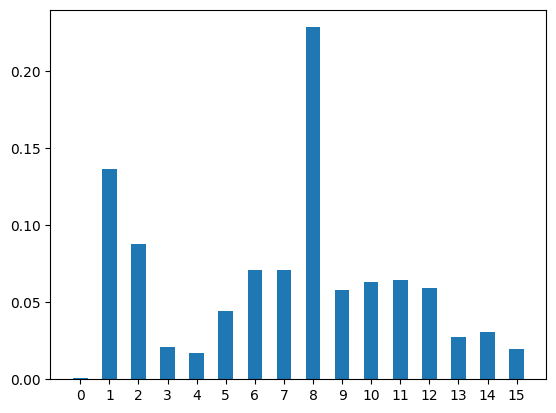



>>> Job ID: cl80b3775e3r3c6gmlgg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.02635, 5: 0.04088, 12: 0.02192, 4: 0.00542, 6: 0.08842, 13: 0.03752, 9: 0.06508, 2: 0.10024, 15: 0.00454, 10: 0.01763, 1: 0.12269, 8: 0.22293, 3: 0.05713, 7: 0.04185, 0: 0.01995, 11: 0.12745}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.02635, 5: 0.04088, 12: 0.02192, 4: 0.00542, 6: 0.08842, 13: 0.03752, 9: 0.06508, 2: 0.10024, 15: 0.00454, 10: 0.01763, 1: 0.12269, 8: 0.22293, 3: 0.05713, 7: 0.04185, 0: 0.01995, 11: 0.12745}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{14: 0.02635, 5: 0.04088, 12: 0.02192, 4: 0.00542, 6: 0.08842, 13: 0.03752, 9: 0.06508, 2: 0.10024, 15: 0.00454, 10: 0.01763, 1: 0.12269, 8: 0.22293, 3: 0.05713, 7: 0.04185, 0: 0.01995, 11: 0.12745}
0.003163967775


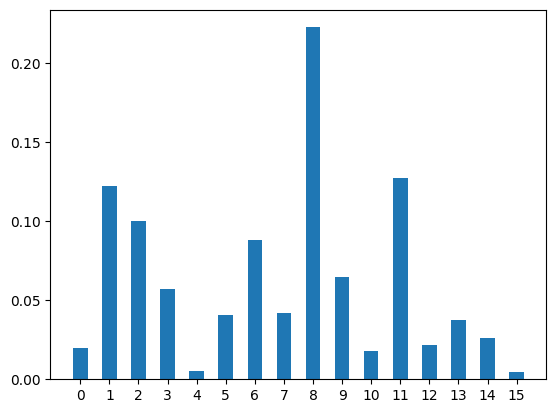



>>> Job ID: cl80b496mcdhud4hblf0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{5: 0.00071, 12: 0.00872, 14: 0.03578, 13: 0.03627, 10: 0.11765, 15: 0.01681, 0: 0.00676, 7: 0.01925, 3: 0.07589, 1: 0.07615, 8: 0.22107, 6: 0.12156, 4: 0.02756, 11: 0.12975, 9: 0.02684, 2: 0.07923}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {5: 0.00071, 12: 0.00872, 14: 0.03578, 13: 0.03627, 10: 0.11765, 15: 0.01681, 0: 0.00676, 7: 0.01925, 3: 0.07589, 1: 0.07615, 8: 0.22107, 6: 0.12156, 4: 0.02756, 11: 0.12975, 9: 0.02684, 2: 0.07923}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{5: 0.00071, 12: 0.00872, 14: 0.03578, 13: 0.03627, 10: 0.11765, 15: 0.01681, 0: 0.00676, 7: 0.01925, 3: 0.07589, 1: 0.07615, 8: 0.22107, 6: 0.12156, 4: 0.02756, 11: 0.12975, 9: 0.02684, 2: 0.07923}
0.0034069943875


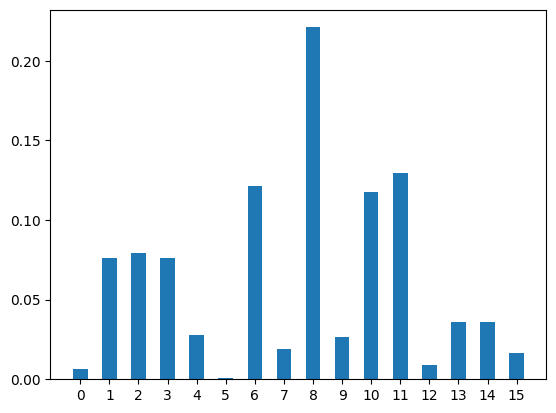



>>> Job ID: cl80b6d7pau17fl4fei0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.06119, 5: 0.00365, 12: 0.04242, 9: 0.01803, 1: 0.06958, 15: 0.03795, 10: 0.0823, 11: 0.09905, 6: 0.11508, 4: 0.08959, 0: 0.02319, 7: 0.02194, 3: 0.11432, 14: 0.02227, 8: 0.18508, 2: 0.01436}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.06119, 5: 0.00365, 12: 0.04242, 9: 0.01803, 1: 0.06958, 15: 0.03795, 10: 0.0823, 11: 0.09905, 6: 0.11508, 4: 0.08959, 0: 0.02319, 7: 0.02194, 3: 0.11432, 14: 0.02227, 8: 0.18508, 2: 0.01436}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{13: 0.06119, 5: 0.00365, 12: 0.04242, 9: 0.01803, 1: 0.06958, 15: 0.03795, 10: 0.0823, 11: 0.09905, 6: 0.11508, 4: 0.08959, 0: 0.02319, 7: 0.02194, 3: 0.11432, 14: 0.02227, 8: 0.18508, 2: 0.01436}
0.00228516205


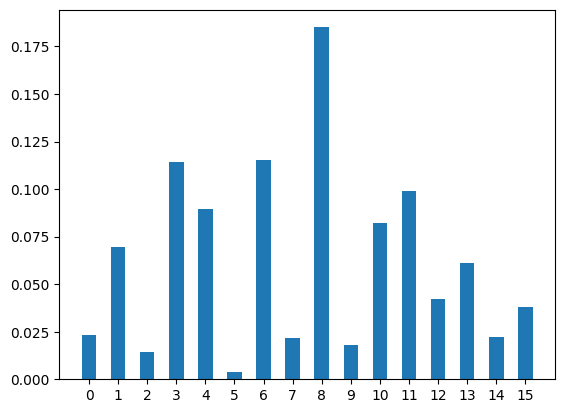



>>> Job ID: cl80b7vl4q34kqgnaio0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.08576, 1: 0.04837, 15: 0.03282, 10: 0.05661, 5: 0.00796, 12: 0.03674, 2: 0.05686, 8: 0.10268, 9: 0.09518, 13: 0.10214, 6: 0.06216, 4: 0.13977, 14: 0.01588, 0: 0.01217, 3: 0.06984, 7: 0.07506}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.08576, 1: 0.04837, 15: 0.03282, 10: 0.05661, 5: 0.00796, 12: 0.03674, 2: 0.05686, 8: 0.10268, 9: 0.09518, 13: 0.10214, 6: 0.06216, 4: 0.13977, 14: 0.01588, 0: 0.01217, 3: 0.06984, 7: 0.07506}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{11: 0.08576, 1: 0.04837, 15: 0.03282, 10: 0.05661, 5: 0.00796, 12: 0.03674, 2: 0.05686, 8: 0.10268, 9: 0.09518, 13: 0.10214, 6: 0.06216, 4: 0.13977, 14: 0.01588, 0: 0.01217, 3: 0.06984, 7: 0.07506}
0.0012793095749999998


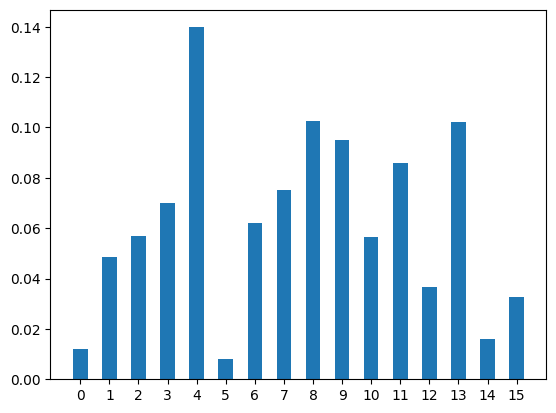



>>> Job ID: cl80b9f75e3r3c6gmo3g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00298, 6: 0.02553, 4: 0.0277, 9: 0.09272, 2: 0.10322, 14: 0.02281, 8: 0.07252, 12: 0.04519, 5: 0.14827, 7: 0.10516, 0: 0.01244, 3: 0.03234, 13: 0.12621, 11: 0.09953, 10: 0.04722, 15: 0.03616}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00298, 6: 0.02553, 4: 0.0277, 9: 0.09272, 2: 0.10322, 14: 0.02281, 8: 0.07252, 12: 0.04519, 5: 0.14827, 7: 0.10516, 0: 0.01244, 3: 0.03234, 13: 0.12621, 11: 0.09953, 10: 0.04722, 15: 0.03616}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{1: 0.00298, 6: 0.02553, 4: 0.0277, 9: 0.09272, 2: 0.10322, 14: 0.02281, 8: 0.07252, 12: 0.04519, 5: 0.14827, 7: 0.10516, 0: 0.01244, 3: 0.03234, 13: 0.12621, 11: 0.09953, 10: 0.04722, 15: 0.03616}
0.0018510379625


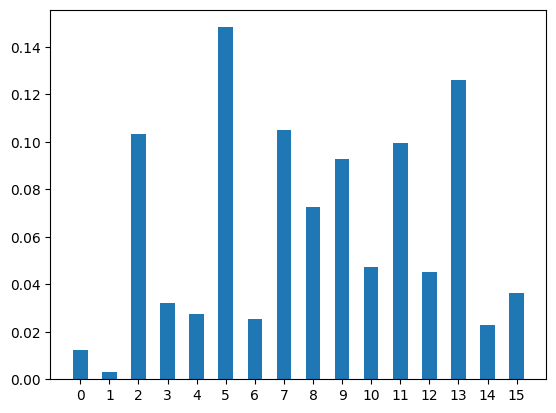



>>> Job ID: cl80bb5fa6vtjv8uq5l0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.03035, 15: 0.00466, 10: 0.02353, 8: 0.02177, 11: 0.01815, 13: 0.11734, 1: 0.0123, 4: 0.01621, 6: 0.11609, 9: 0.12304, 5: 0.0606, 12: 0.13388, 0: 0.03313, 3: 0.06548, 7: 0.11972, 2: 0.10375}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.03035, 15: 0.00466, 10: 0.02353, 8: 0.02177, 11: 0.01815, 13: 0.11734, 1: 0.0123, 4: 0.01621, 6: 0.11609, 9: 0.12304, 5: 0.0606, 12: 0.13388, 0: 0.03313, 3: 0.06548, 7: 0.11972, 2: 0.10375}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{14: 0.03035, 15: 0.00466, 10: 0.02353, 8: 0.02177, 11: 0.01815, 13: 0.11734, 1: 0.0123, 4: 0.01621, 6: 0.11609, 9: 0.12304, 5: 0.0606, 12: 0.13388, 0: 0.03313, 3: 0.06548, 7: 0.11972, 2: 0.10375}
0.002167293525


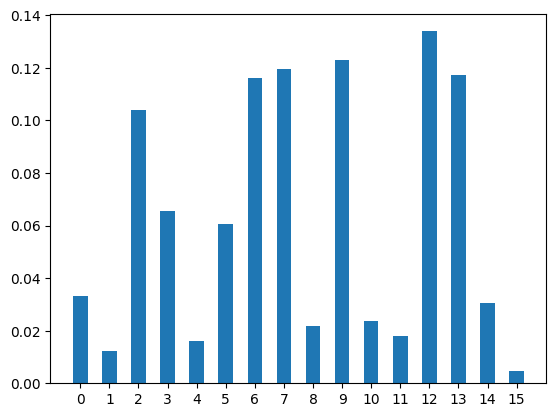

In [71]:
var2 = []
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

    qc1 = QuantumCircuit(2)
    qc1.swap(0,1)
    CSwapgate = qc1.to_gate().control(2)

    circuit.x(p2)
    circuit.append(CSwapgate, [p1,p2,p0,p3])
    circuit.x(p2)
    circuit.x(p1)
    circuit.append(C3XGate(), [p0,p1,p3,p2])
    circuit.x(p1)

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  var2.append(np.var(prob))
  print(np.var(prob))
  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

compare variance between task3 and task4

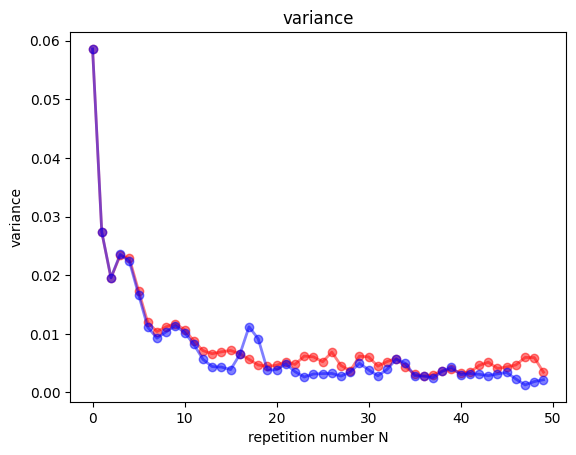

In [72]:
n = [i for i in range(50)]
plt.plot(n, var1, color='red', marker='o', alpha=0.5, linewidth=2)
plt.plot(n, var2, color='blue', marker='o', alpha=0.5, linewidth=2)

plt.title("variance")
plt.xlabel("repetition number N")
plt.ylabel("variance")
plt.show()